# Second Report: Financial Market Volatility

By: Abigail Alpert and Gabi Wurgaft

# Project Goal

Predict volatility for the following day for AAPL, LLY, and BEP stocks.

# Current Project Stage

Data Exploration and descriptive analytics

In [3]:
# Load Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from plotnine import *

import datetime

Structure:

- Data management
- Summary statistics
- Time series plots
- Returns
- Variance
- Volatility
    - Daily volatility
    - Aggregated volatility
- Correlation
- EWMA
- Outlier detection
- Next steps


# Data Management

In [5]:
# Read Data
aapl_df = pd.read_csv("data_files/AAPL_combined.csv.gz")
lly_df = pd.read_csv("data_files/LLY_combined.csv.gz")
bep_df = pd.read_csv("data_files/BEP_combined.csv.gz")

# Data Preprocessing
def data_preprocess(df):
    # Rename columns
    df.rename(columns={'Unnamed: 0': 'timestamp',
                       '1. open': 'open',
                       '2. high': 'high',
                       '3. low': 'low',
                       '4. close': 'close',
                       '5. volume': 'volume'}, inplace=True)
    
    # Drop unnecessary columns
    if 'Unnamed: 0.1' in df.columns.tolist():
        df.drop(columns=['Unnamed: 0.1'], inplace=True)

    # Handle data types
    df['timestamp'] = pd.to_datetime(df['timestamp'])

    return df

aapl_df = data_preprocess(aapl_df)
lly_df = data_preprocess(lly_df)
bep_df = data_preprocess(bep_df)

# Summary Statistics

In [6]:
aapl_df.describe()

timestamp           open           high  \
count                         562931  562931.000000  562931.000000   
mean   2022-11-14 21:03:20.477216768     160.515991     160.593207   
min              2020-01-02 09:30:00      51.539100      51.672300   
25%              2021-06-09 11:06:30     130.567100     130.630900   
50%              2022-11-11 10:26:00     160.717500     160.820600   
75%              2024-04-23 10:26:30     190.944100     191.003600   
max              2025-09-30 15:59:00     259.008600     265.706100   
std                              NaN      45.624113      45.636280   

                 low          close        volume  
count  562931.000000  562931.000000  5.629310e+05  
mean      160.437746     160.516211  1.647944e+05  
min        51.476200      51.529400  6.000000e+00  
25%       130.504700     130.565450  6.793800e+04  
50%       160.624200     160.718600  1.116850e+05  
75%       190.879900     190.944100  1.919780e+05  
max       258.809300     259.028400  2.035834e+07  
std        45.611705      45.624154  2.178602e+05

Notice that the stock price varies by about $200 over the full dataframe. Since our data is on a minute level, the values do not differ too much between the open, high, low, and close prices.

In [7]:
lly_df.describe()

timestamp           open           high  \
count                         558186  558186.000000  558186.000000   
mean   2022-11-13 02:29:51.056314112     433.285002     433.485025   
min              2020-01-02 09:31:00     109.690000     109.971000   
25%              2021-06-07 13:27:15     208.908500     208.970800   
50%              2022-11-09 10:45:30     323.250800     323.396450   
75%              2024-04-19 13:40:45     733.159150     733.555975   
max              2025-09-30 15:59:00     964.839100     965.136800   
std                              NaN     264.277398     264.407444   

                 low          close        volume  
count  558186.000000  558186.000000  5.581860e+05  
mean      433.081830     433.283493  5.859736e+03  
min       109.643100     109.821100  1.000000e+00  
25%       208.842600     208.890500  1.717000e+03  
50%       323.113400     323.259600  3.252000e+03  
75%       732.695800     733.151675  6.246000e+03  
max       963.310800     964.610700  1.246834e+06  
std       264.144637     264.275595  1.108389e+04

Notice that the stock price varies by about $850 over the full dataframe. Since our data is in one-minute intervals, the values do not differ too much between the open, high, low, and close prices

In [8]:
bep_df.describe()

timestamp           open           high  \
count                         401488  401488.000000  401488.000000   
mean   2022-11-08 15:37:05.745377024      25.741919      25.750977   
min              2020-01-02 09:30:00      12.429000      12.449800   
25%              2021-05-03 14:49:45      22.239900      22.246400   
50%              2022-11-02 15:31:30      24.789400      24.795600   
75%              2024-05-03 14:42:15      29.526100      29.535600   
max              2025-09-30 15:59:00      39.598300      39.598300   
std                              NaN       4.781916       4.782594   

                 low          close         volume  
count  401488.000000  401488.000000  401488.000000  
mean       25.732866      25.741928    1495.447027  
min        12.388100      12.429300       1.000000  
25%        22.230300      22.239900     261.000000  
50%        24.782100      24.790000     628.000000  
75%        29.519200      29.527400    1549.000000  
max        39.534800      39.550700  423712.000000  
std         4.781305       4.781990    3329.225258

Notice that the stock prices varies by about $35 over the full dataframe. This is considerably less than the other stocks that we are looking at. Since our data is in one-minute intervals, the values do not differ too much between the open, high, low, and close prices

# Time Series Plot

In [ ]:
def plot_timeseries(df, column, stock):
    g = (ggplot(df) + 
         geom_line(aes(x='timestamp', y=column)) + 
         labs(title=f"{stock}: {column} price"))
    return g
def plot_timeseries_grid(df, columns, stock):
    n = len(columns)
    ncols = 2
    nrows = (n + ncols - 1) // ncols

    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(10, 4 * nrows))
    axes = axes.flatten()

    for i, column in enumerate(columns):
        g = plot_timeseries(df, column, stock)
        g.draw(axes[i])
    for j in range(i + 1, len(axes)):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()

IndentationError: unindent does not match any outer indentation level (<string>, line 15)

### Apple Plots

Although there is a general upwards trend over time, the increase in stock price is not consistent

In [ ]:
plot_timeseries(aapl_df, ['open','close'], "AAPL")

PlotnineError: 'Aesthetics must either be length one, or the same length as the data'

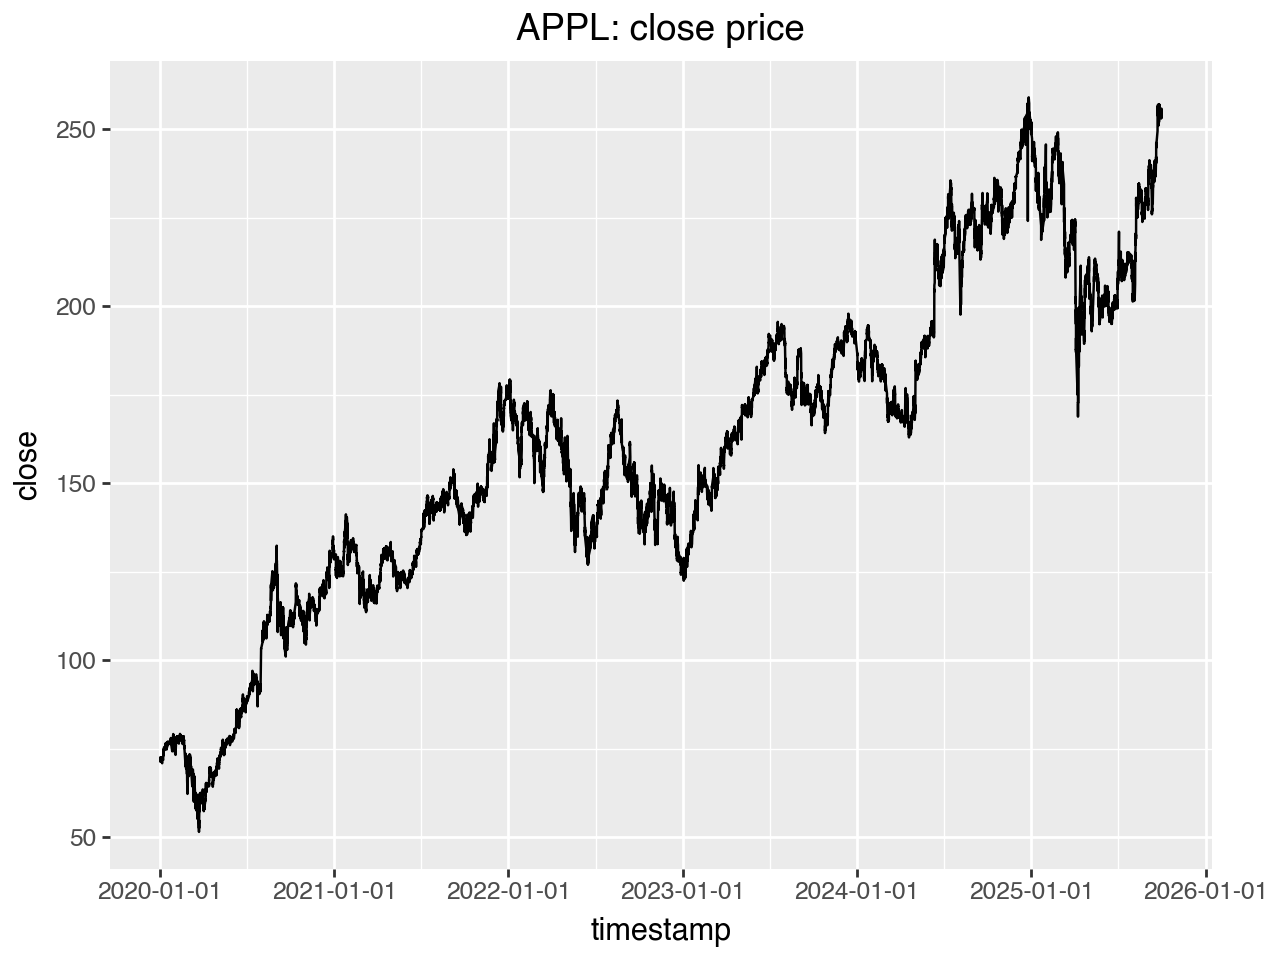

In [16]:
plot_timeseries(aapl_df, 'close', "APPL")

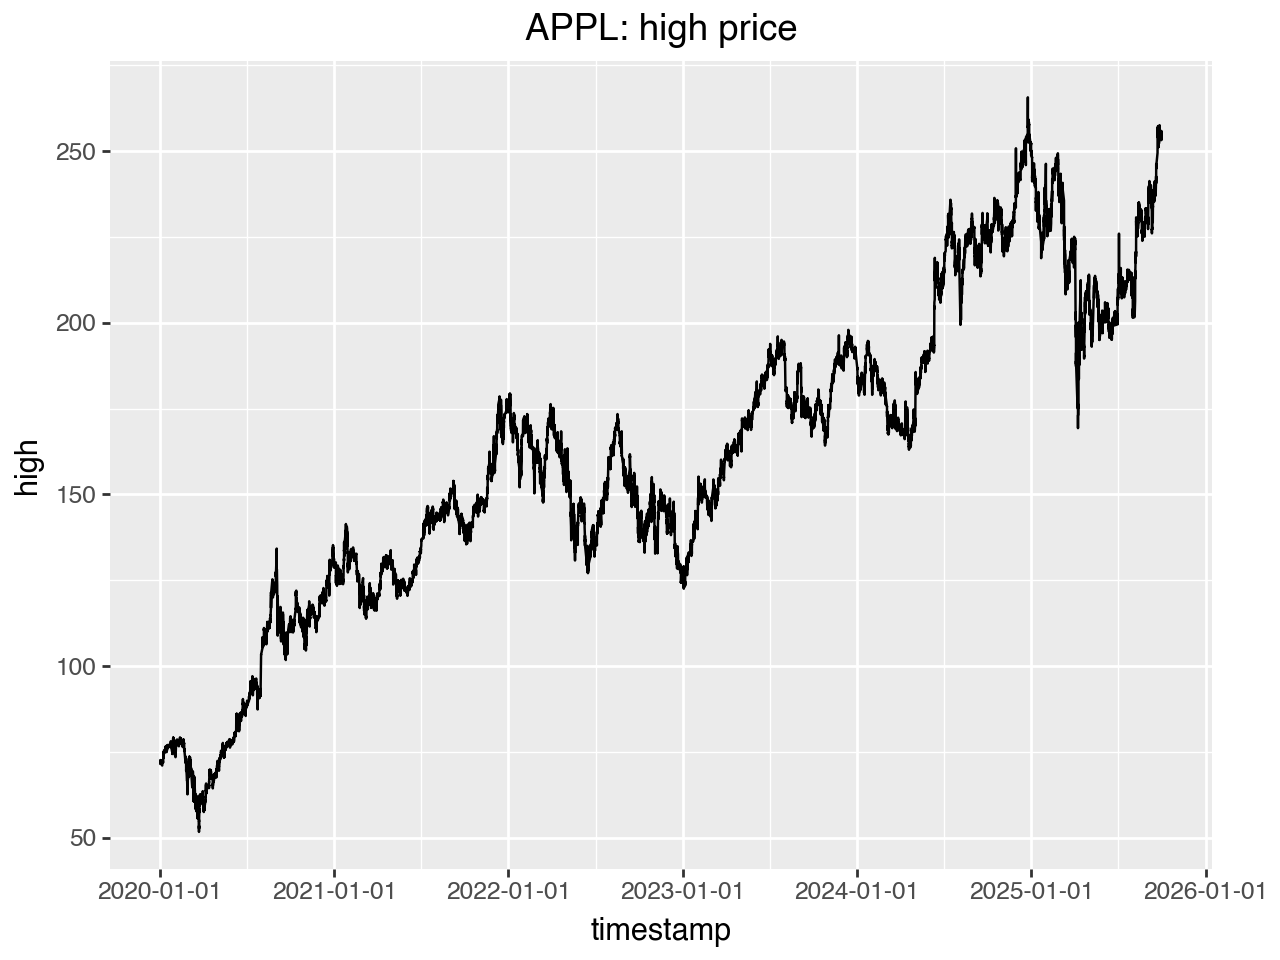

In [17]:
plot_timeseries(aapl_df, 'high', "APPL")


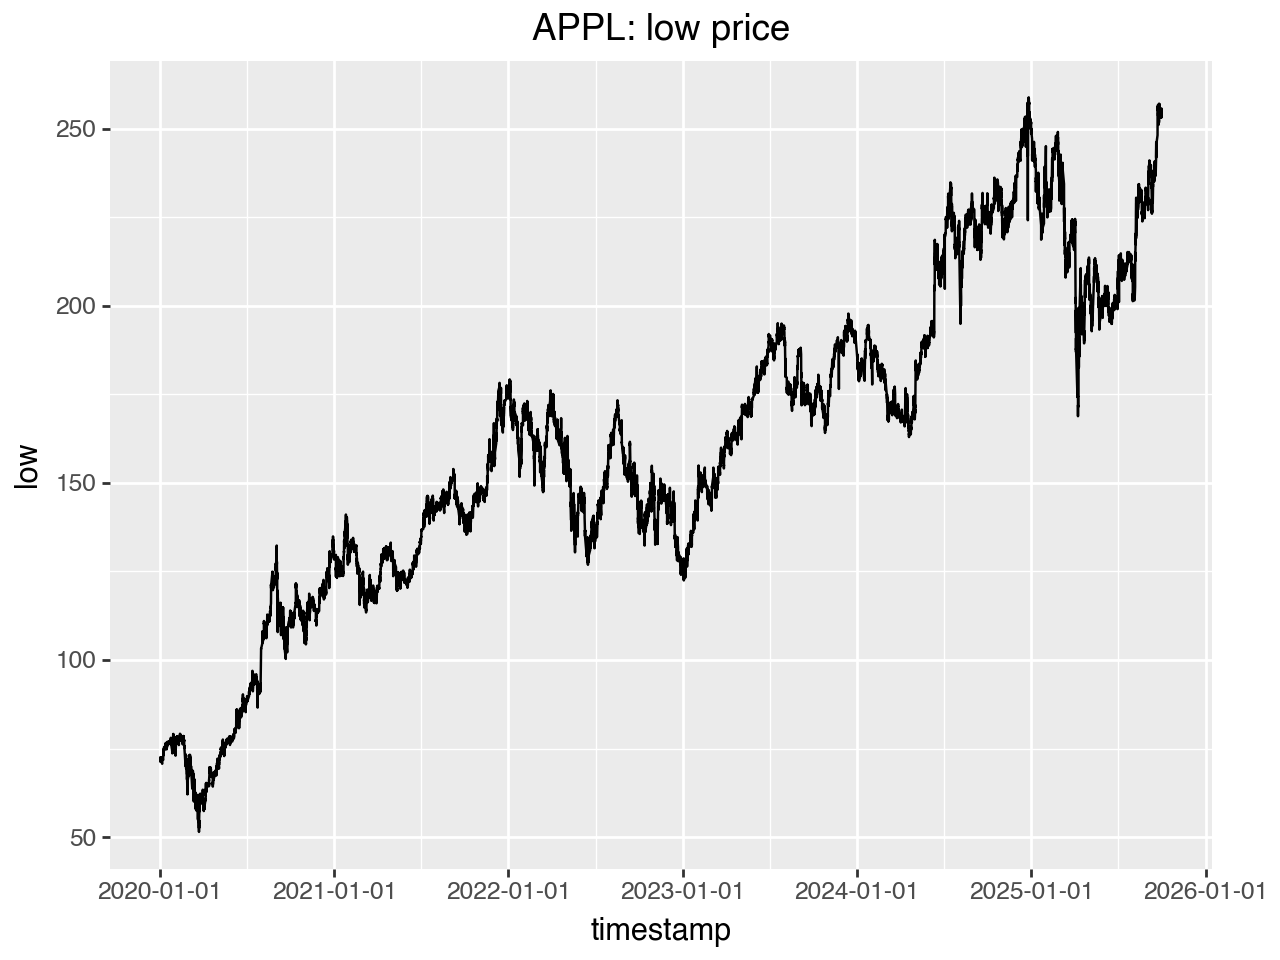

In [18]:
plot_timeseries(aapl_df, 'low', "APPL")

### Eli Lilly Plots

Notice that the stock price was increasing steadily until March 2023 when the price increased dramatically. Since June 2024, the LLY stock price has been on a general decreasing trend

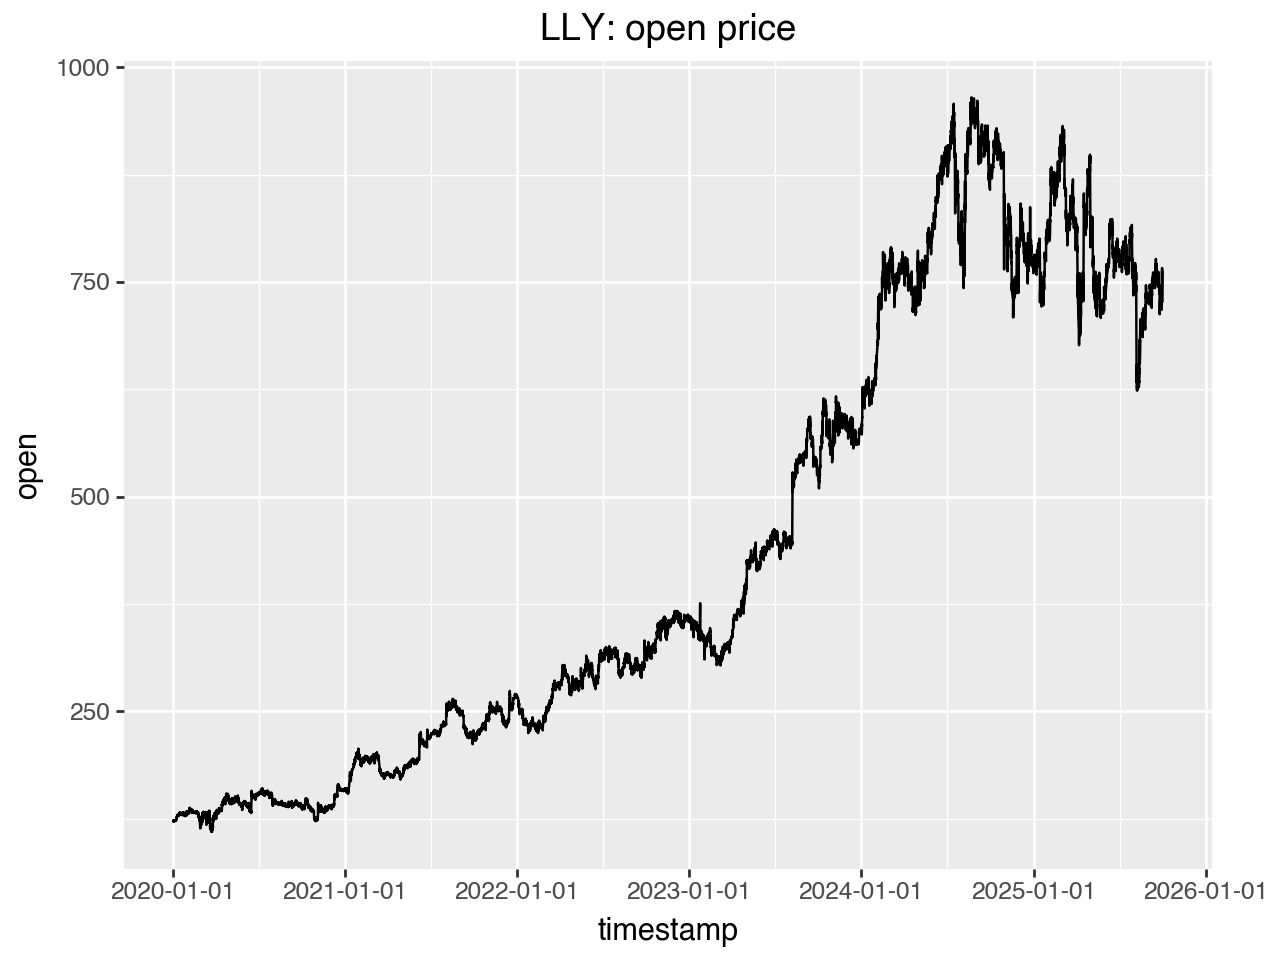

In [19]:
plot_timeseries(lly_df, 'open', 'LLY')

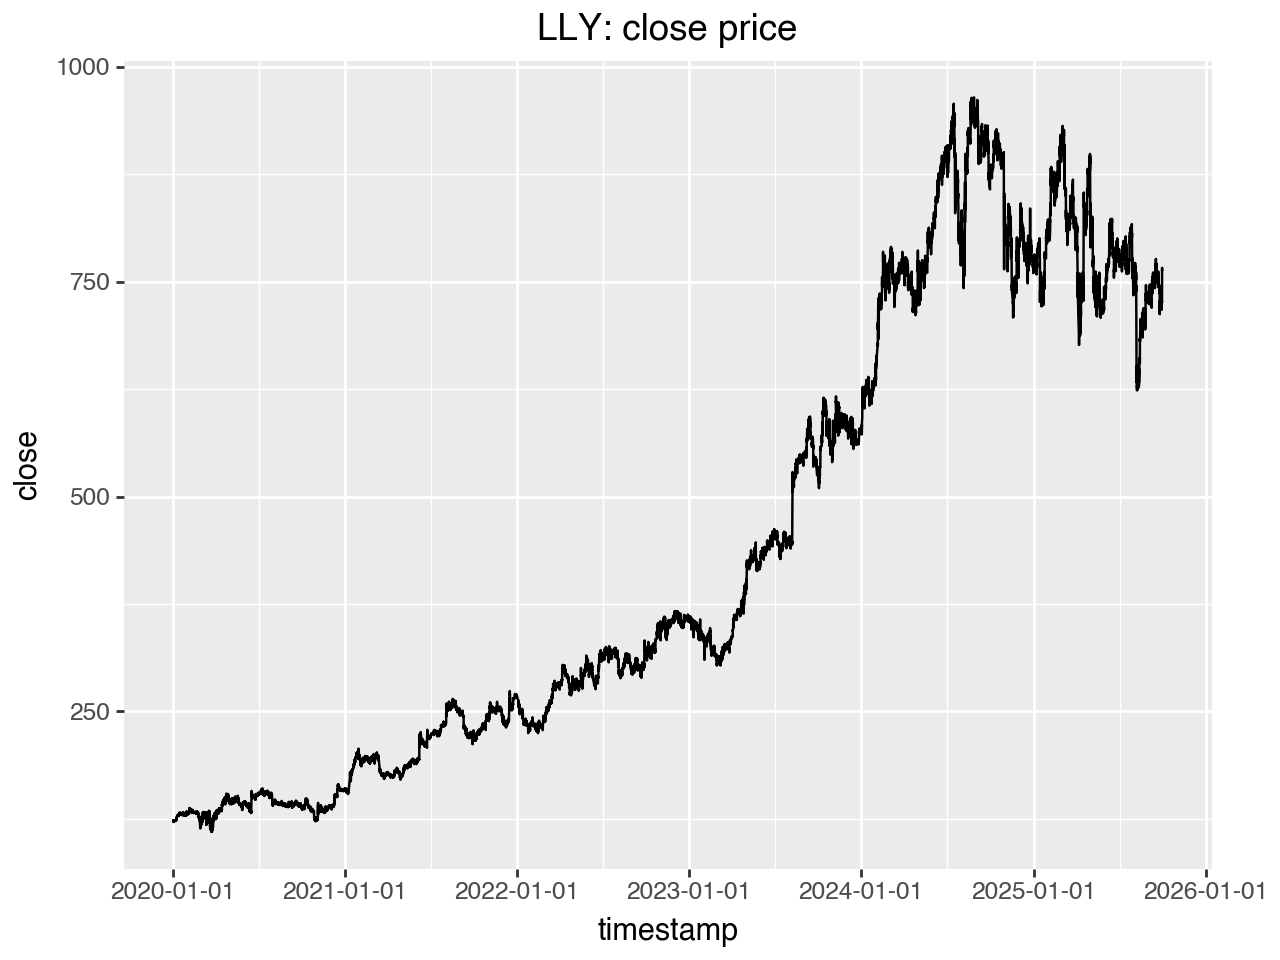

In [20]:
plot_timeseries(lly_df, 'close', 'LLY')

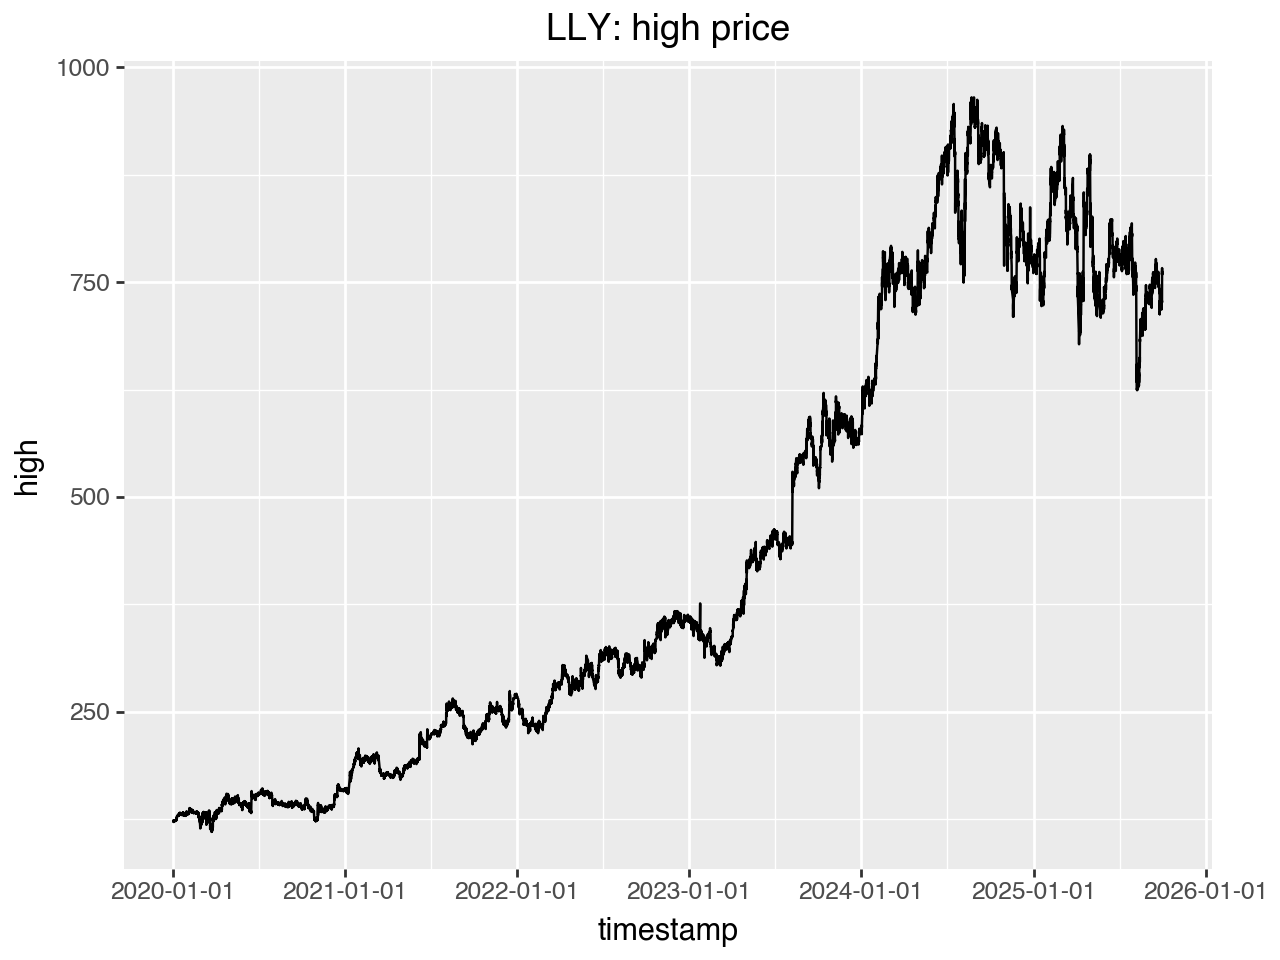

In [21]:
plot_timeseries(lly_df, 'high', 'LLY')

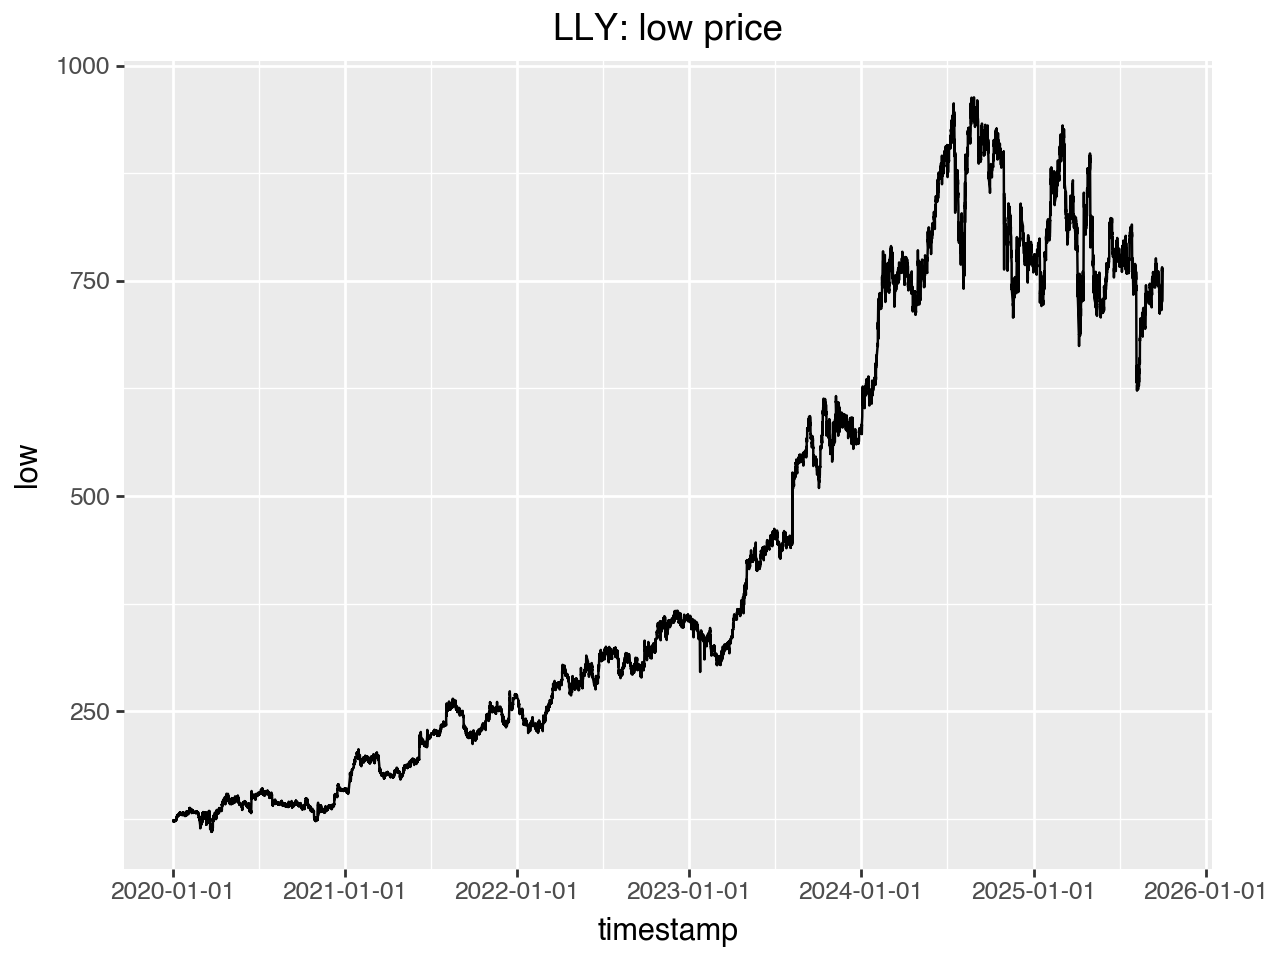

In [22]:
plot_timeseries(lly_df, 'low', 'LLY')

### Brookfield Plots

Notice that the Brookfield stock price shot up dramatically startin in March 2020 through the end of the year. Since then, there have been many flucations, but a general decrease in stock price. Since the start of 2025, the BEP stock prices has been mostly increasing.

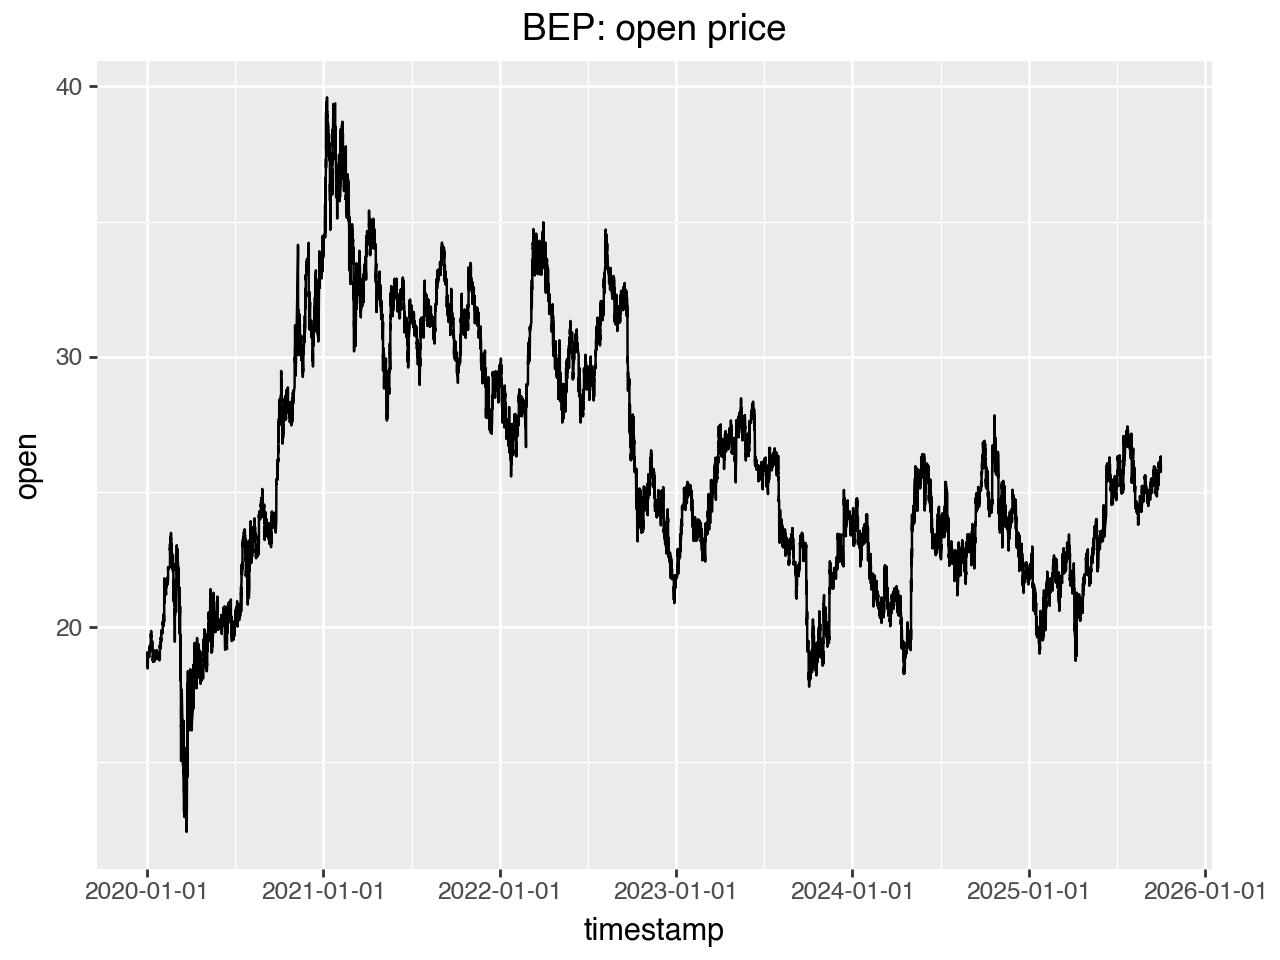

In [23]:
plot_timeseries(bep_df, 'open', 'BEP')

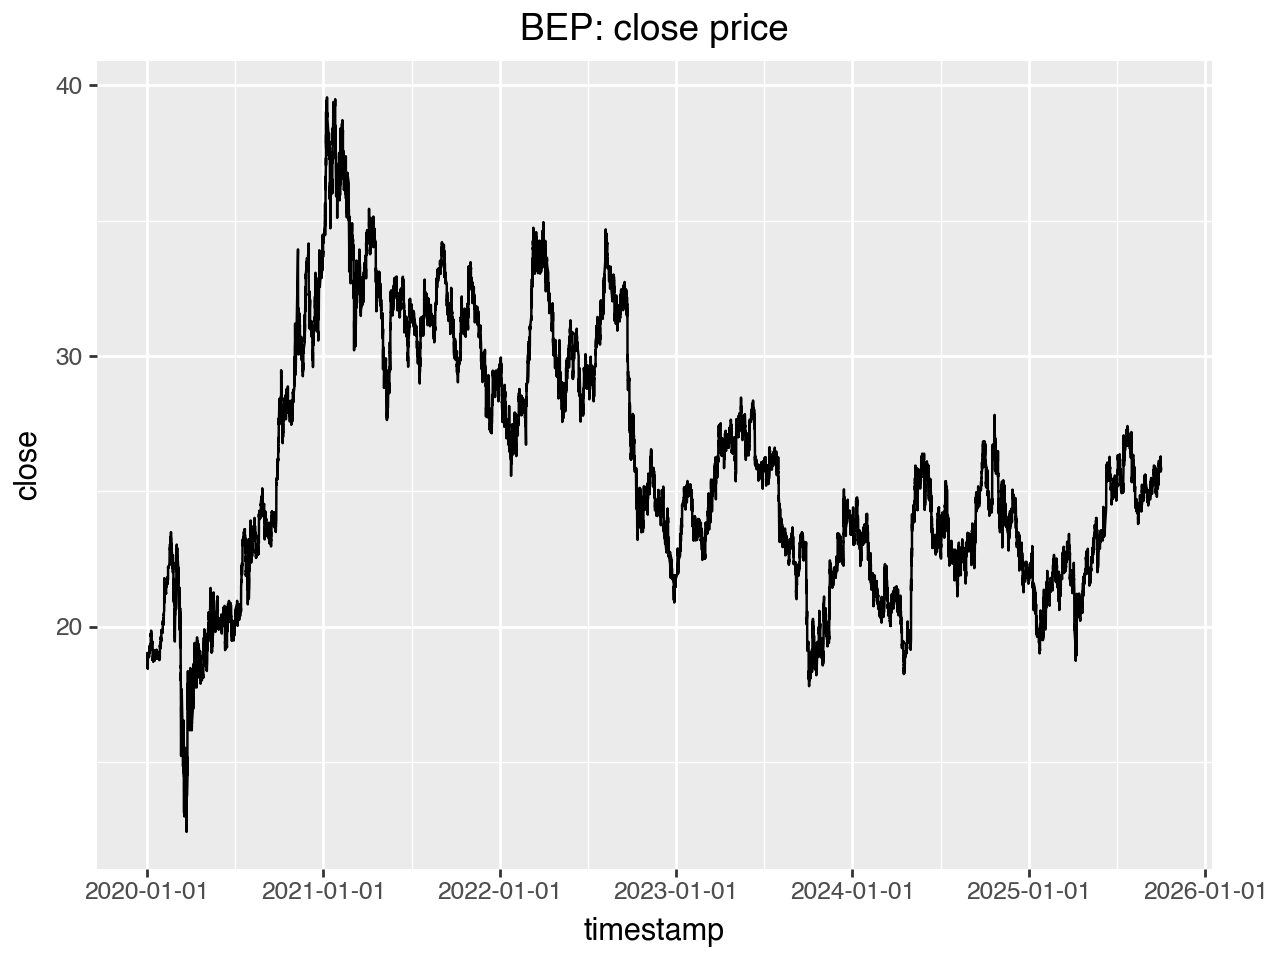

In [24]:
plot_timeseries(bep_df, 'close', 'BEP')

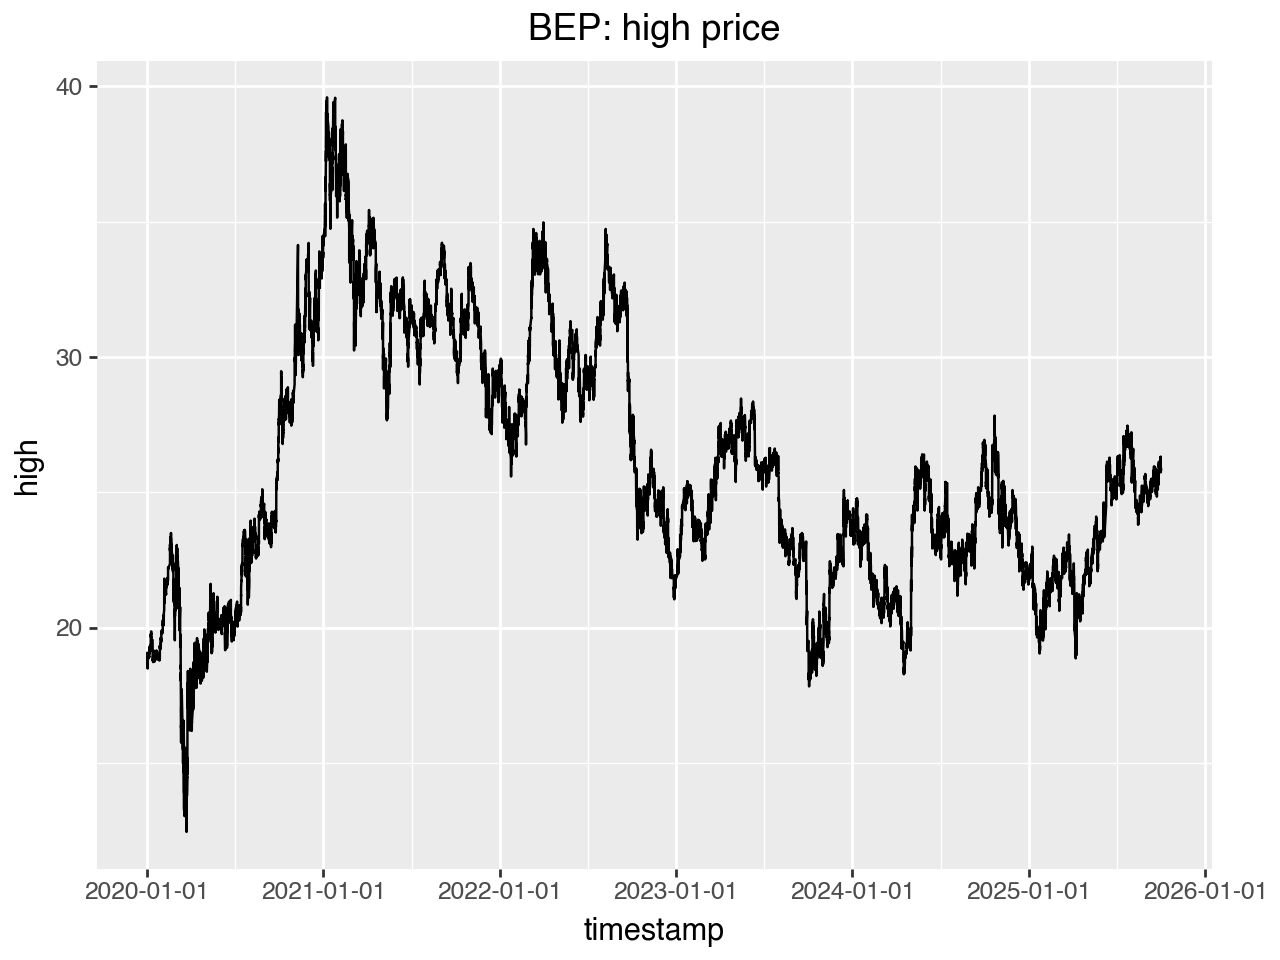

In [25]:
plot_timeseries(bep_df, 'high', 'BEP')

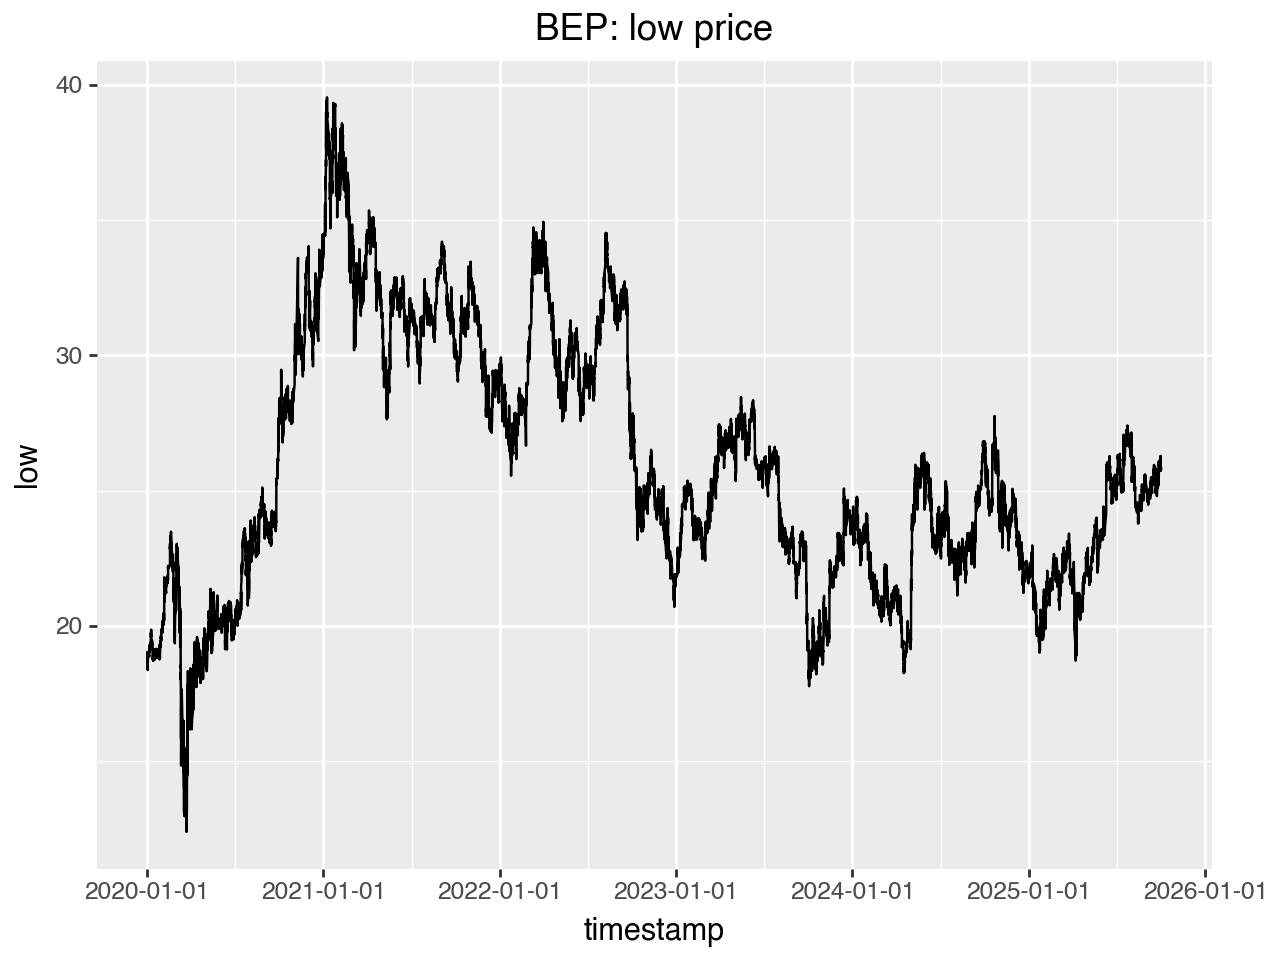

In [26]:
plot_timeseries(bep_df, 'low', 'BEP')

# Returns

In [149]:
#Load in AAPL data, make returns, variance, and volatility
AAPL_returns = pd.DataFrame({
    "time_stamp": aapl_df['timestamp'],
    "log_return": np.log(1+(aapl_df['close']-aapl_df['open'])/aapl_df['open'])
})
AAPL_returns['time_stamp'] = pd.to_datetime(AAPL_returns['time_stamp'], errors='coerce')
daily_variance_AAPL = AAPL_returns.groupby(AAPL_returns['time_stamp'].dt.floor("1D"))["log_return"].var()


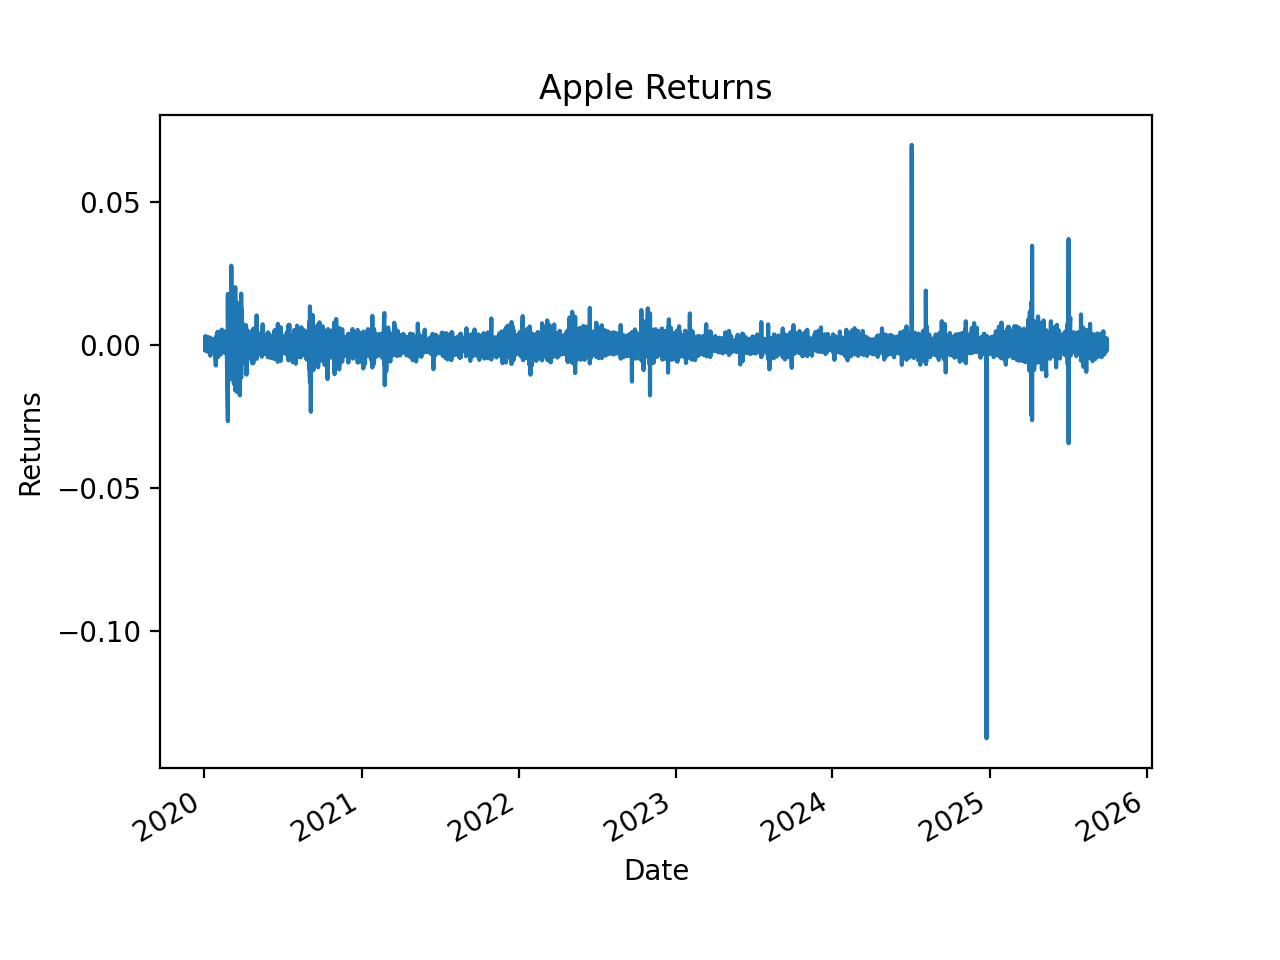

In [150]:
#Plot returns
AAPL_returns.set_index("time_stamp", inplace=True)
AAPL_returns.log_return.plot()
plt.xlabel("Date")
plt.ylabel("Returns")
plt.title("Apple Returns")
plt.show()

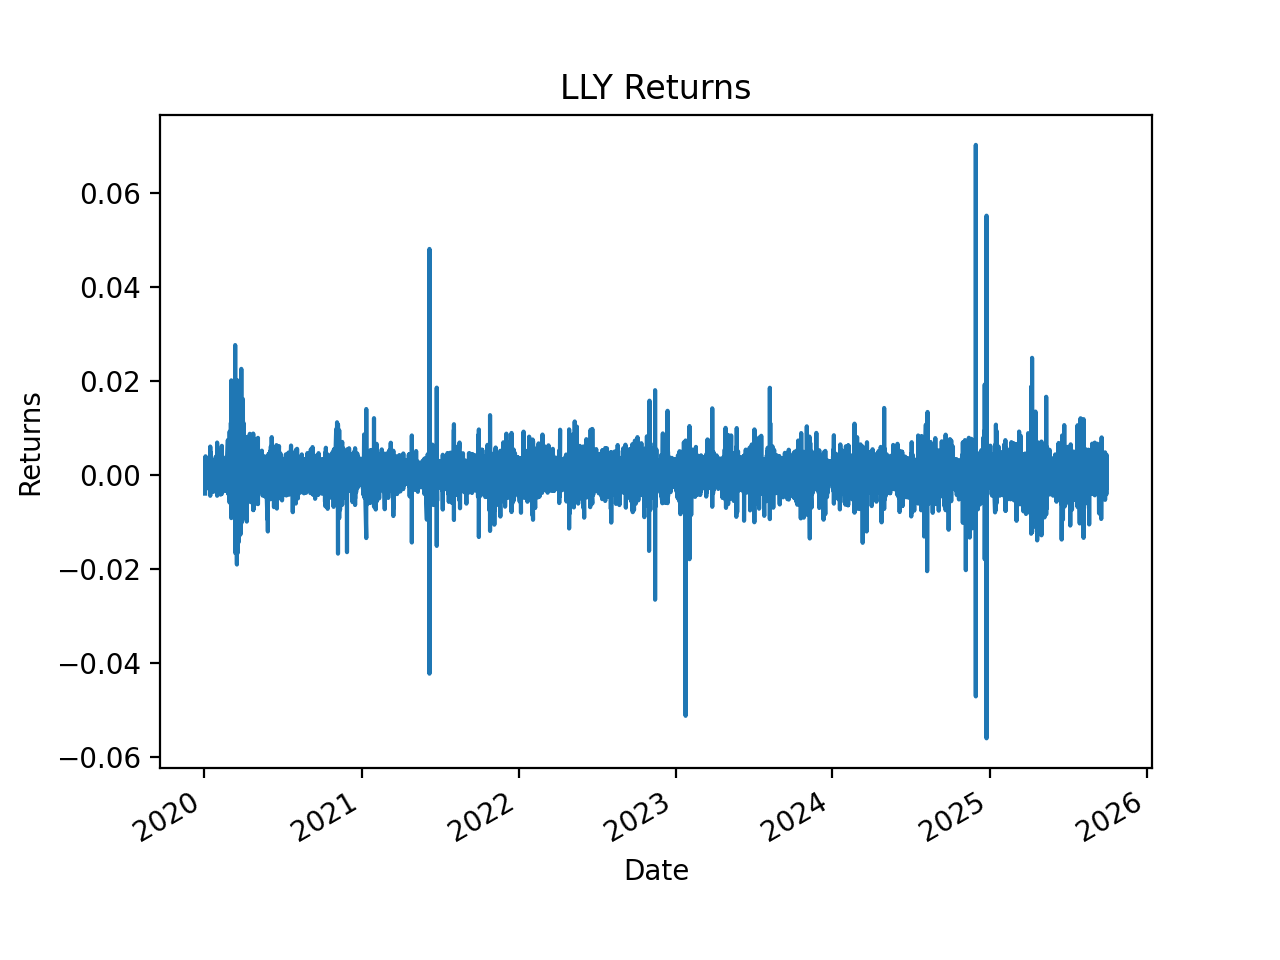

In [151]:
LLY_returns = pd.DataFrame({
    "time_stamp": lly_df["timestamp"],
    "log_return": np.log(1+(lly_df['close']-lly_df['open'])/lly_df['open'])
})
LLY_returns['time_stamp'] = pd.to_datetime(LLY_returns['time_stamp'], errors='coerce')
daily_variance_LLY = LLY_returns.groupby(LLY_returns['time_stamp'].dt.floor("1D"))["log_return"].var()

LLY_returns.set_index("time_stamp", inplace=True)
LLY_returns.log_return.plot()
plt.xlabel("Date")
plt.ylabel("Returns")
plt.title("LLY Returns")
plt.show()

In [152]:
BEP_returns = pd.DataFrame({
    "time_stamp": bep_df["timestamp"],
    "log_return": np.log(1+(bep_df['close']-bep_df['open'])/bep_df['open'])
})
BEP_returns['time_stamp'] = pd.to_datetime(BEP_returns['time_stamp'], errors='coerce')
daily_variance_BEP = BEP_returns.groupby(BEP_returns['time_stamp'].dt.floor("1D"))["log_return"].var()

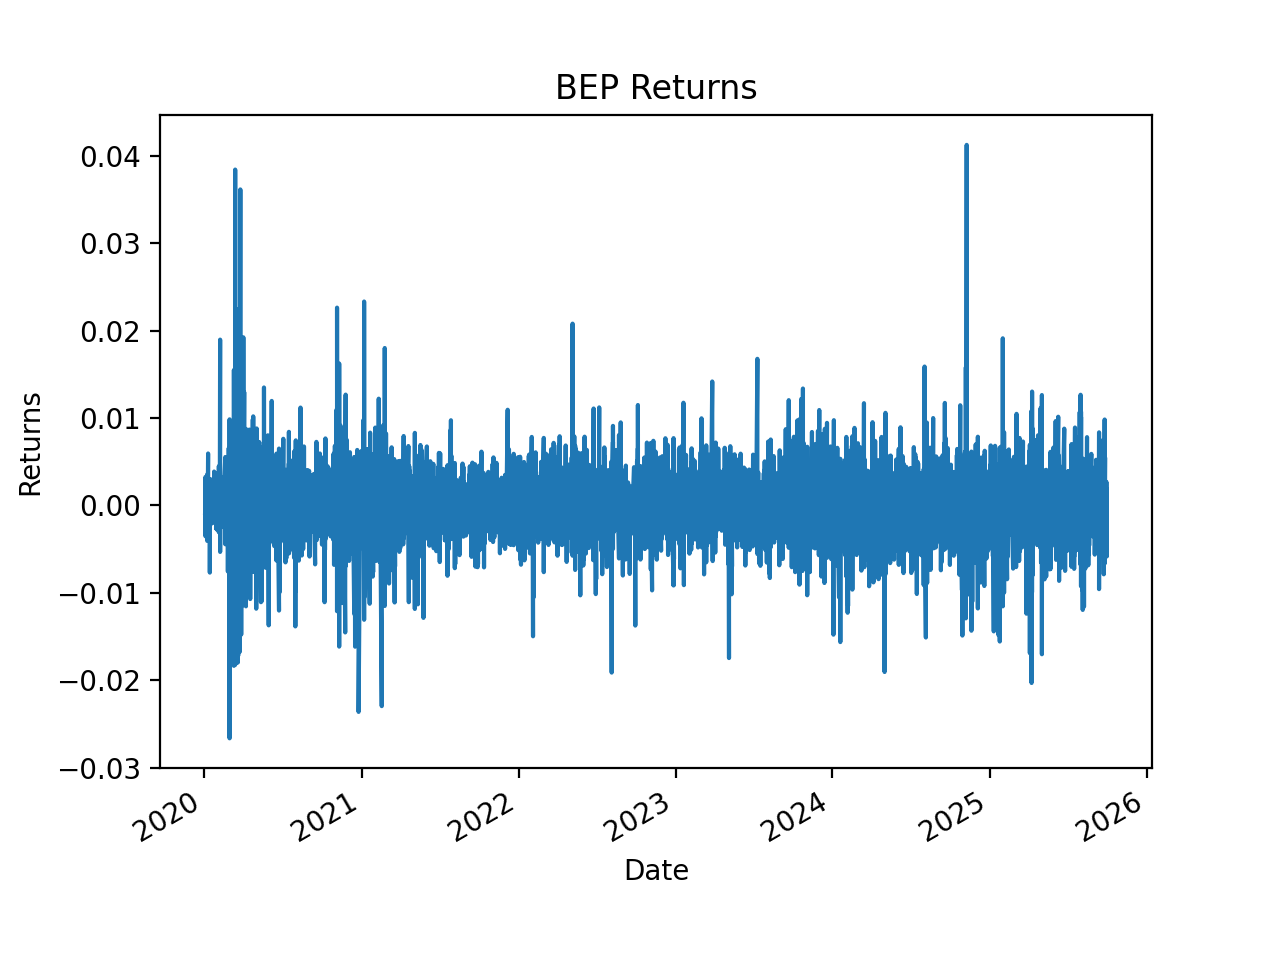

In [153]:
BEP_returns.set_index("time_stamp", inplace=True)
BEP_returns.log_return.plot()
plt.xlabel("Date")
plt.ylabel("Returns")
plt.title("BEP Returns")
plt.show()

# Variance

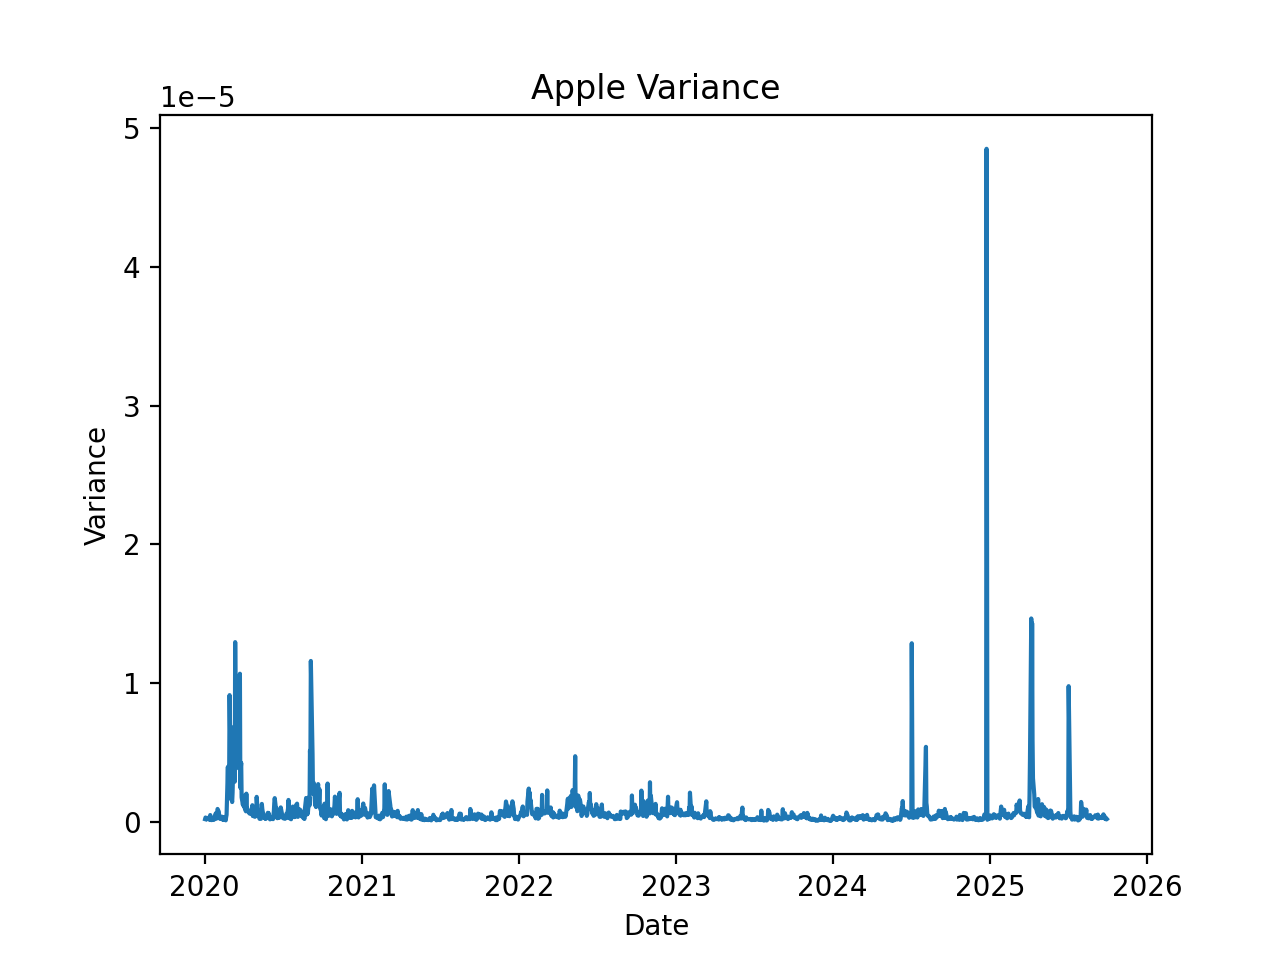

In [154]:
#Plot variance
plt.plot(daily_variance_AAPL.index, daily_variance_AAPL.values)
plt.xlabel("Date")
plt.ylabel("Variance")
plt.title("Apple Variance")
plt.show()

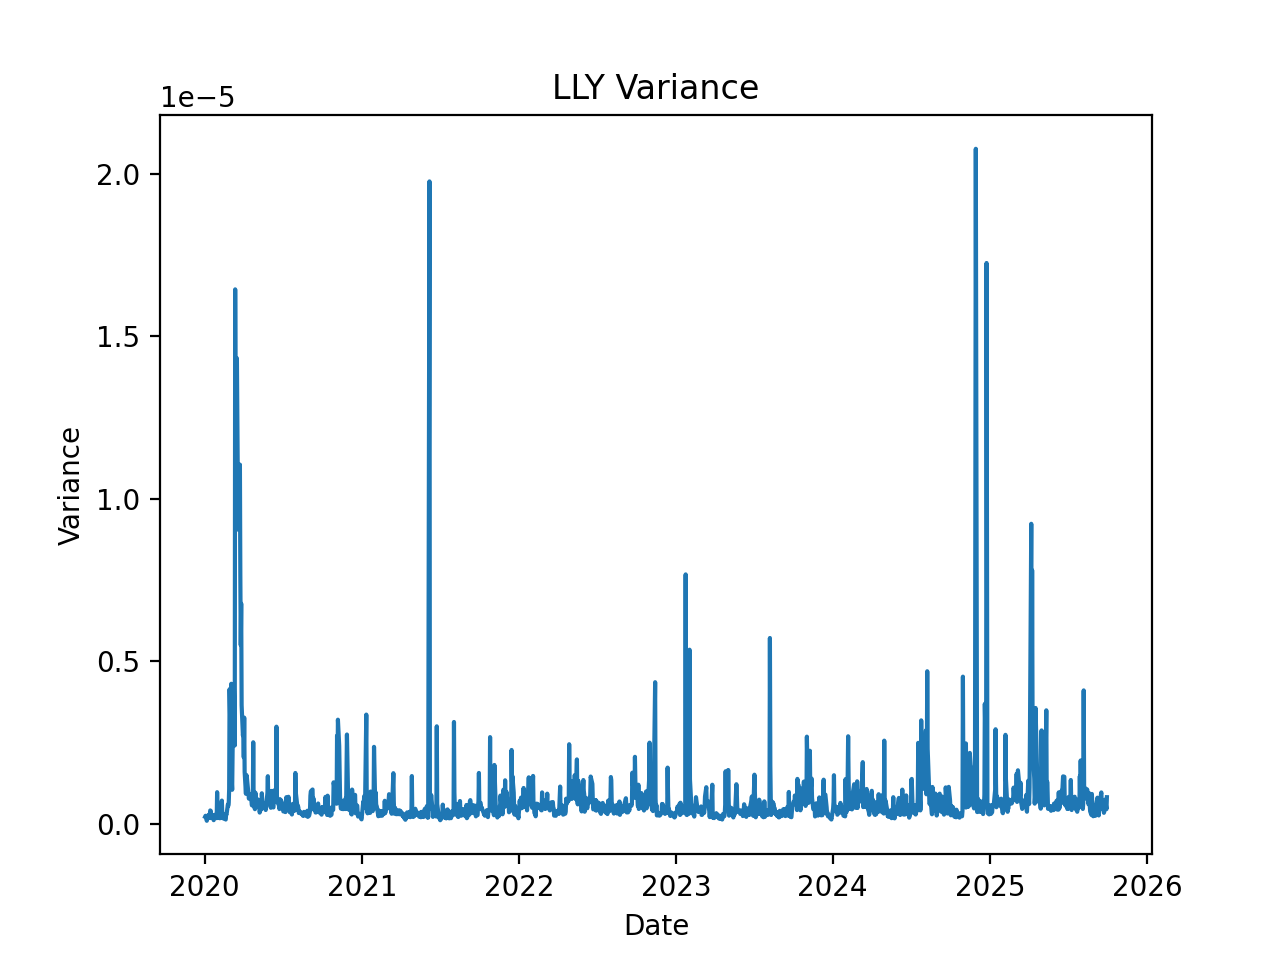

In [155]:
plt.plot(daily_variance_LLY.index, daily_variance_LLY.values)
plt.xlabel("Date")
plt.ylabel("Variance")
plt.title("LLY Variance")
plt.show()

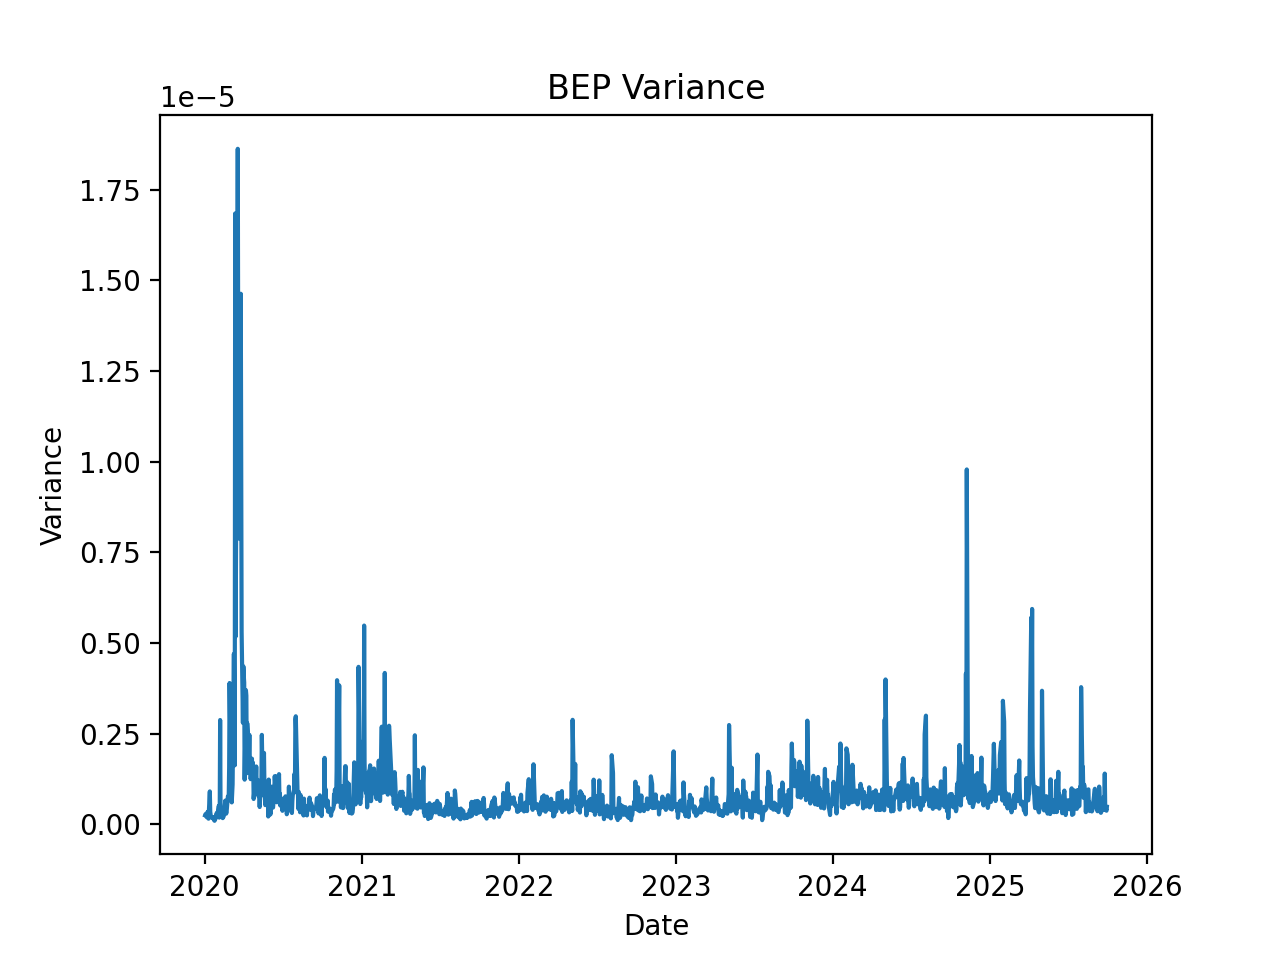

In [156]:
plt.plot(daily_variance_BEP.index, daily_variance_BEP.values)
plt.xlabel("Date")
plt.ylabel("Variance")
plt.title("BEP Variance")
plt.show()

# Volatility

## Daily Volatility

Realized Volatility

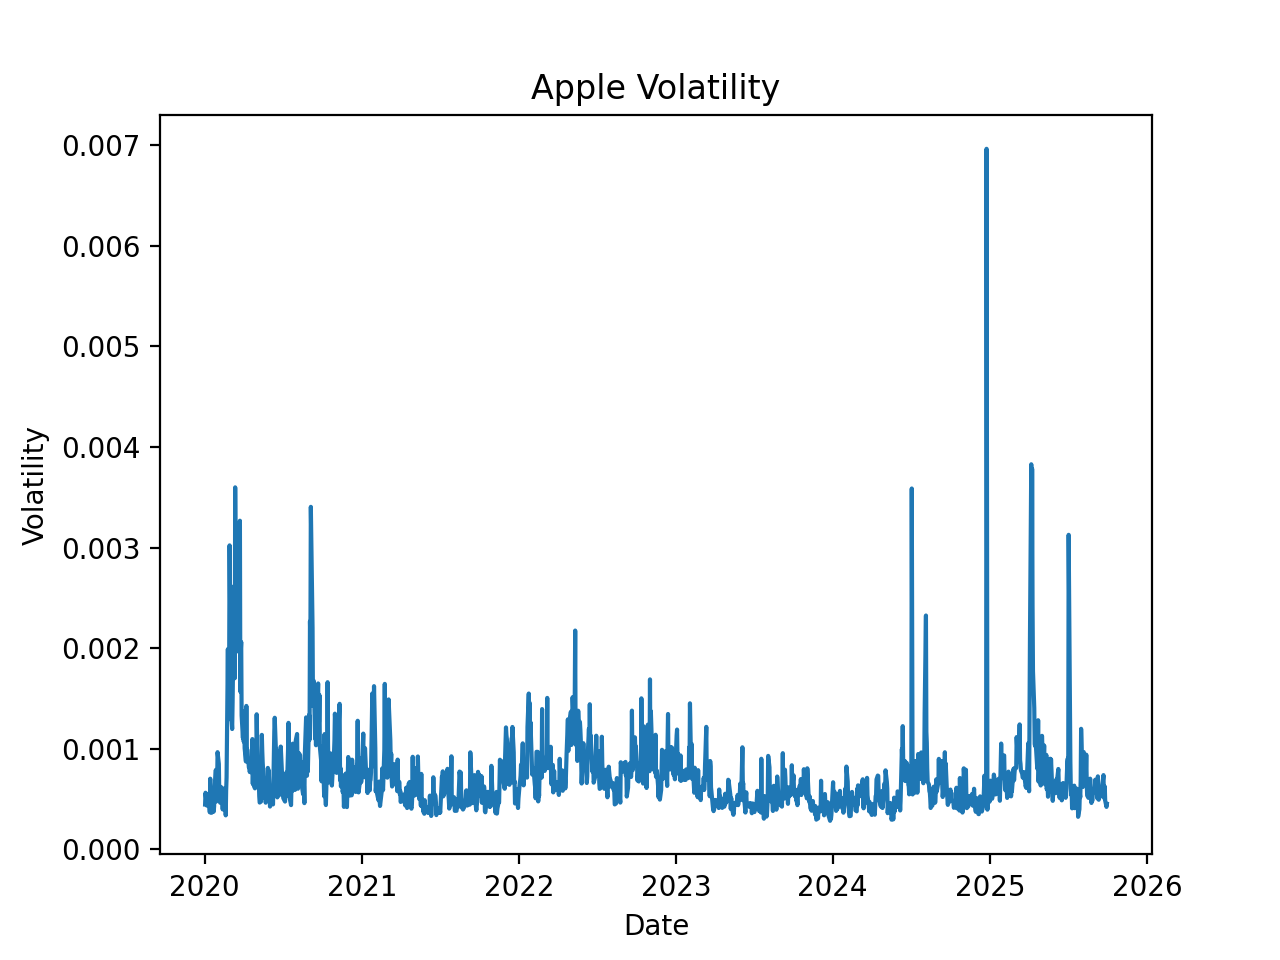

In [157]:
#Plot volatility
daily_volatility_AAPL = np.sqrt(daily_variance_AAPL)
plt.plot(daily_volatility_AAPL.index, daily_volatility_AAPL.values)
plt.xlabel("Date")
plt.ylabel("Volatility")
plt.title("Apple Volatility")
plt.show()

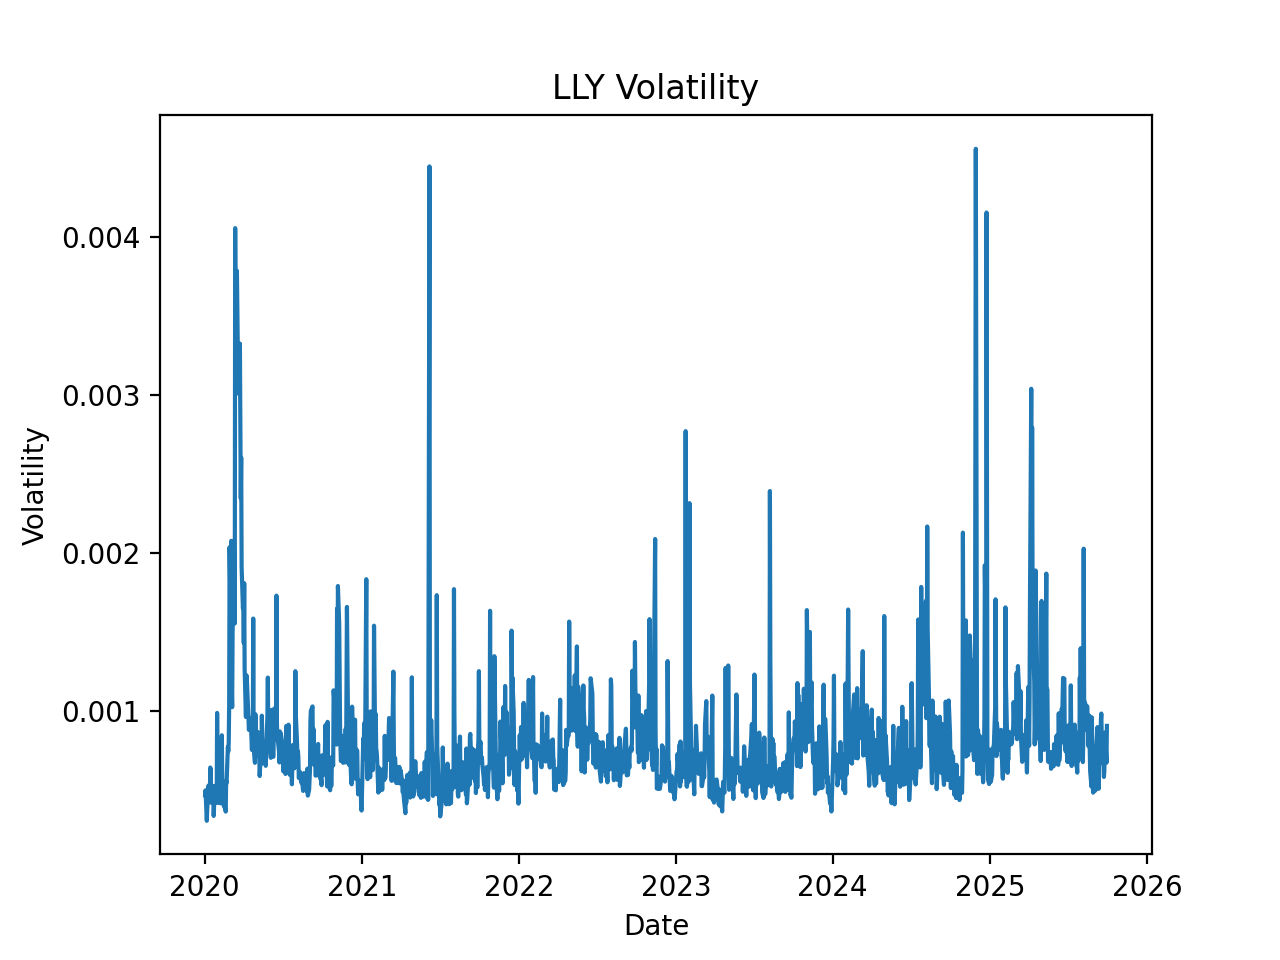

In [158]:
daily_volatility_LLY = np.sqrt(daily_variance_LLY)
plt.plot(daily_volatility_LLY.index, daily_volatility_LLY.values)
plt.xlabel("Date")
plt.ylabel("Volatility")
plt.title("LLY Volatility")
plt.show()

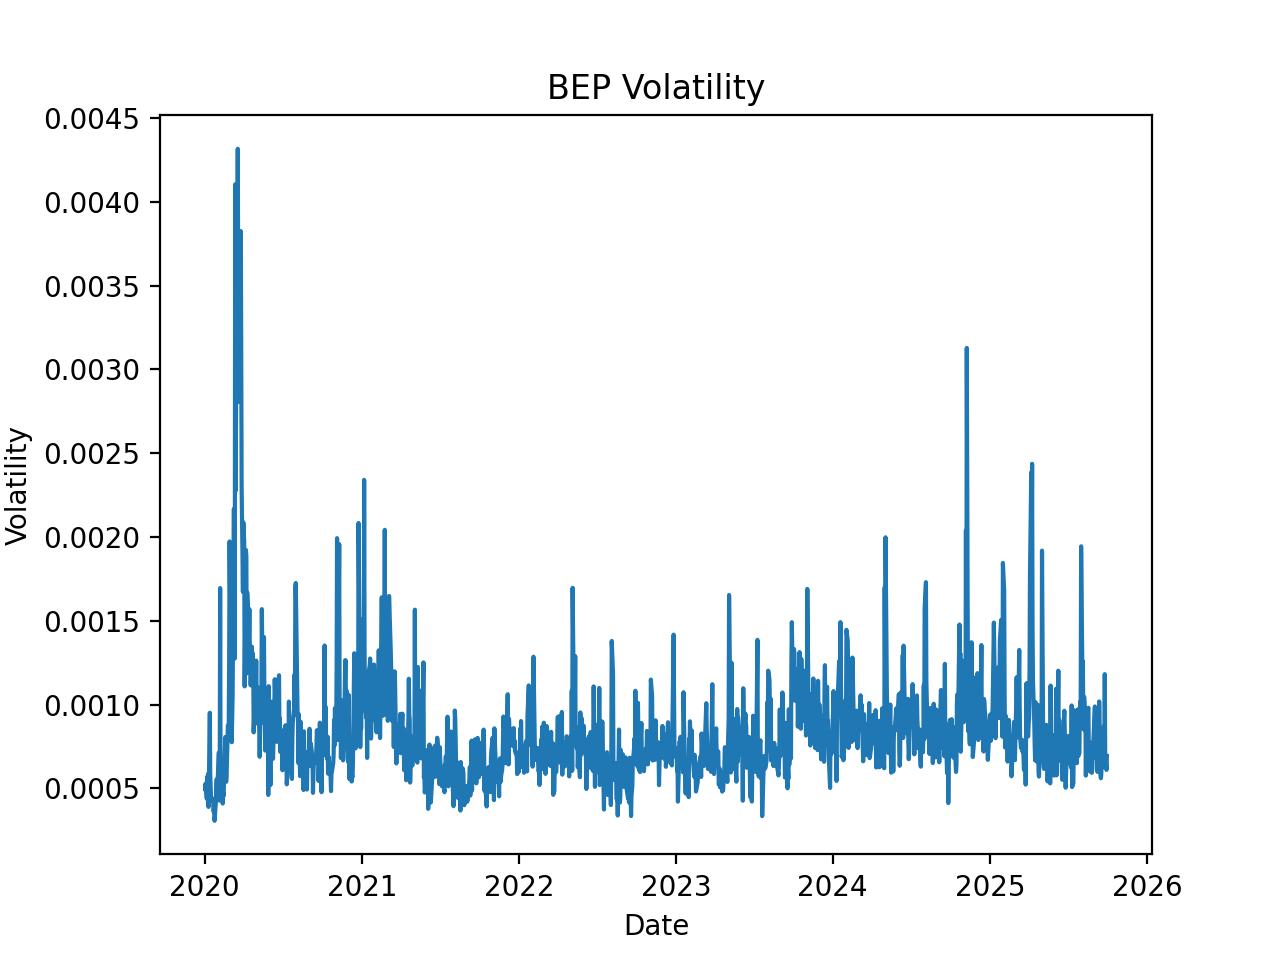

In [159]:
daily_volatility_BEP = np.sqrt(daily_variance_BEP)
plt.plot(daily_volatility_BEP.index, daily_volatility_BEP.values)
plt.xlabel("Date")
plt.ylabel("Volatility")
plt.title("BEP Volatility")
plt.show()

## Aggregated Volatility

Value ranges

In [160]:
def resample_data(df, frequency):
    agg_funcs = {'open': 'mean',
                 'close': 'mean',
                 'high': 'max',
                 'low': 'min',
                 'volume': 'sum'}
    
    df = df.set_index('timestamp')

    resampled_df = df.resample(frequency).agg(agg_funcs)
    
    resampled_df = resampled_df.reset_index()

    return resampled_df

def volatility_df(df, frequency):
    
    resampled_df = resample_data(df, frequency)

    resampled_df['open-close'] = resampled_df['open'] - resampled_df['close']
    resampled_df['high-low'] = resampled_df['high'] - resampled_df['low']
    
    return resampled_df

time_intervals = ['1H', '1D', 'W', '1M', 'Q', 'Y'] # day, month, week, month, quarter, year

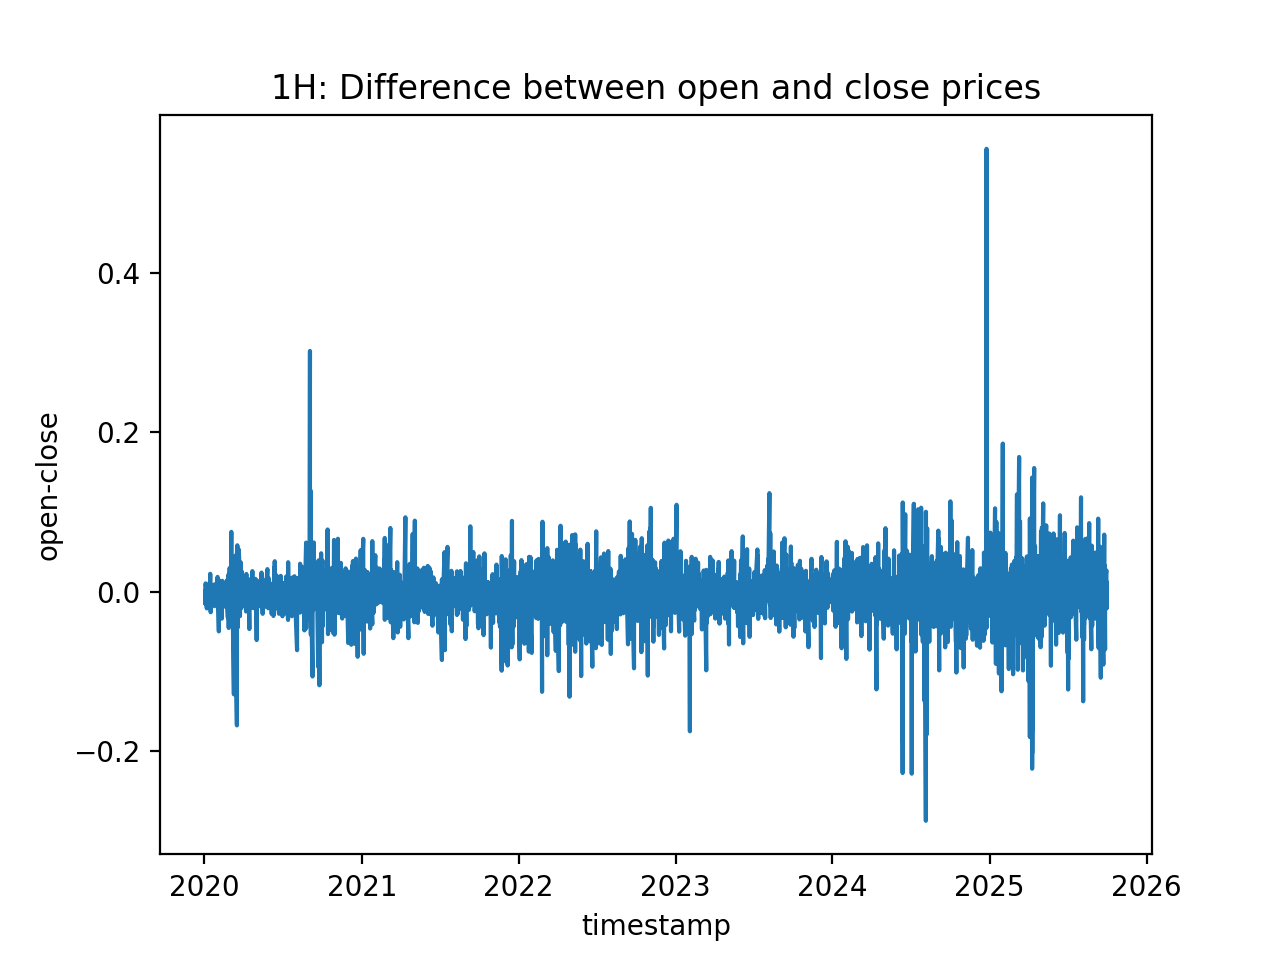

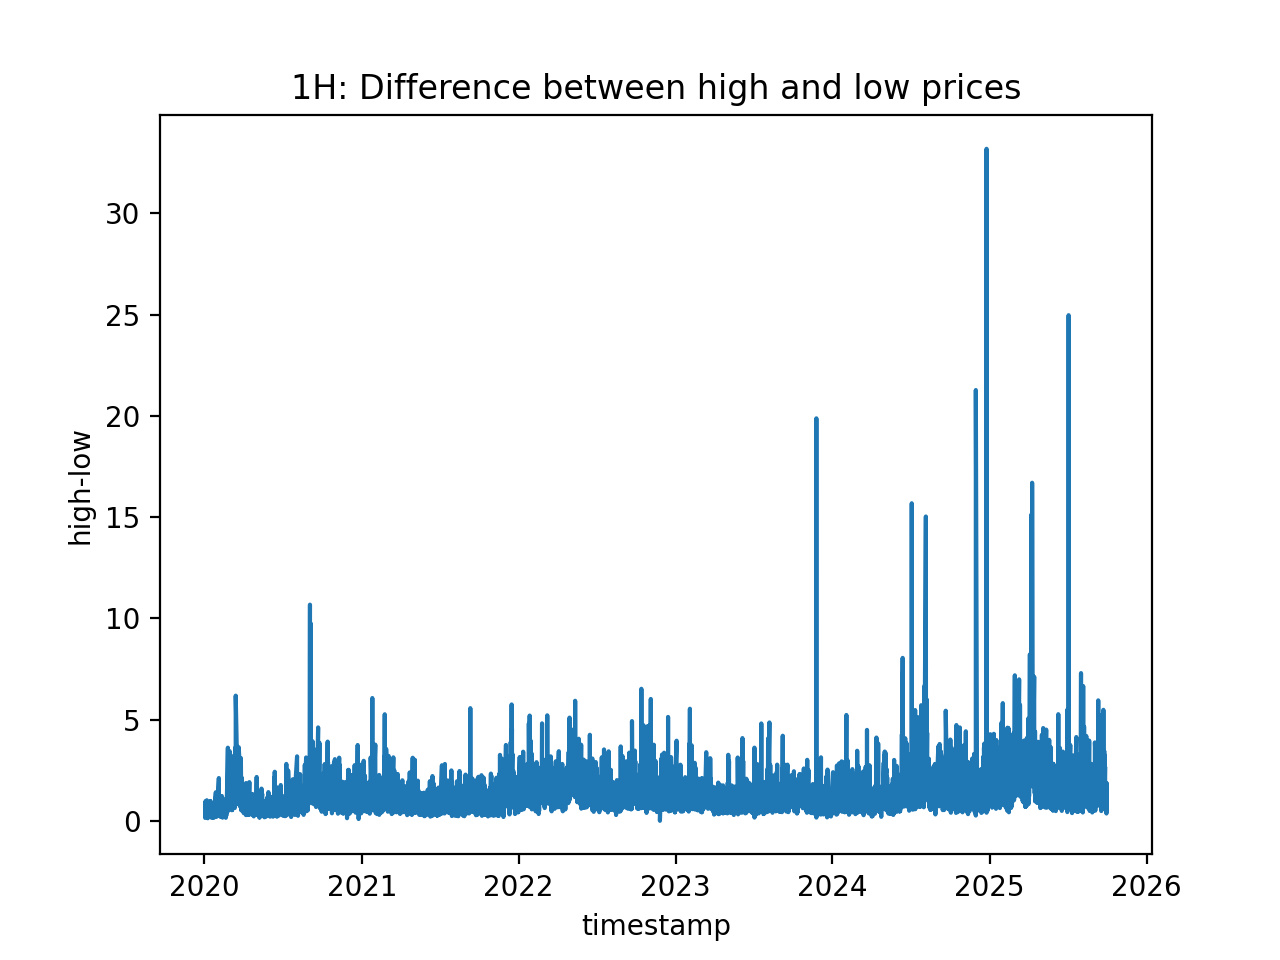

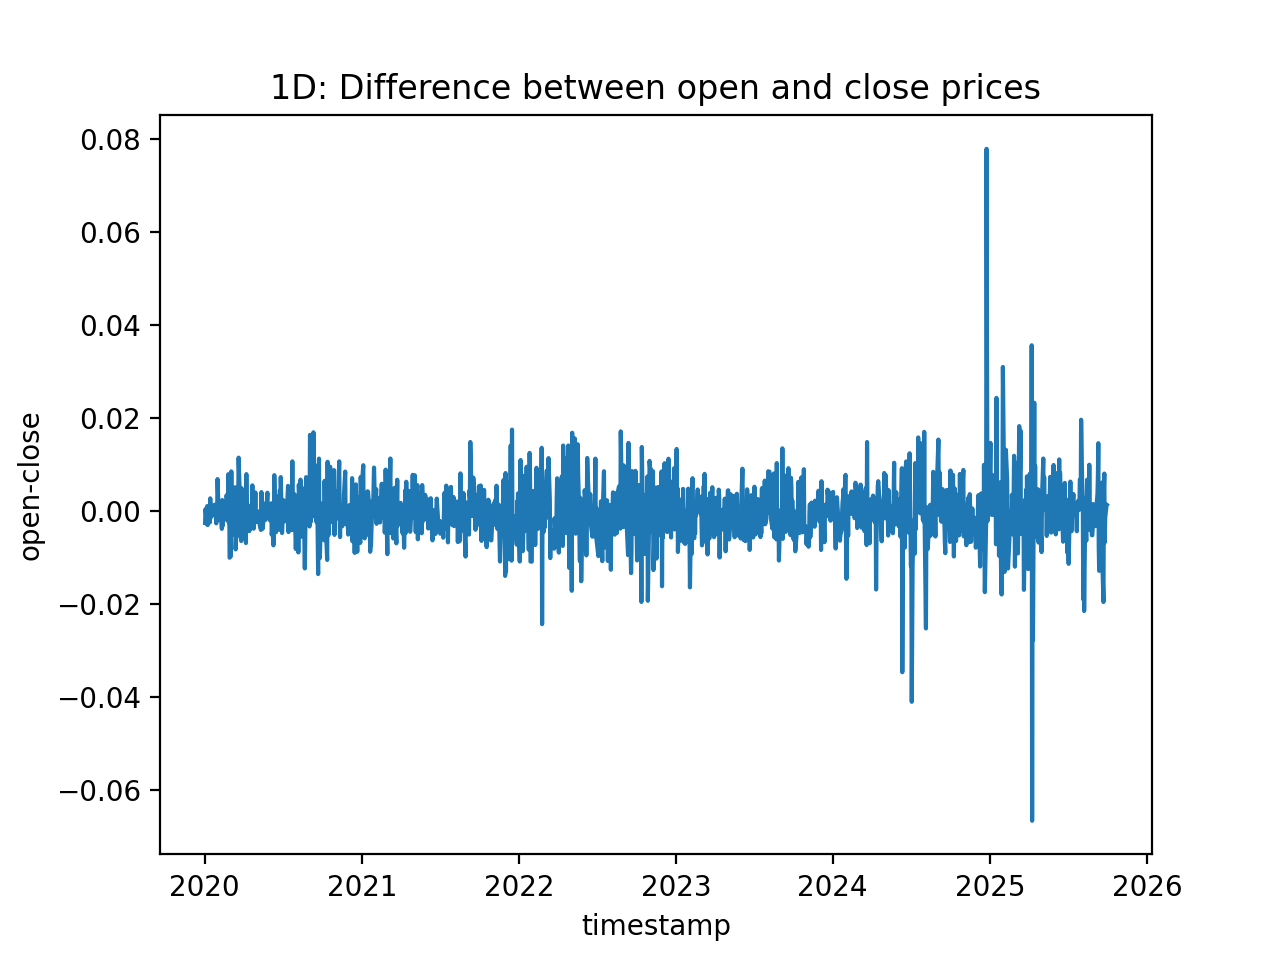

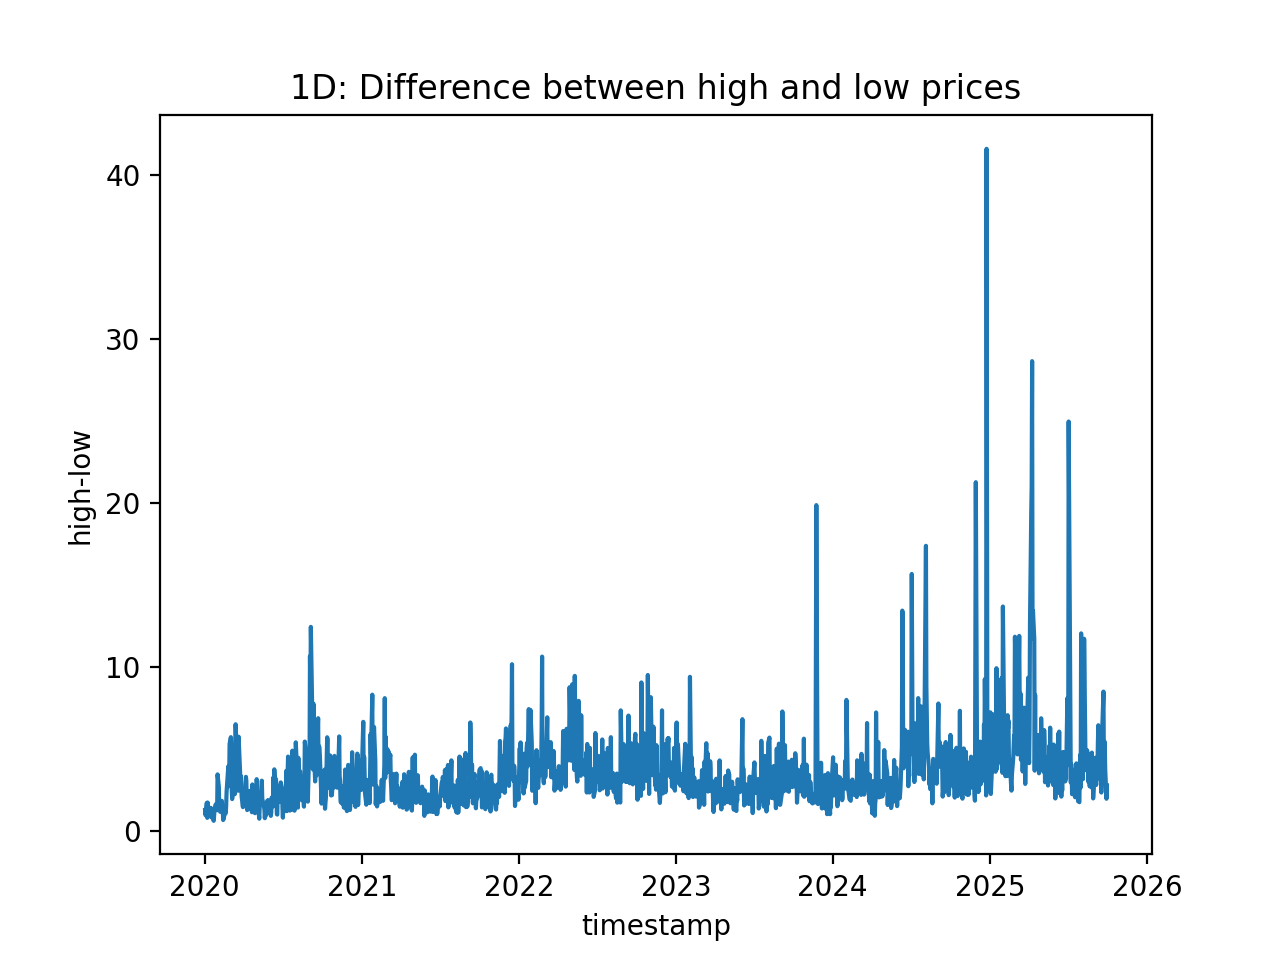

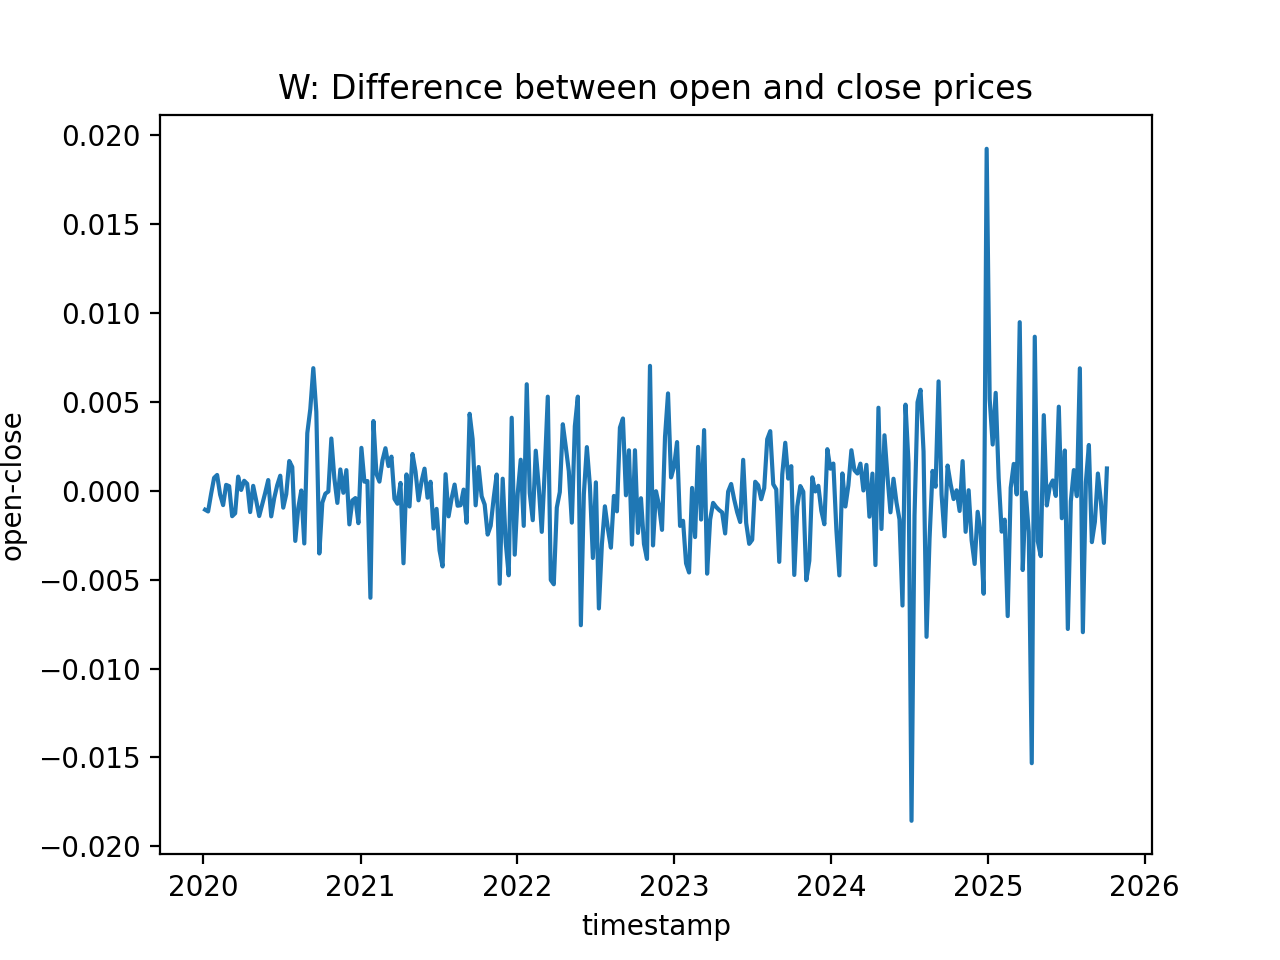

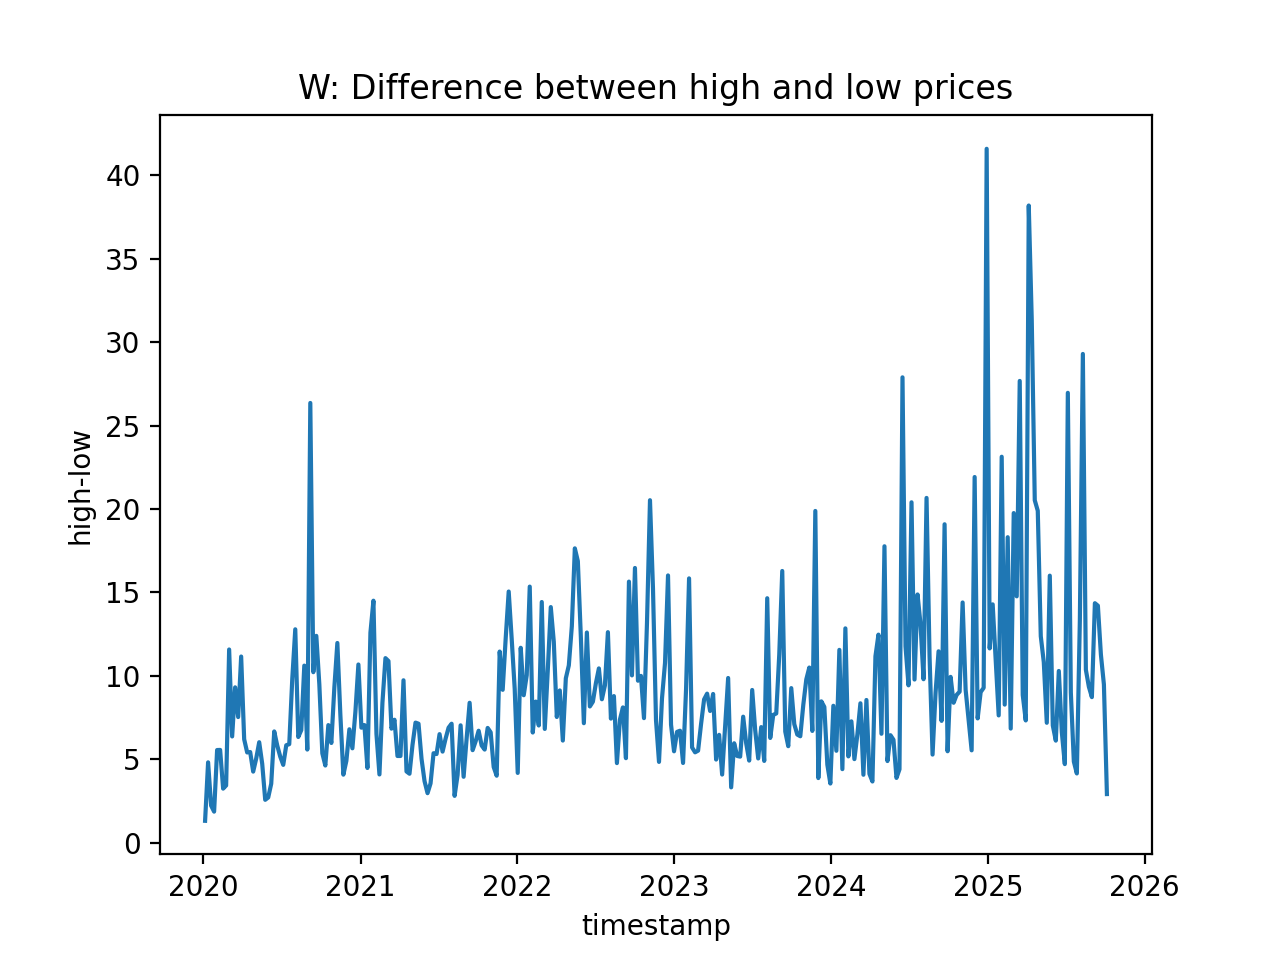

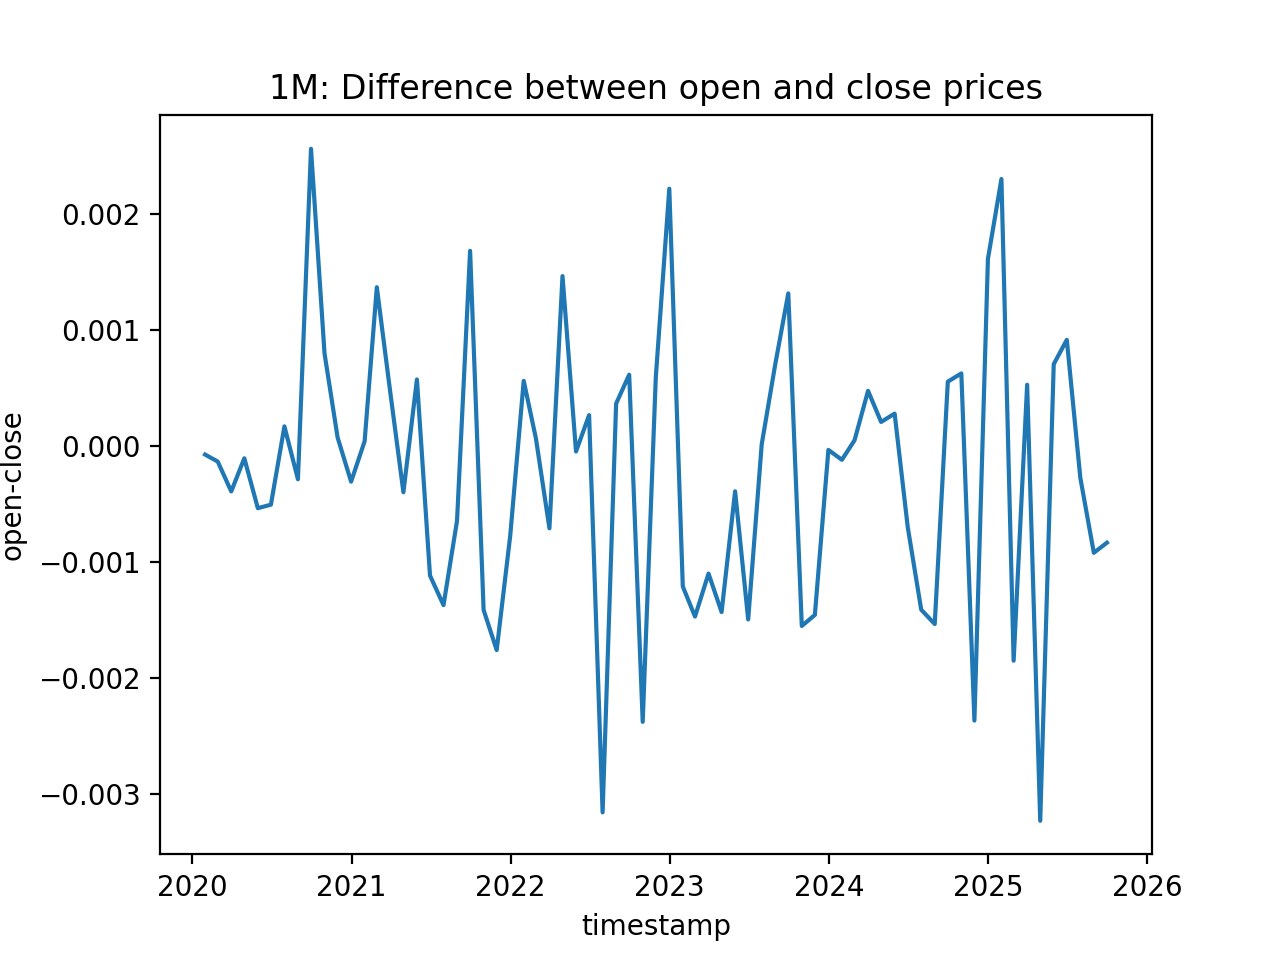

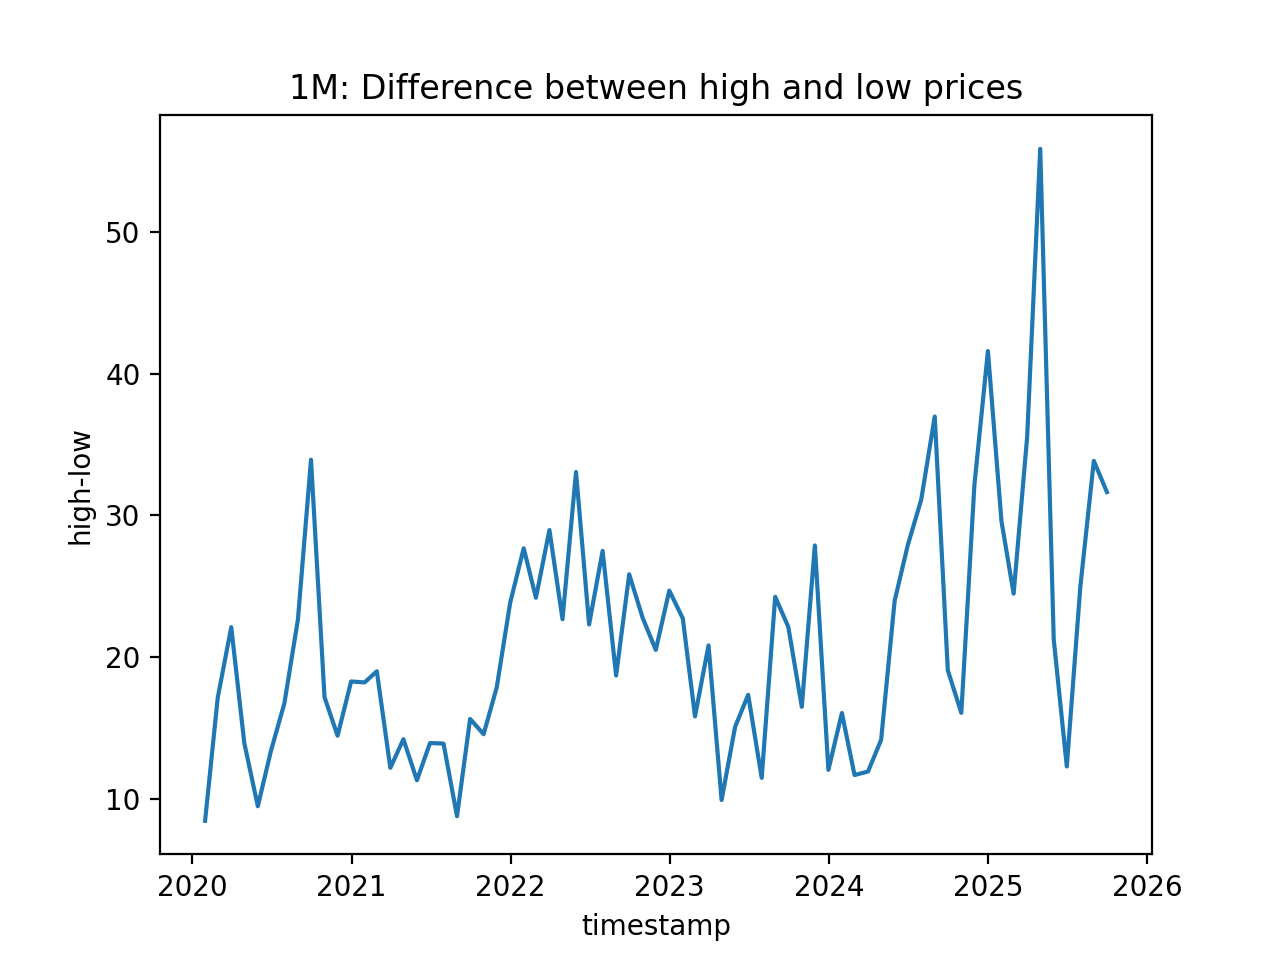

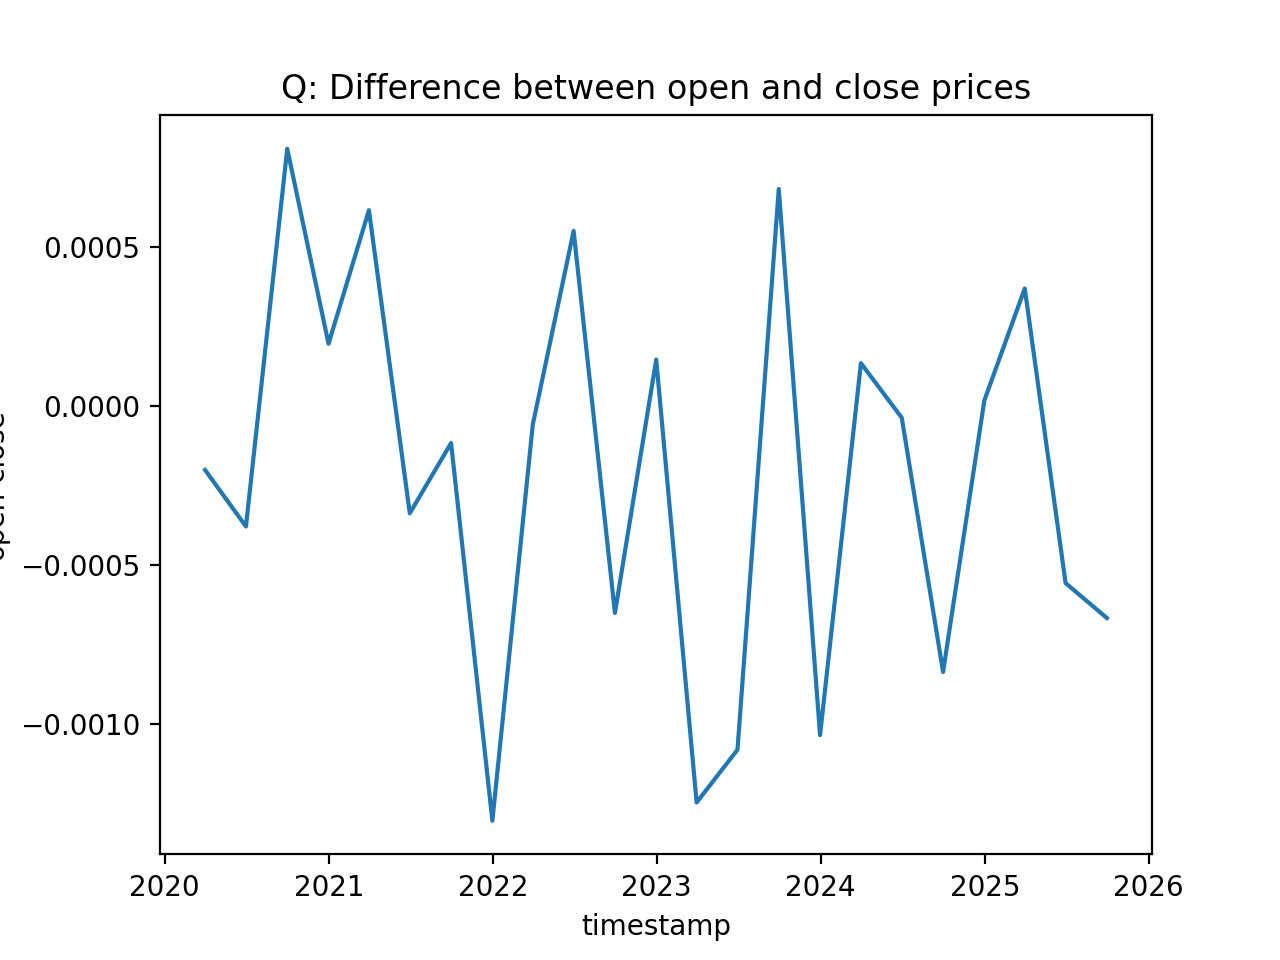

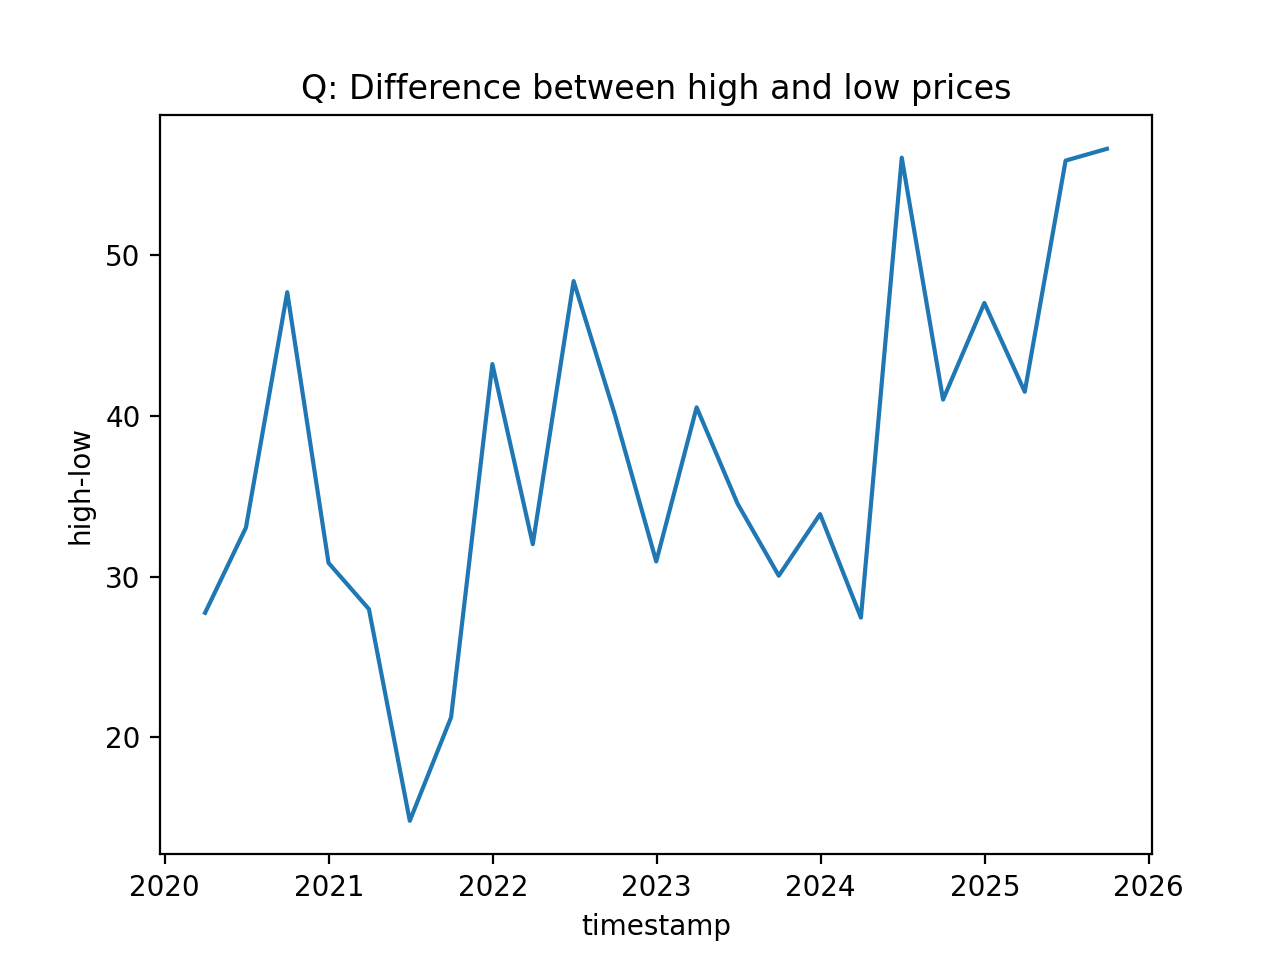

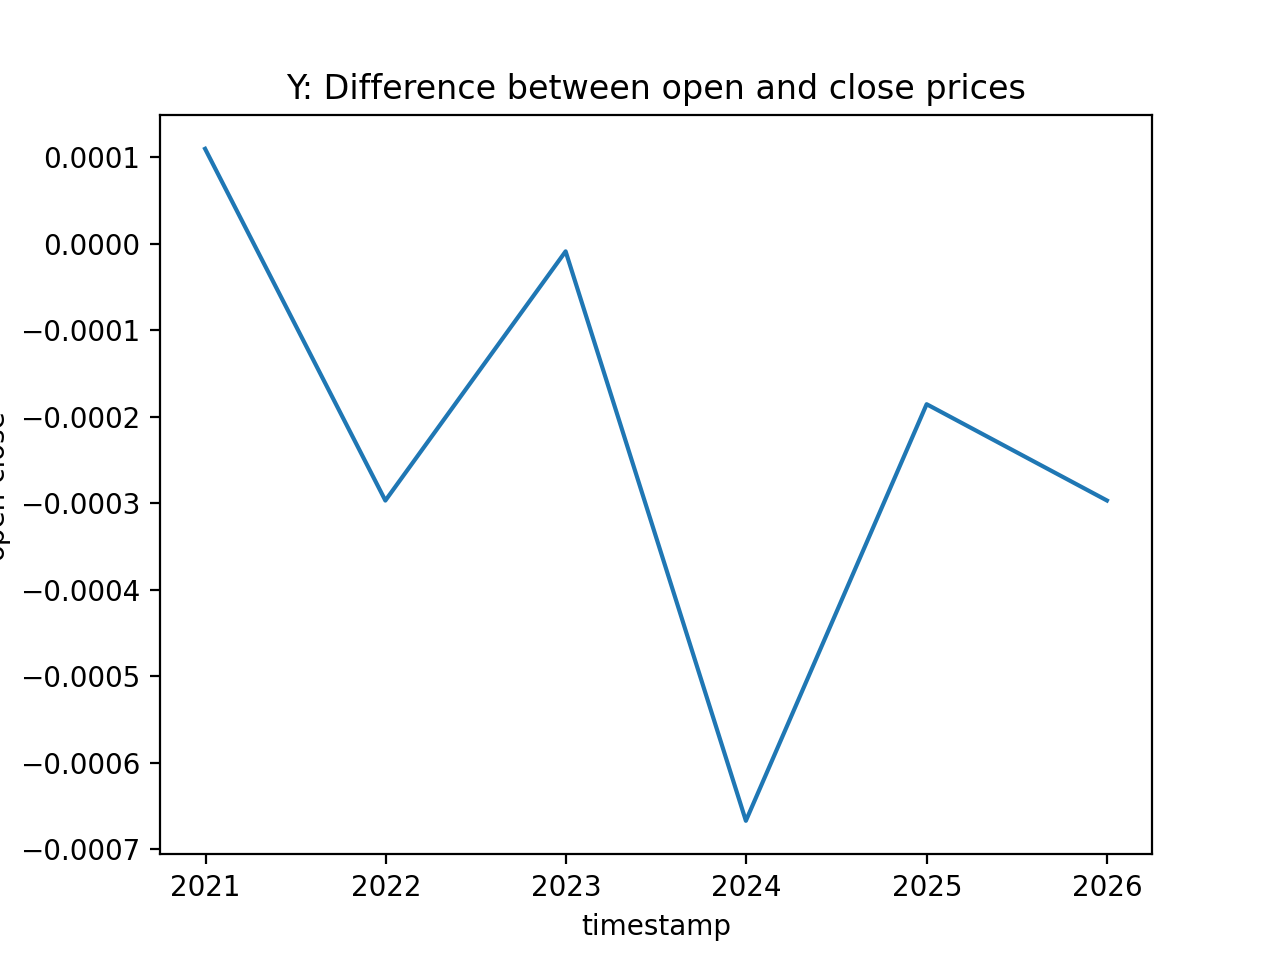

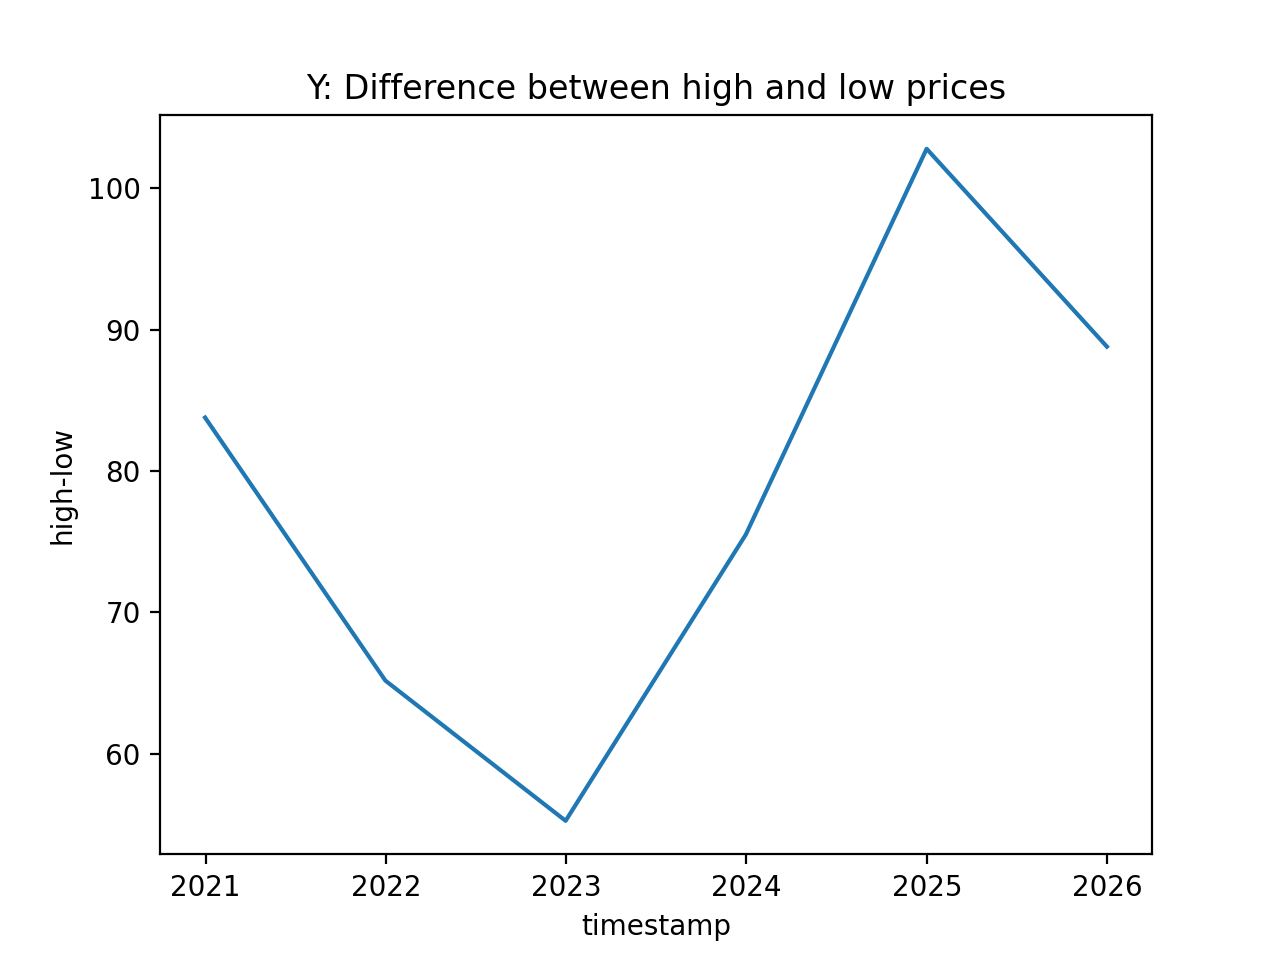

In [161]:
for inter in time_intervals:
    aapl_ranges = volatility_df(aapl_df, inter)

    plt.figure()
    sns.lineplot(data=aapl_ranges, x='timestamp', y='open-close')
    plt.title(f'{inter}: Difference between open and close prices')
    plt.show()

    plt.figure()
    sns.lineplot(data=aapl_ranges, x='timestamp', y='high-low')
    plt.title(f'{inter}: Difference between high and low prices')
    plt.show()

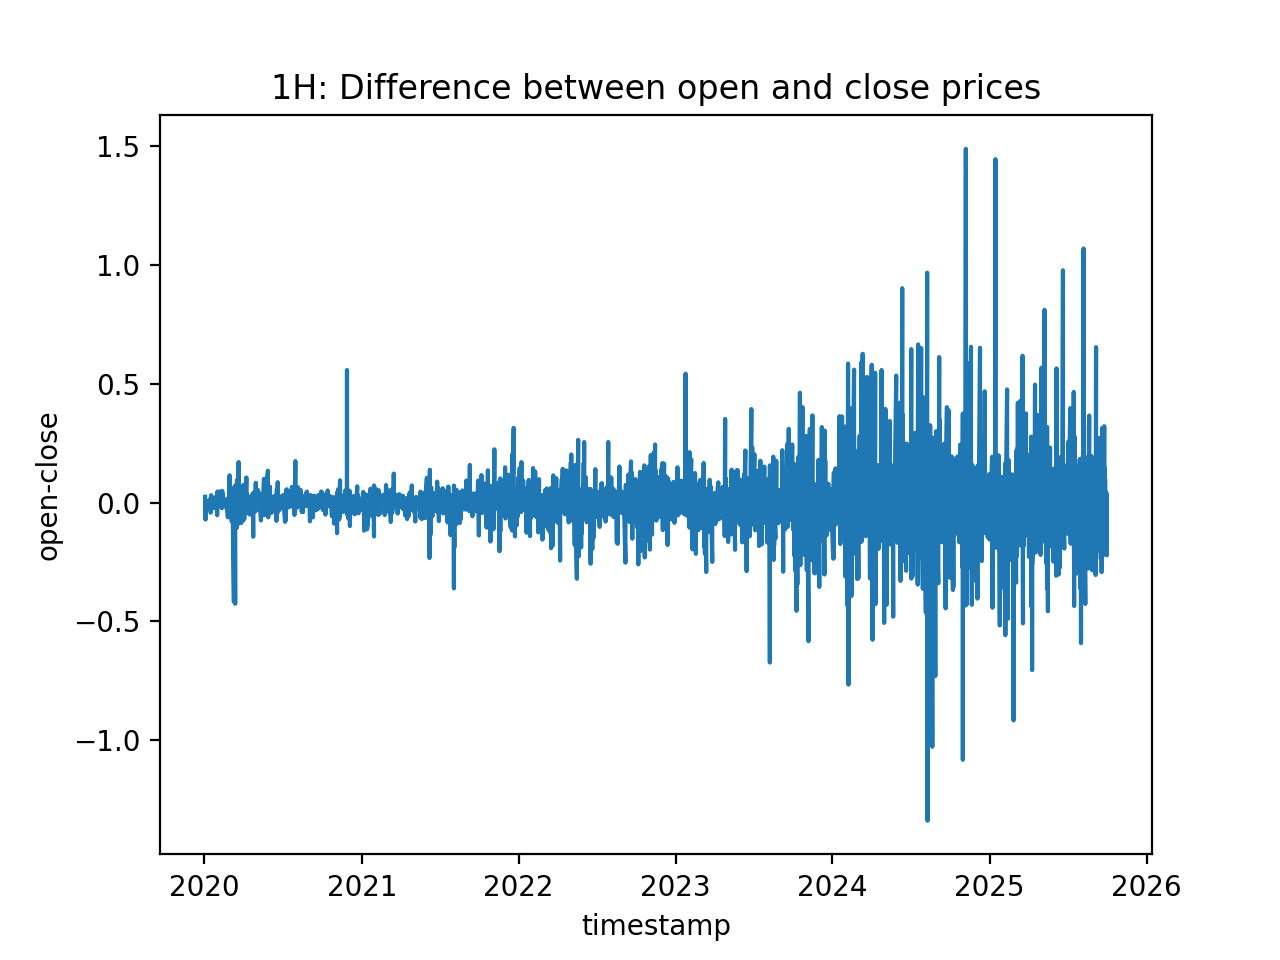

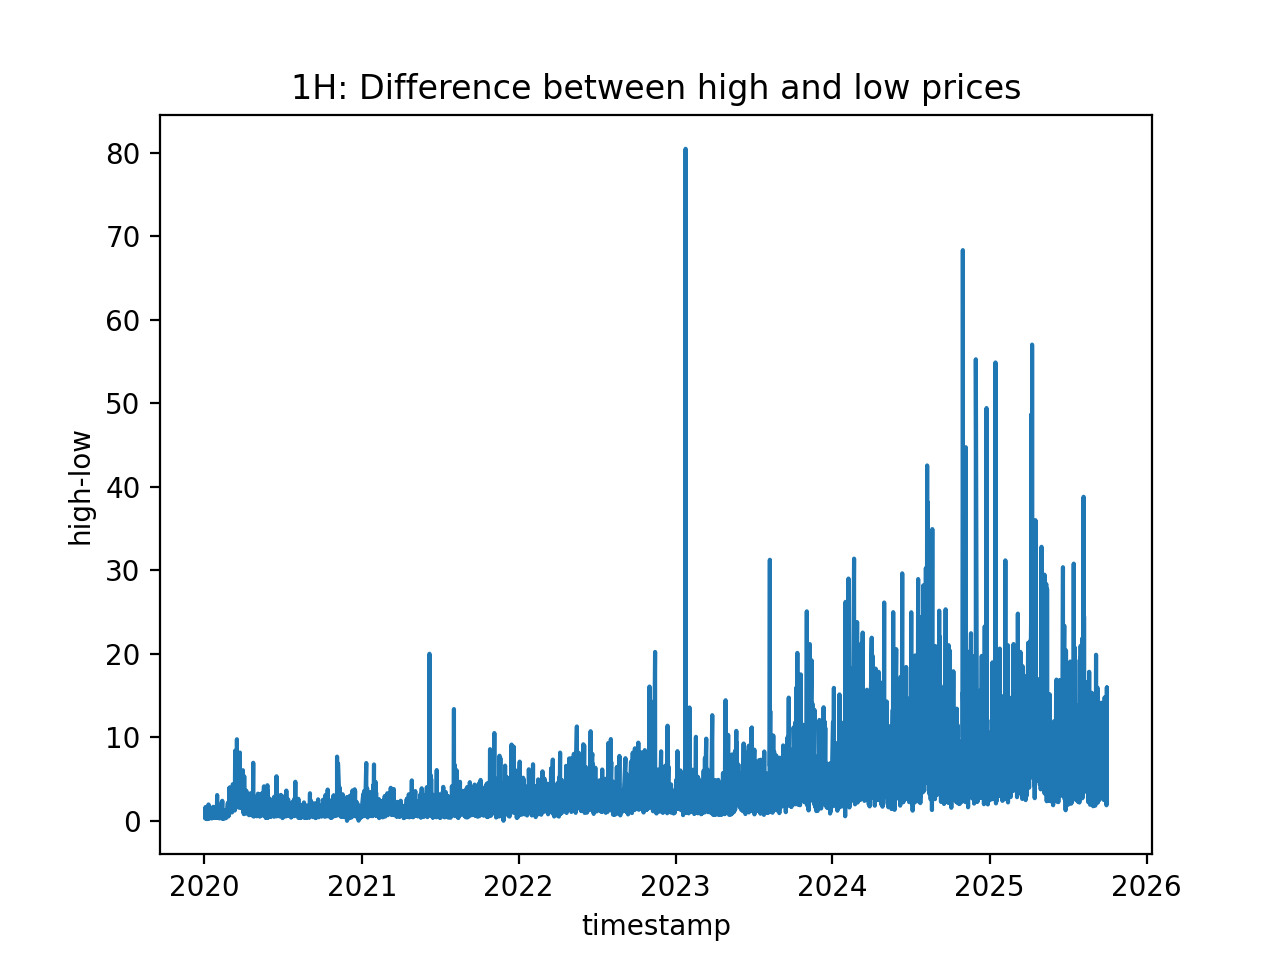

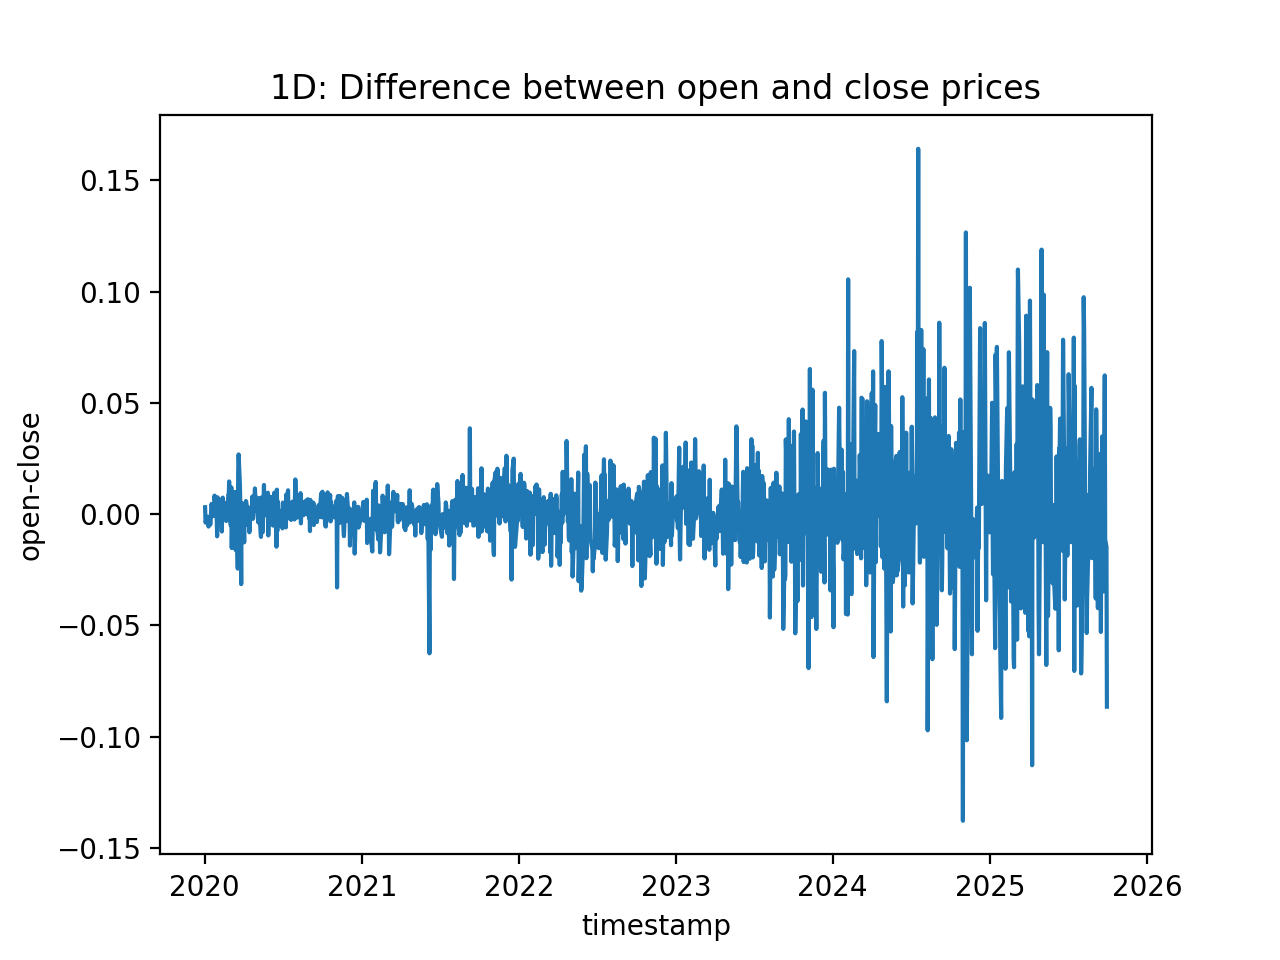

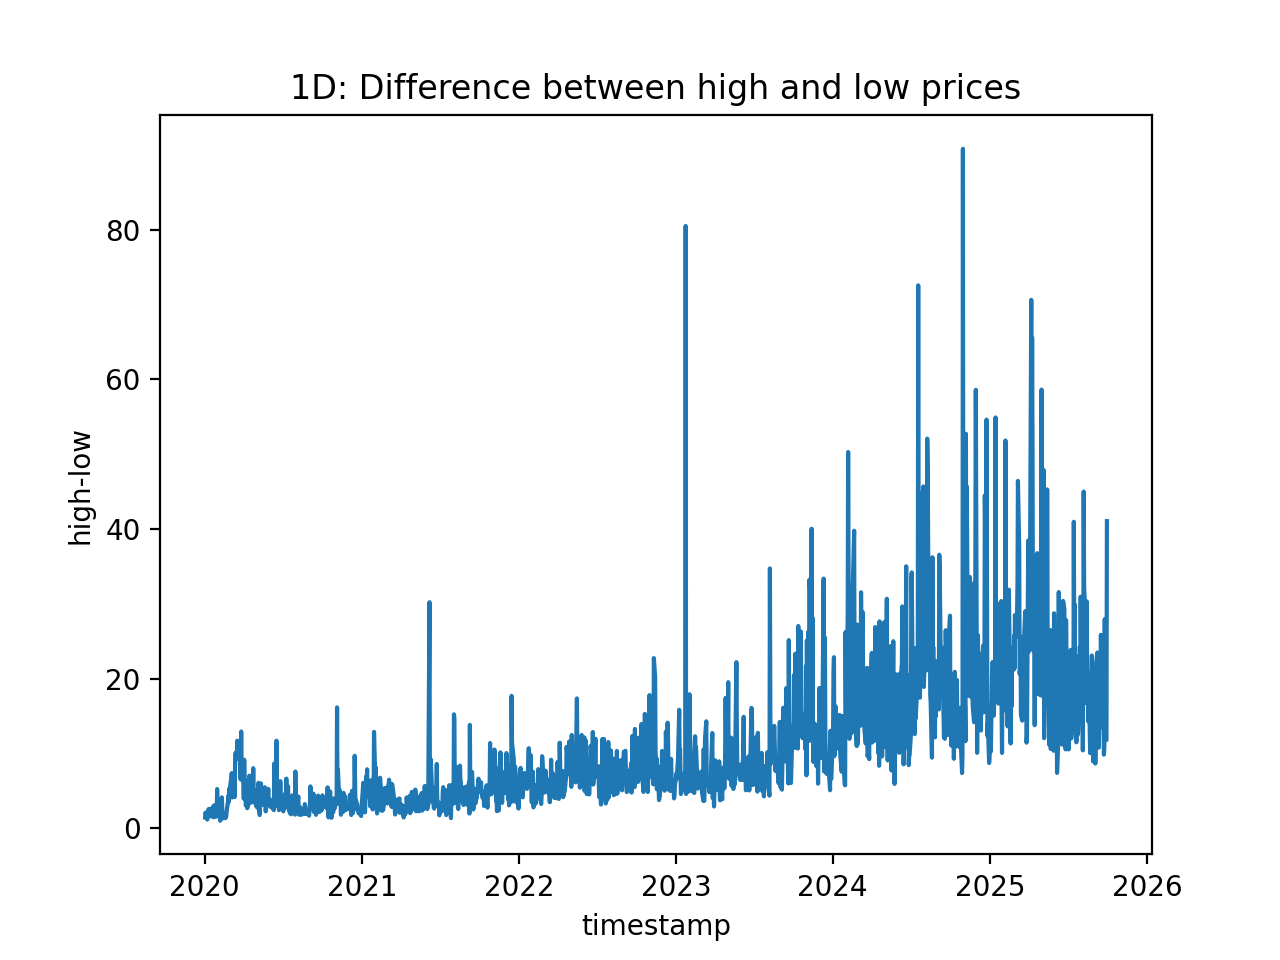

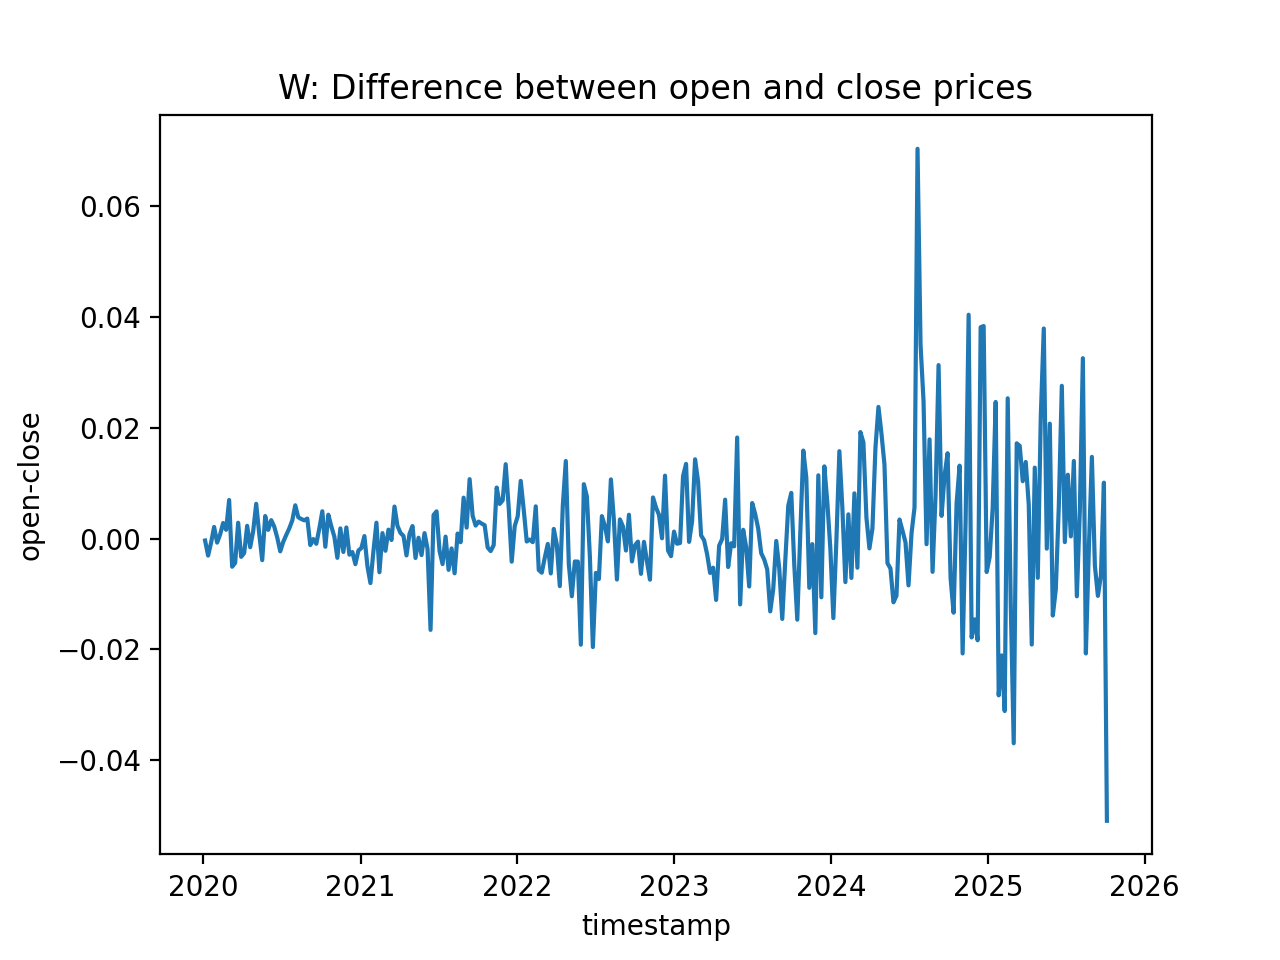

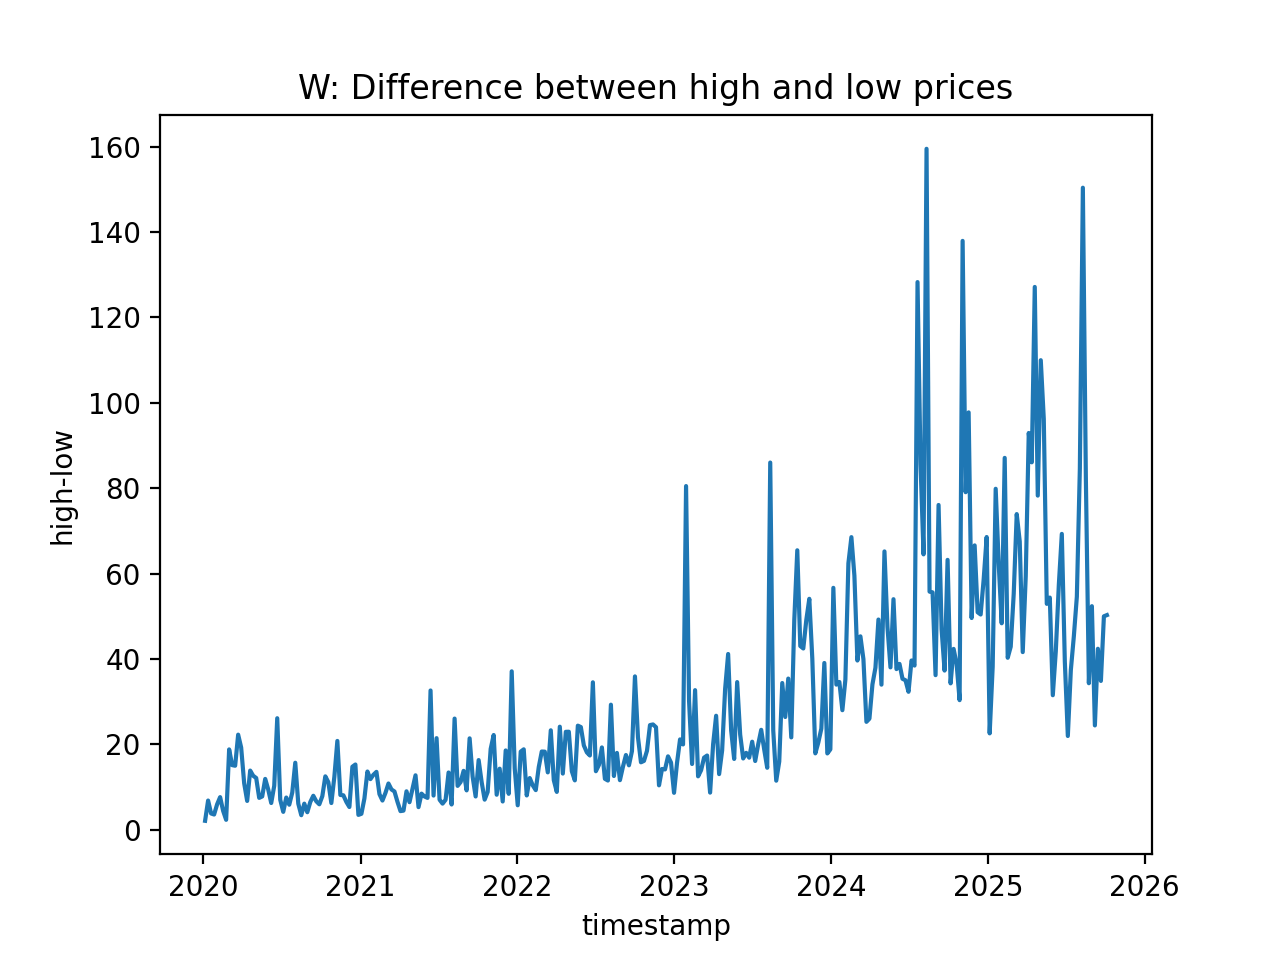

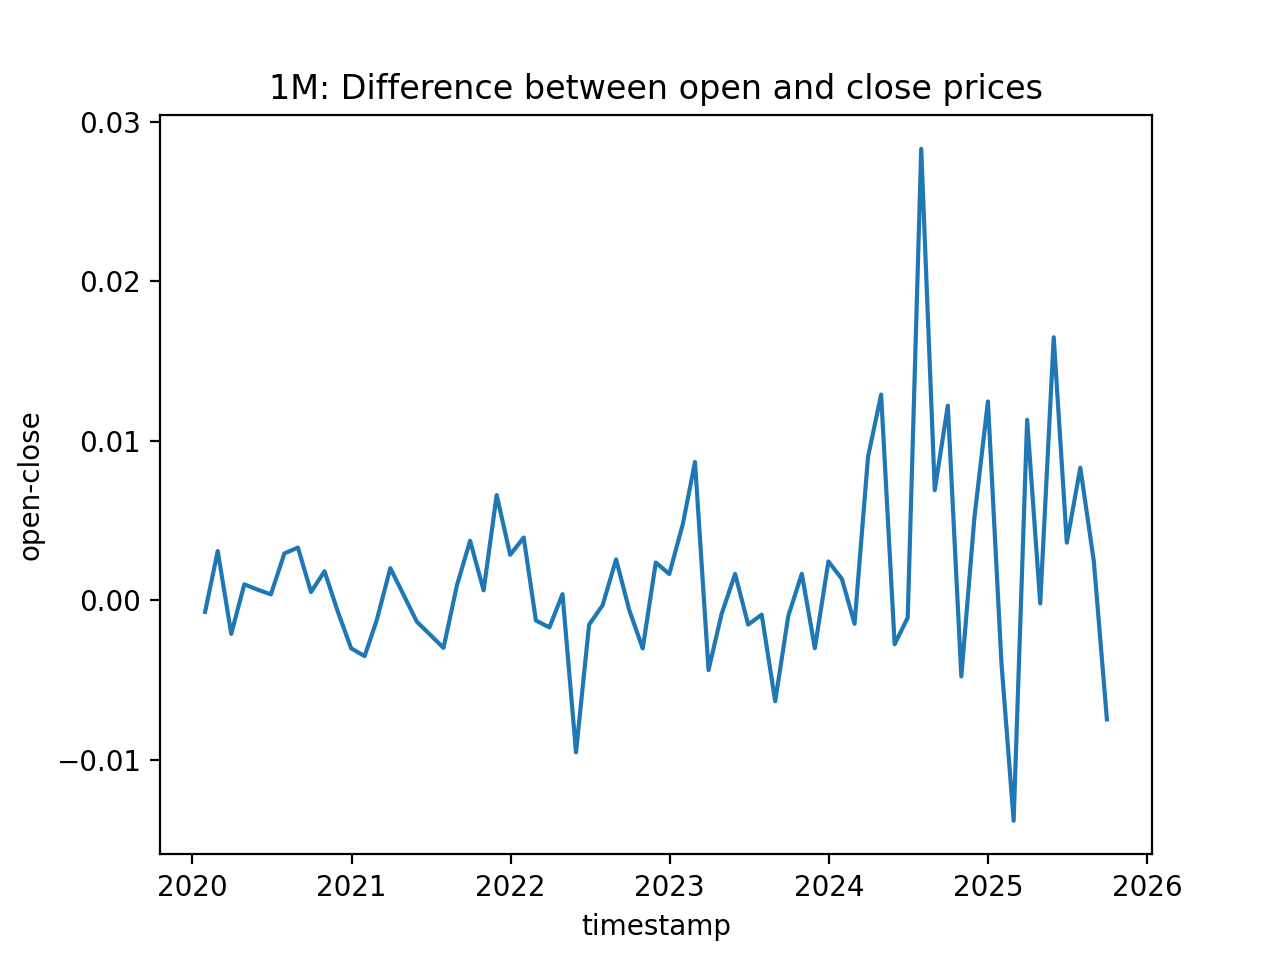

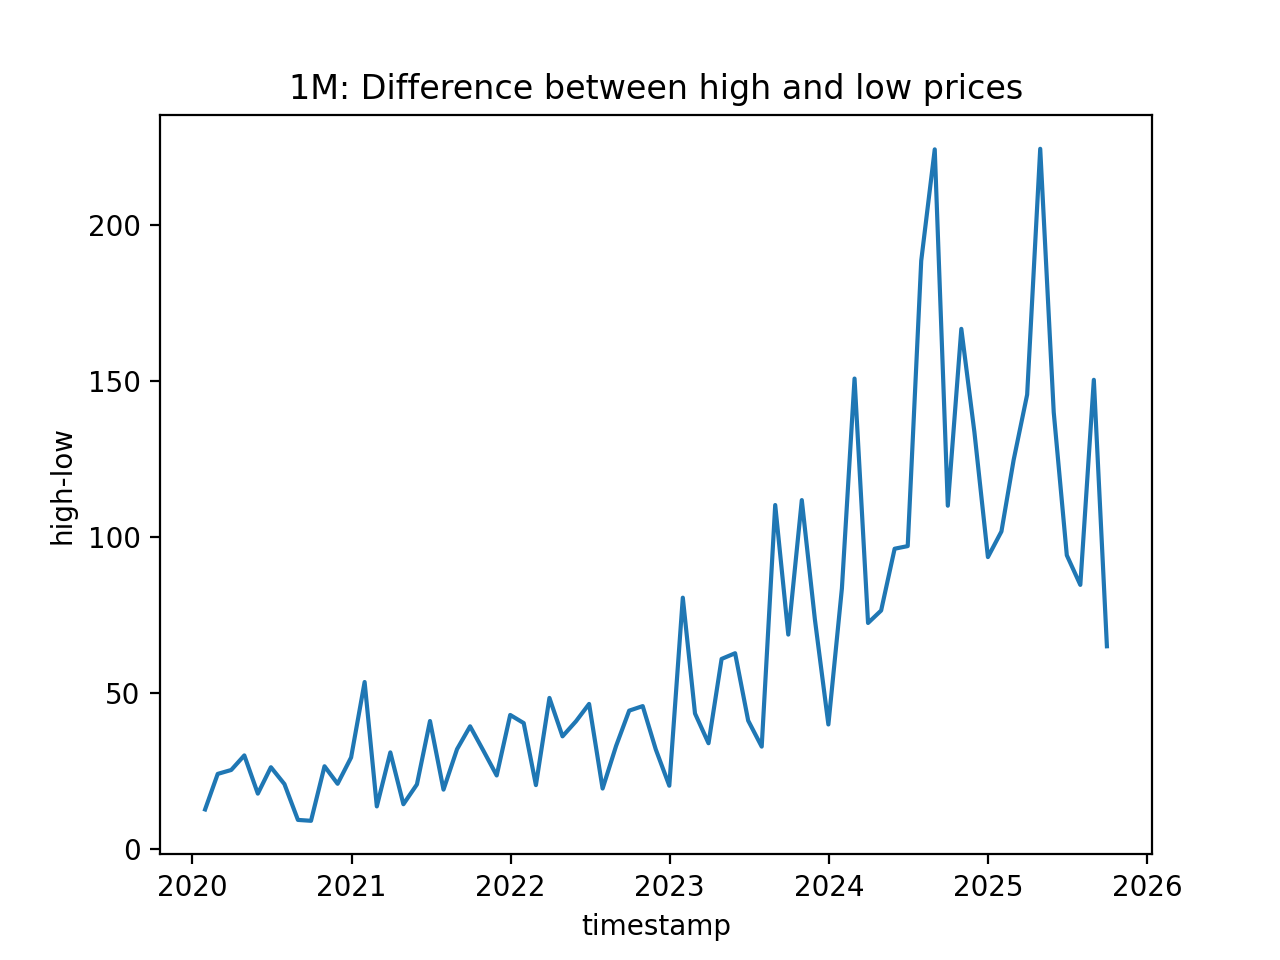

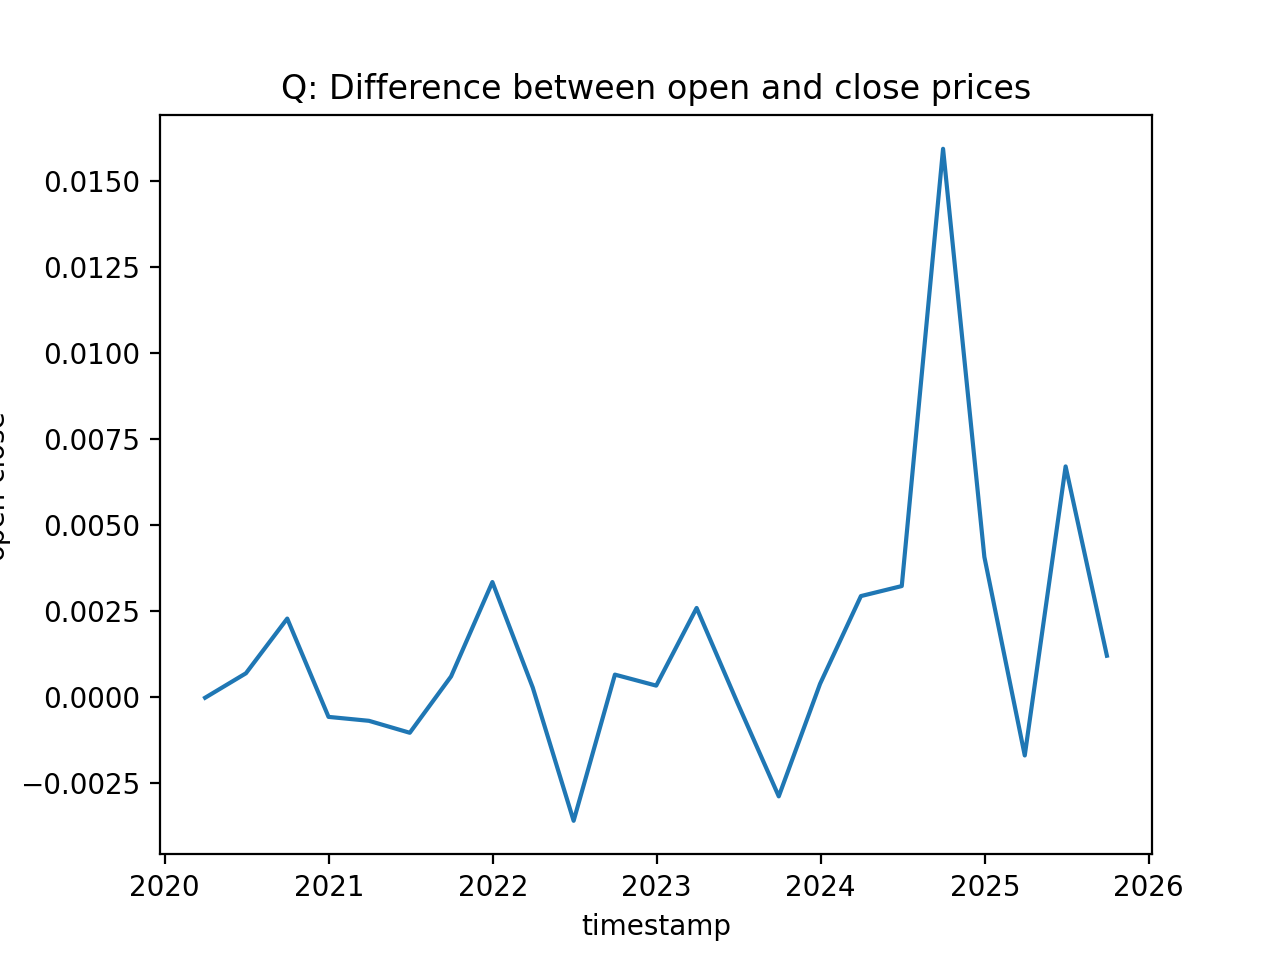

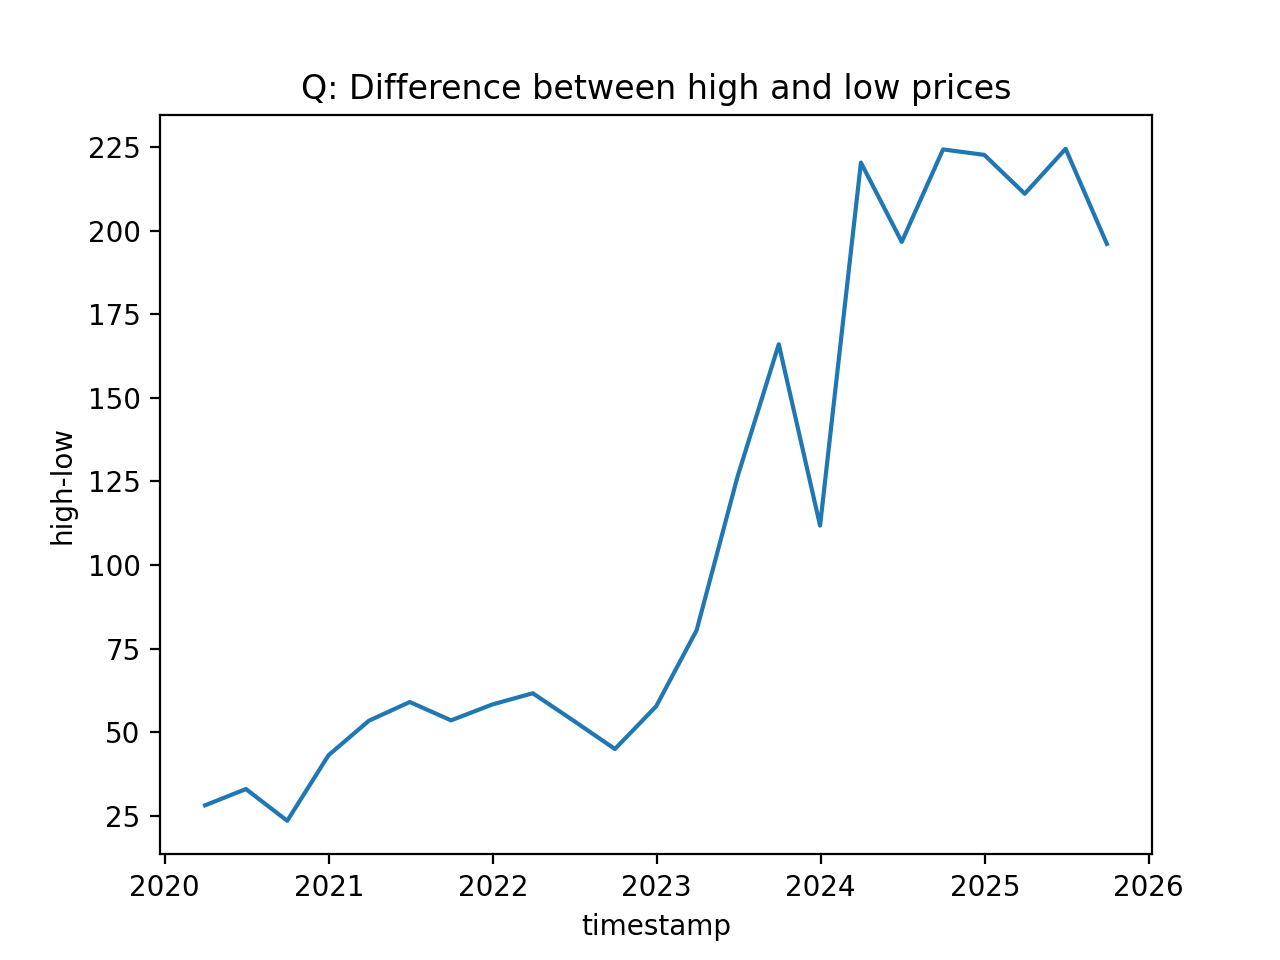

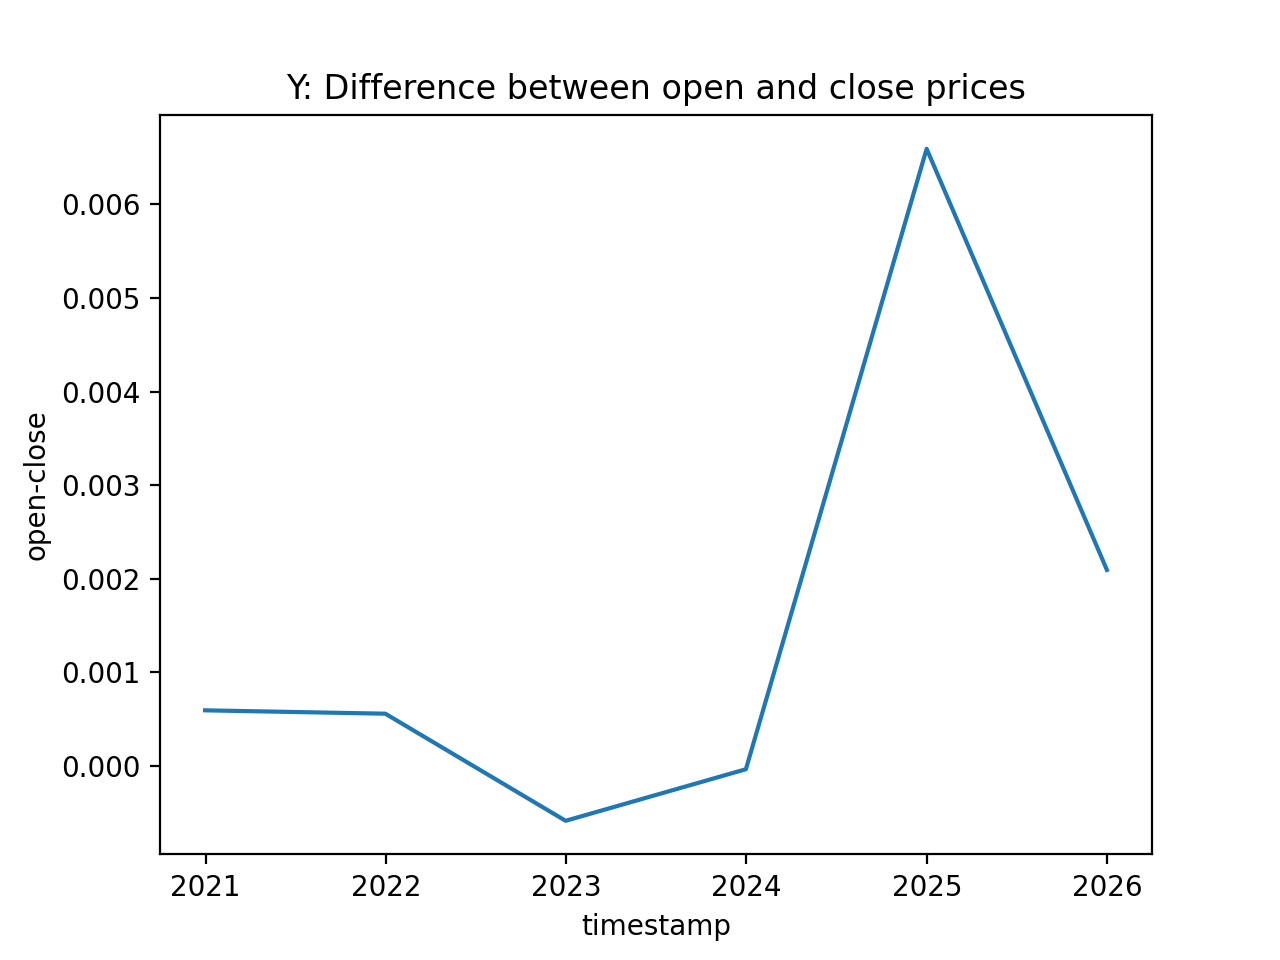

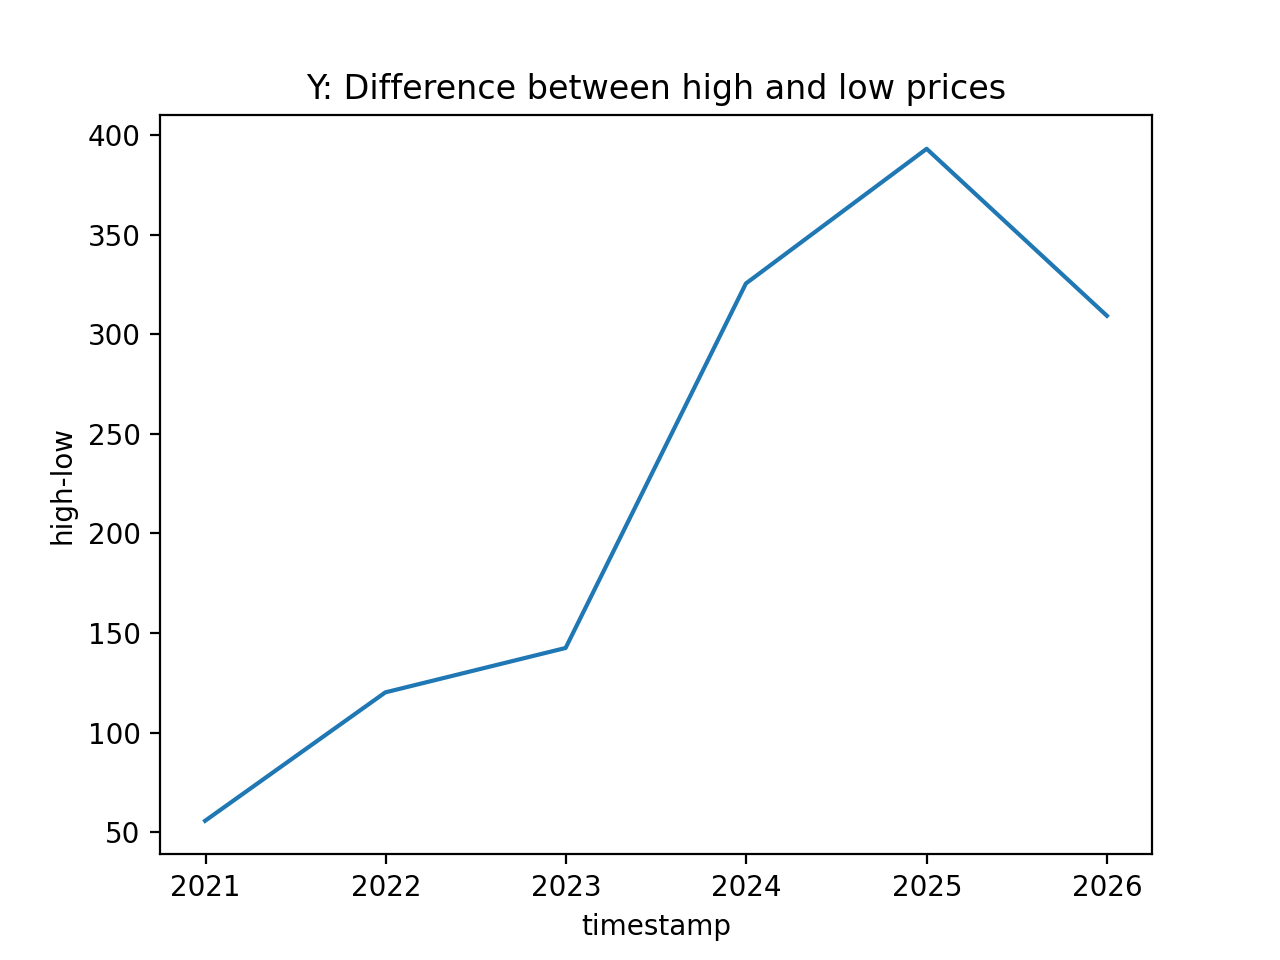

In [162]:
 for inter in time_intervals:
    lly_ranges = volatility_df(lly_df, inter)

    plt.figure()
    sns.lineplot(data=lly_ranges, x='timestamp', y='open-close')
    plt.title(f'{inter}: Difference between open and close prices')
    plt.show()

    plt.figure()
    sns.lineplot(data=lly_ranges, x='timestamp', y='high-low')
    plt.title(f'{inter}: Difference between high and low prices')
    plt.show()

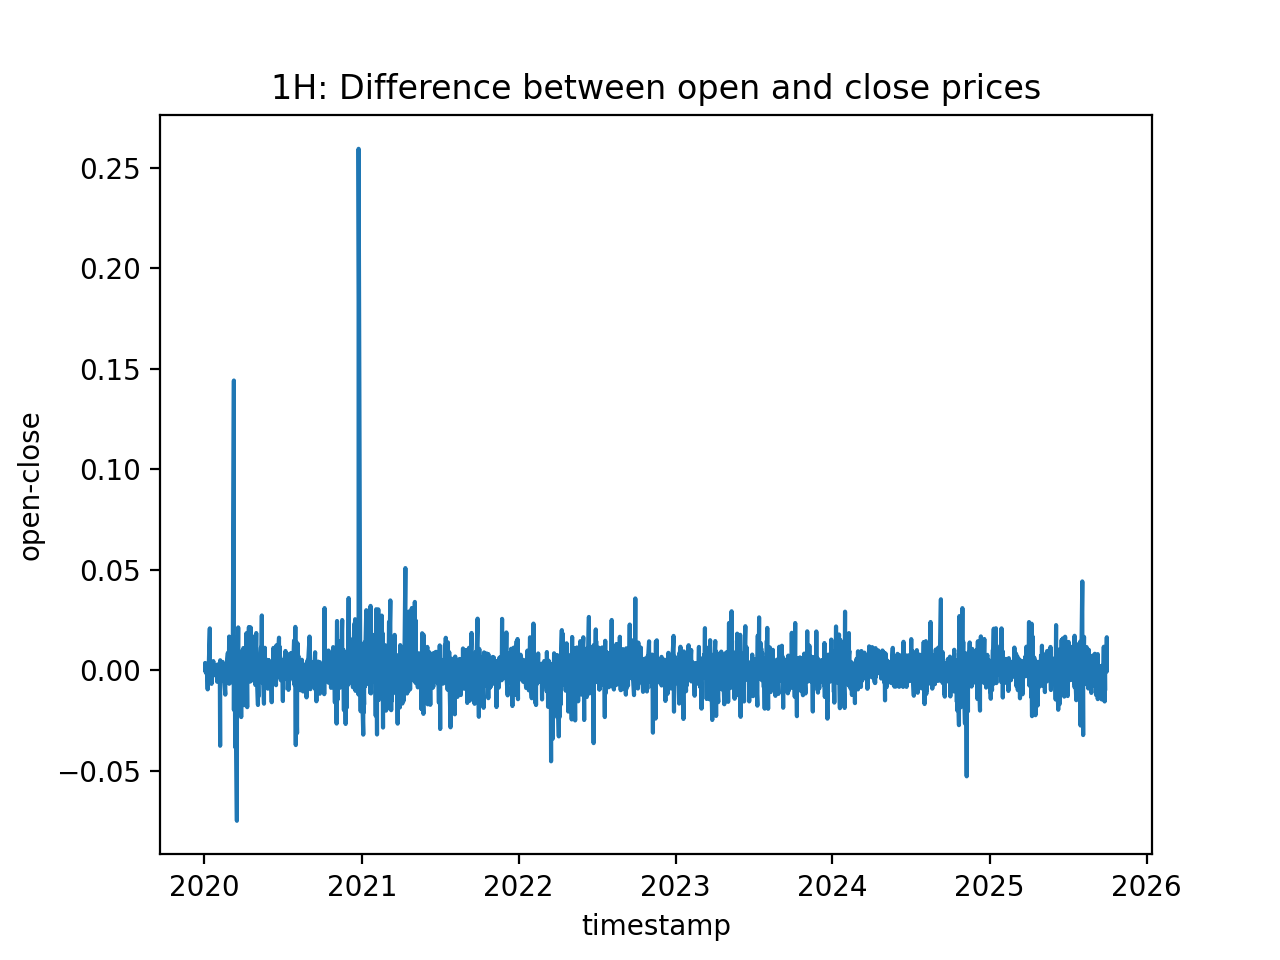

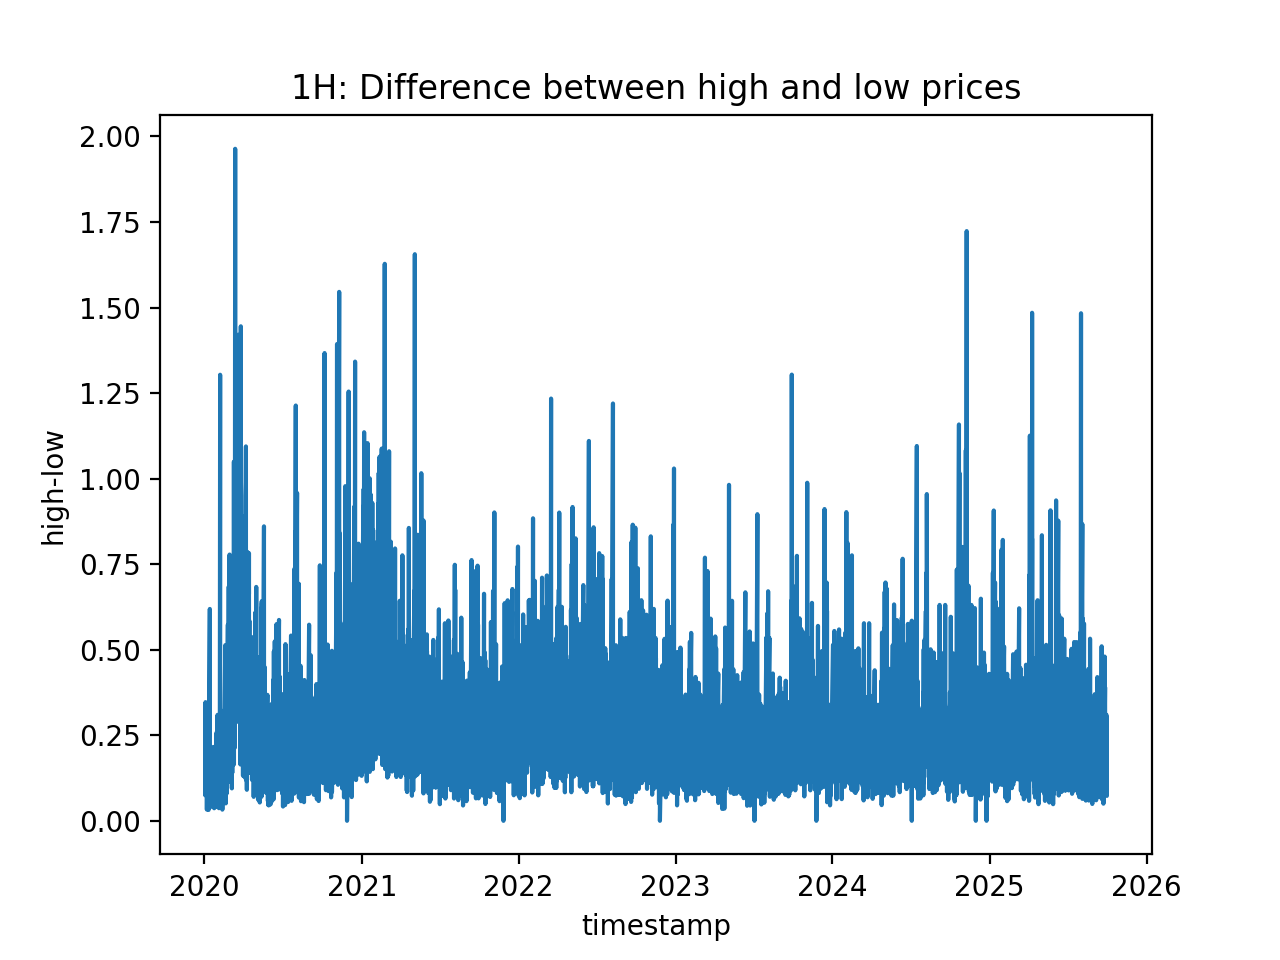

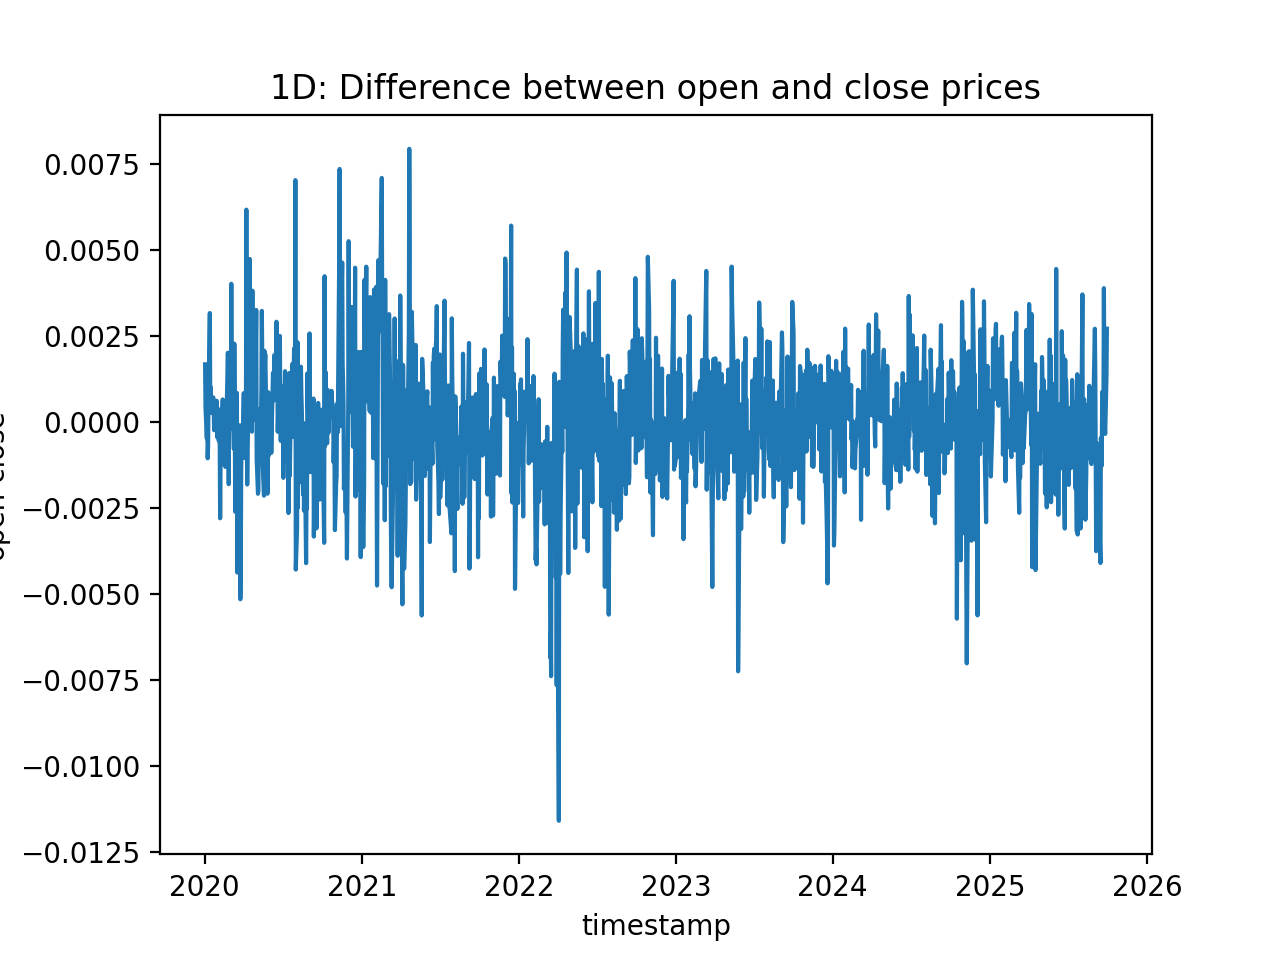

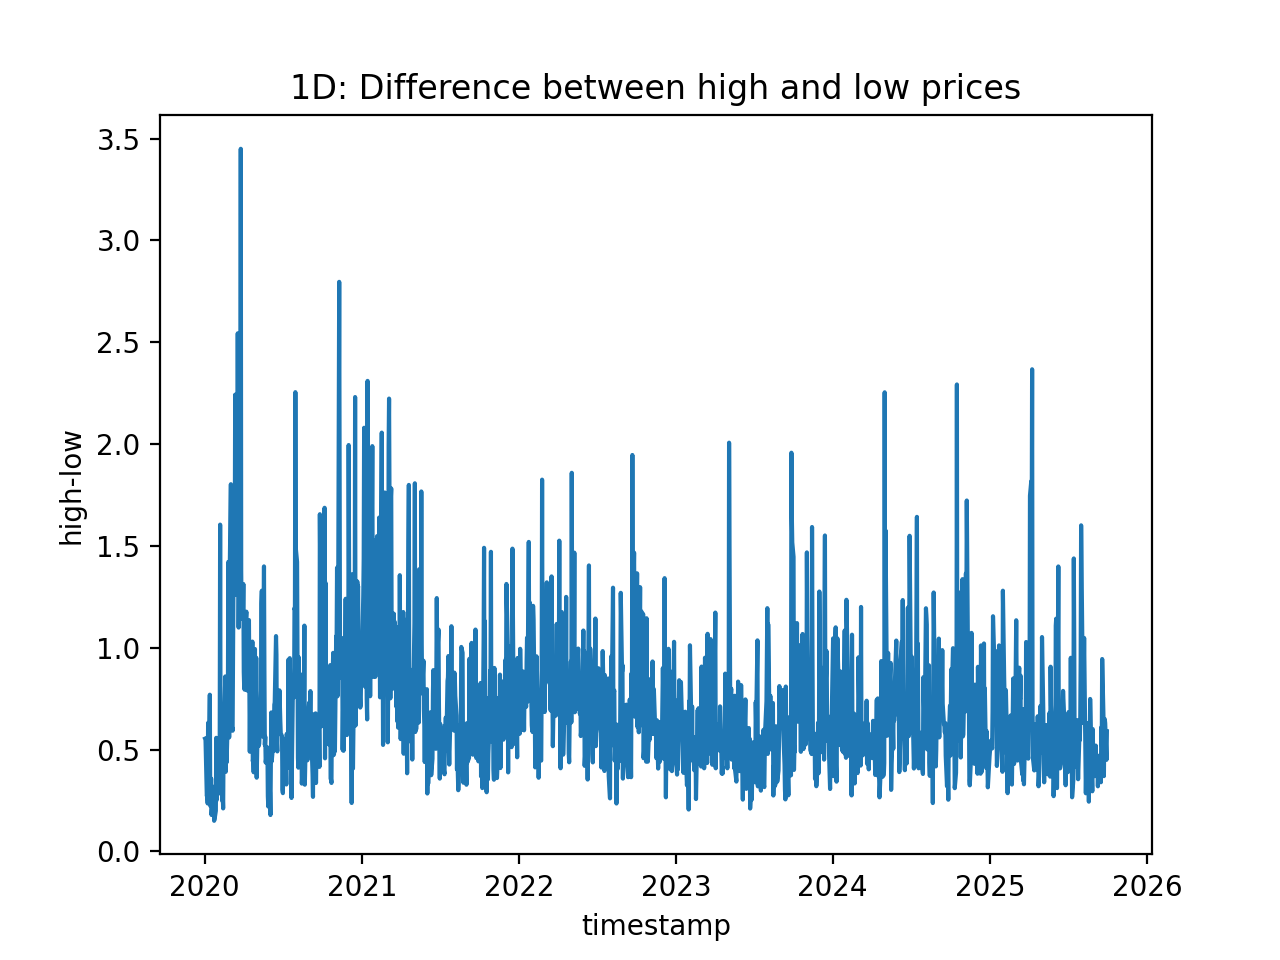

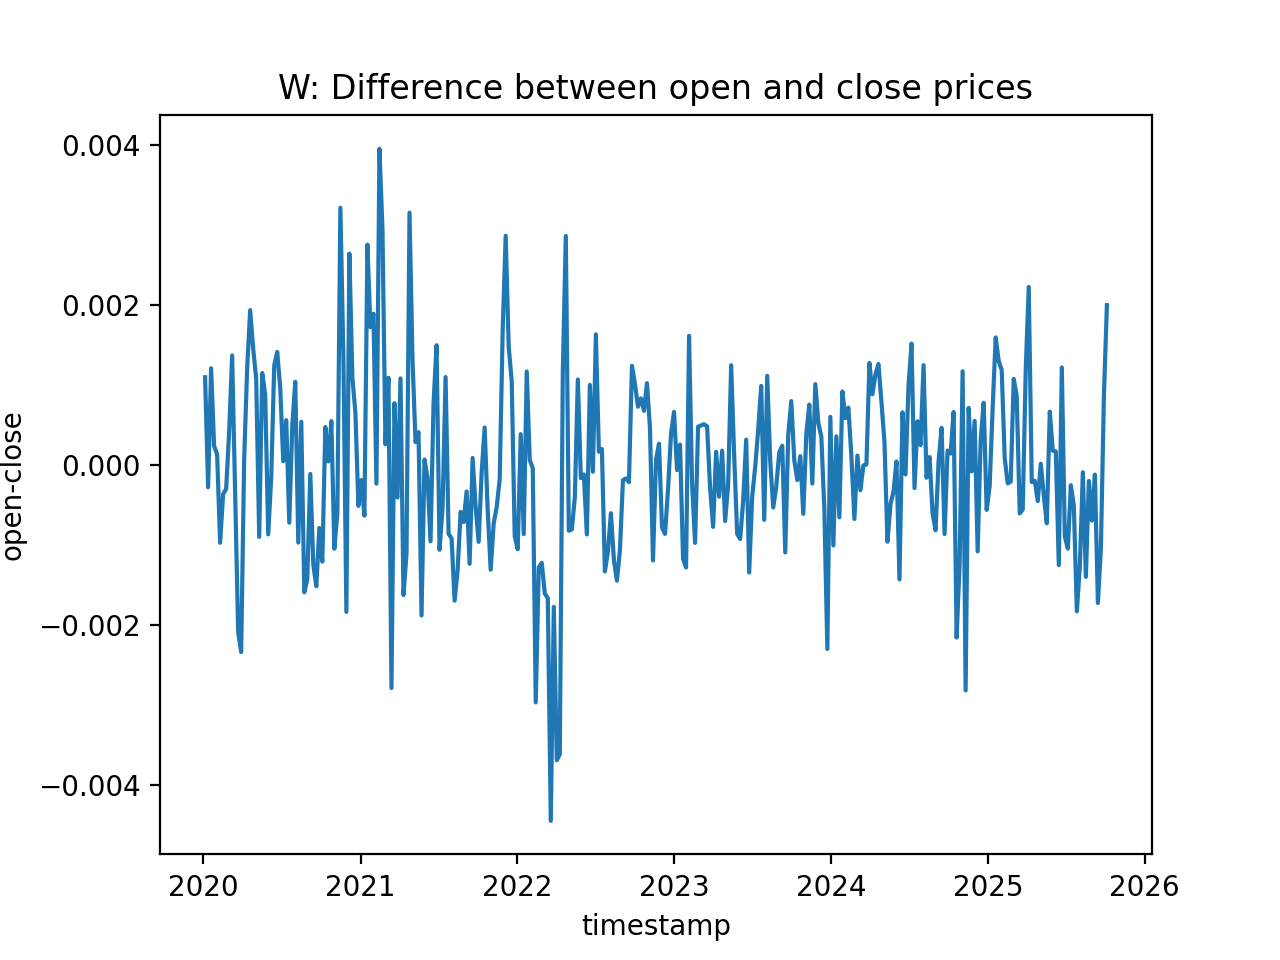

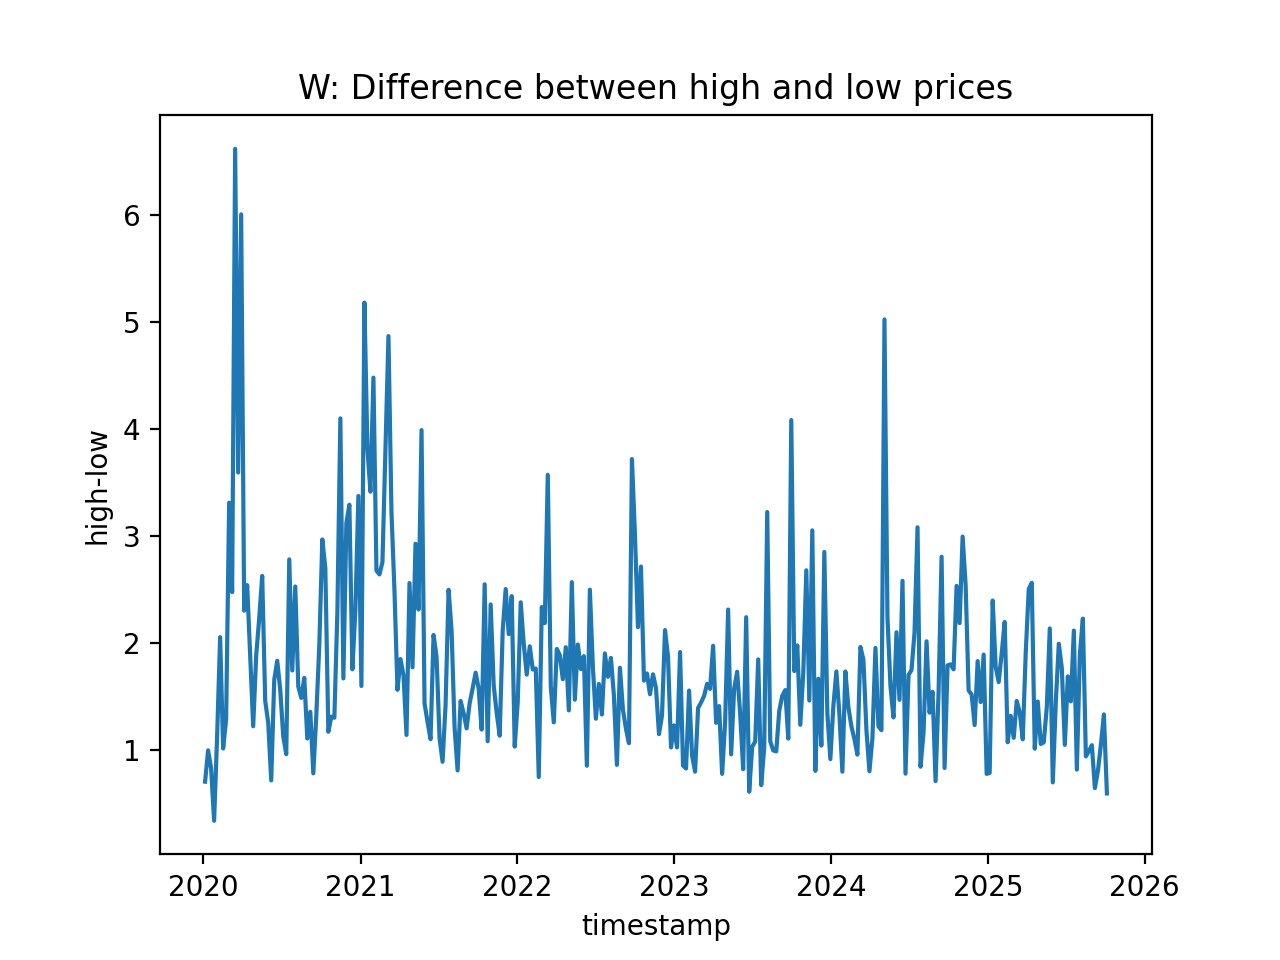

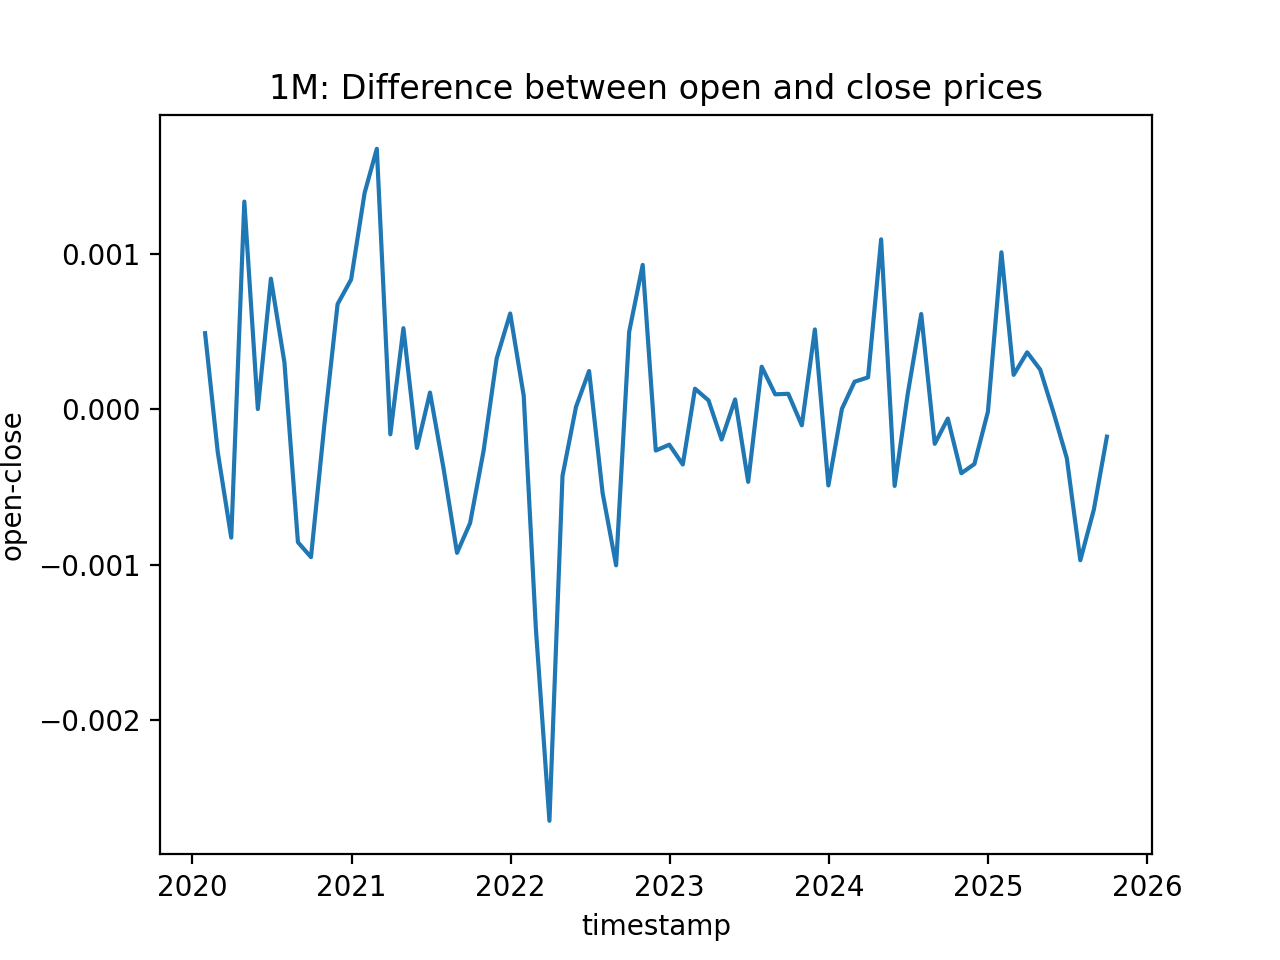

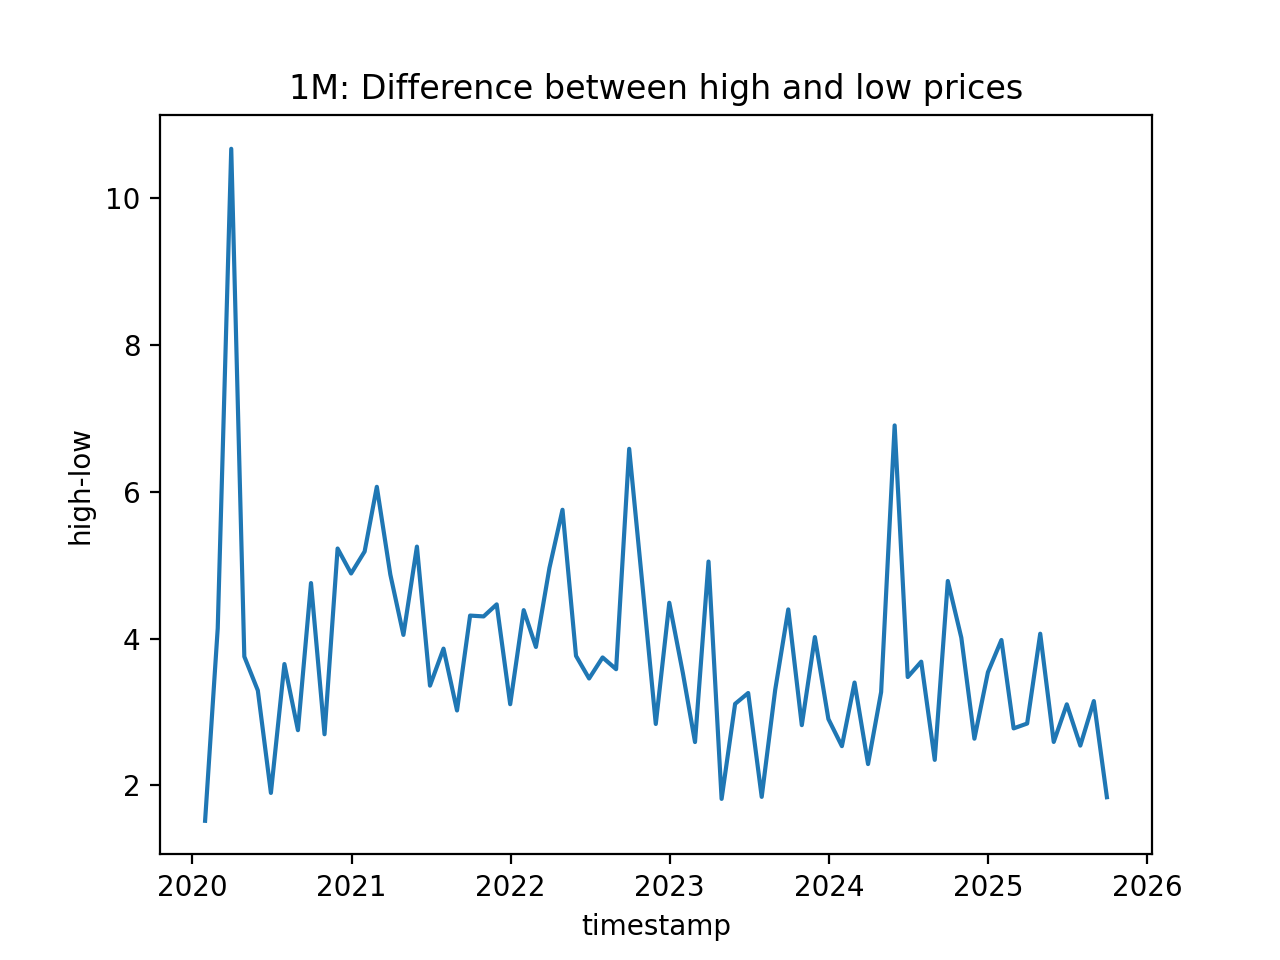

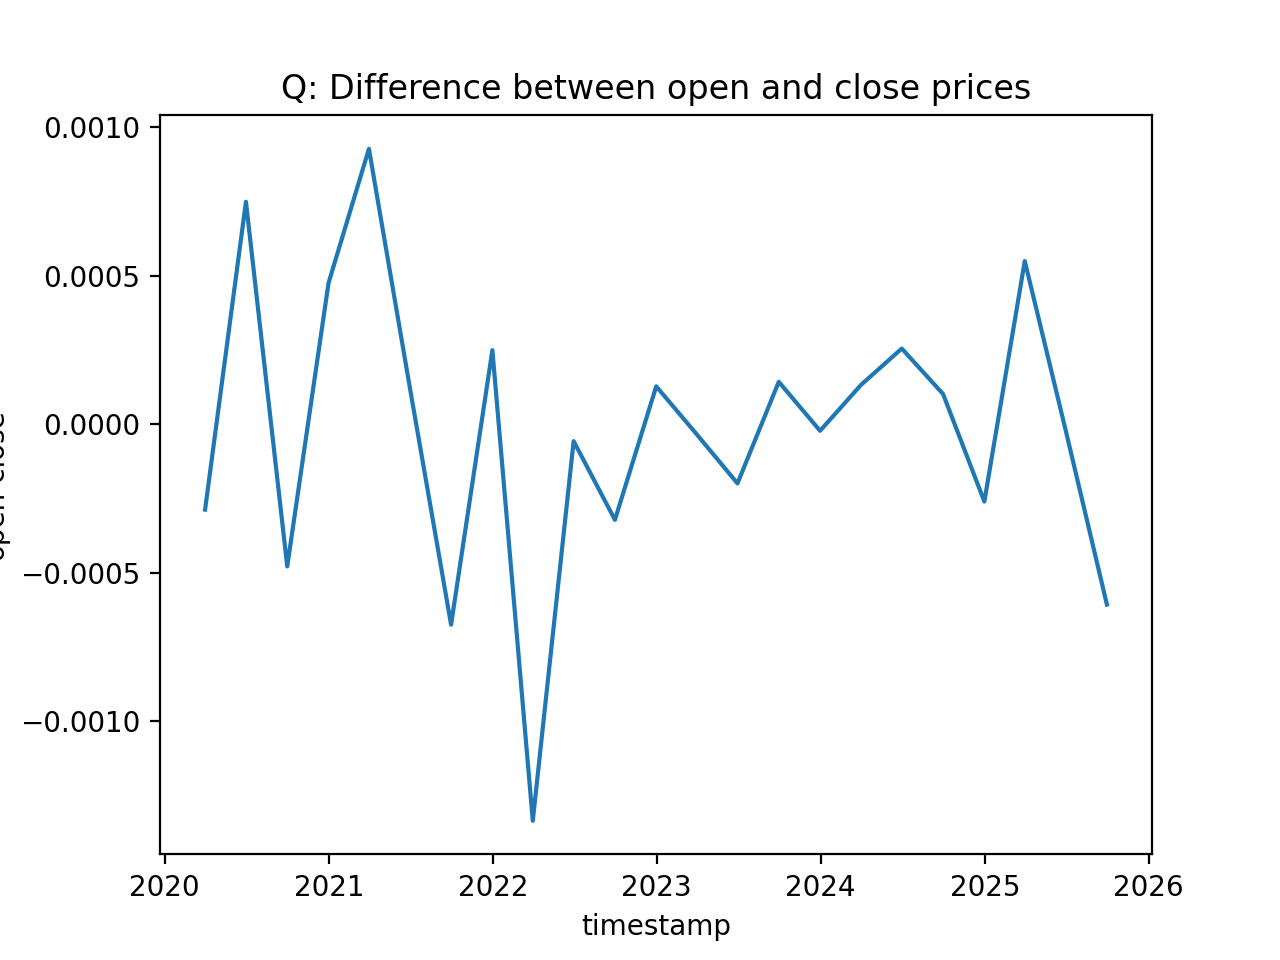

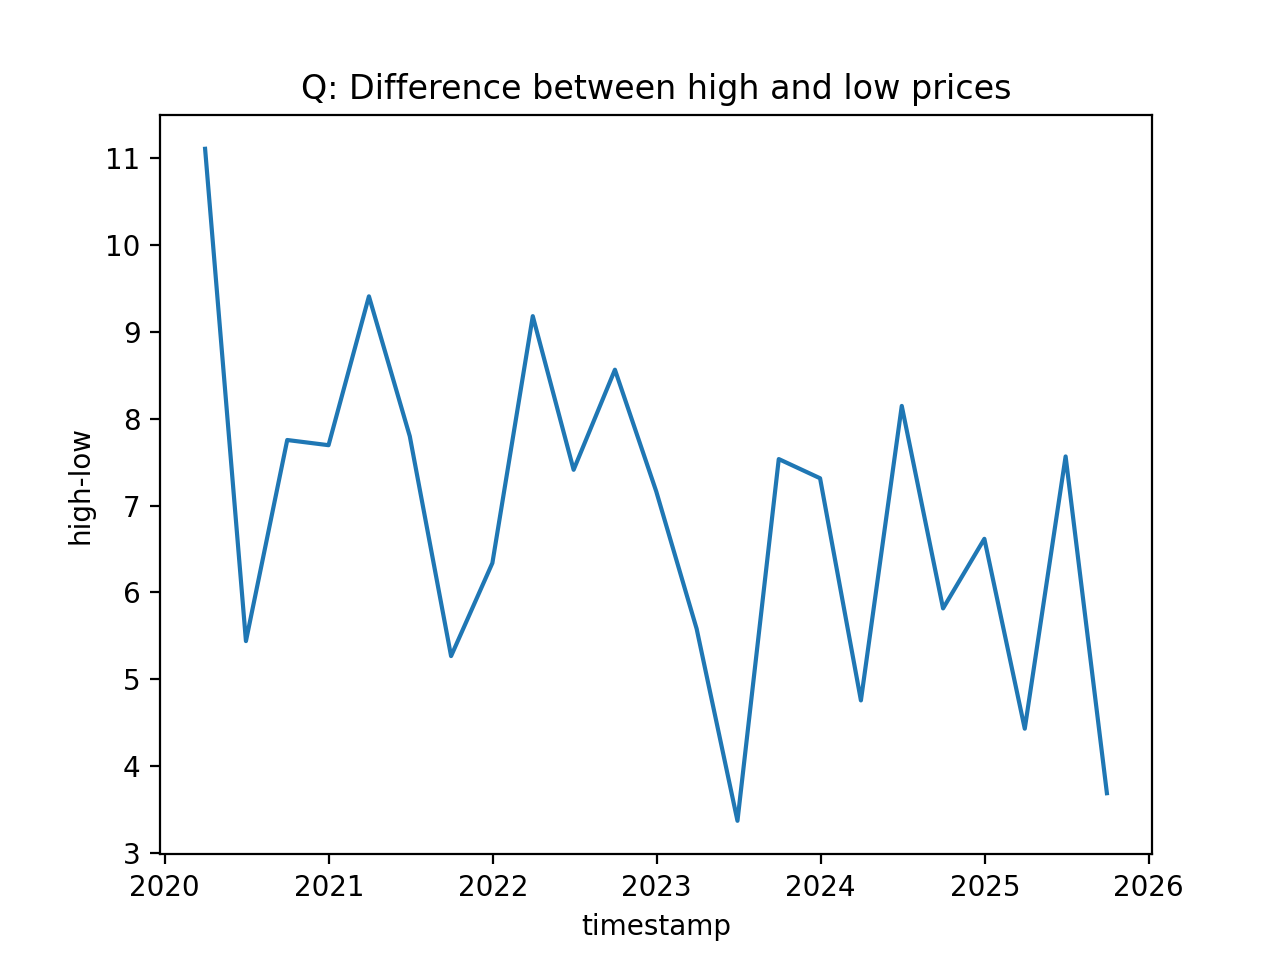

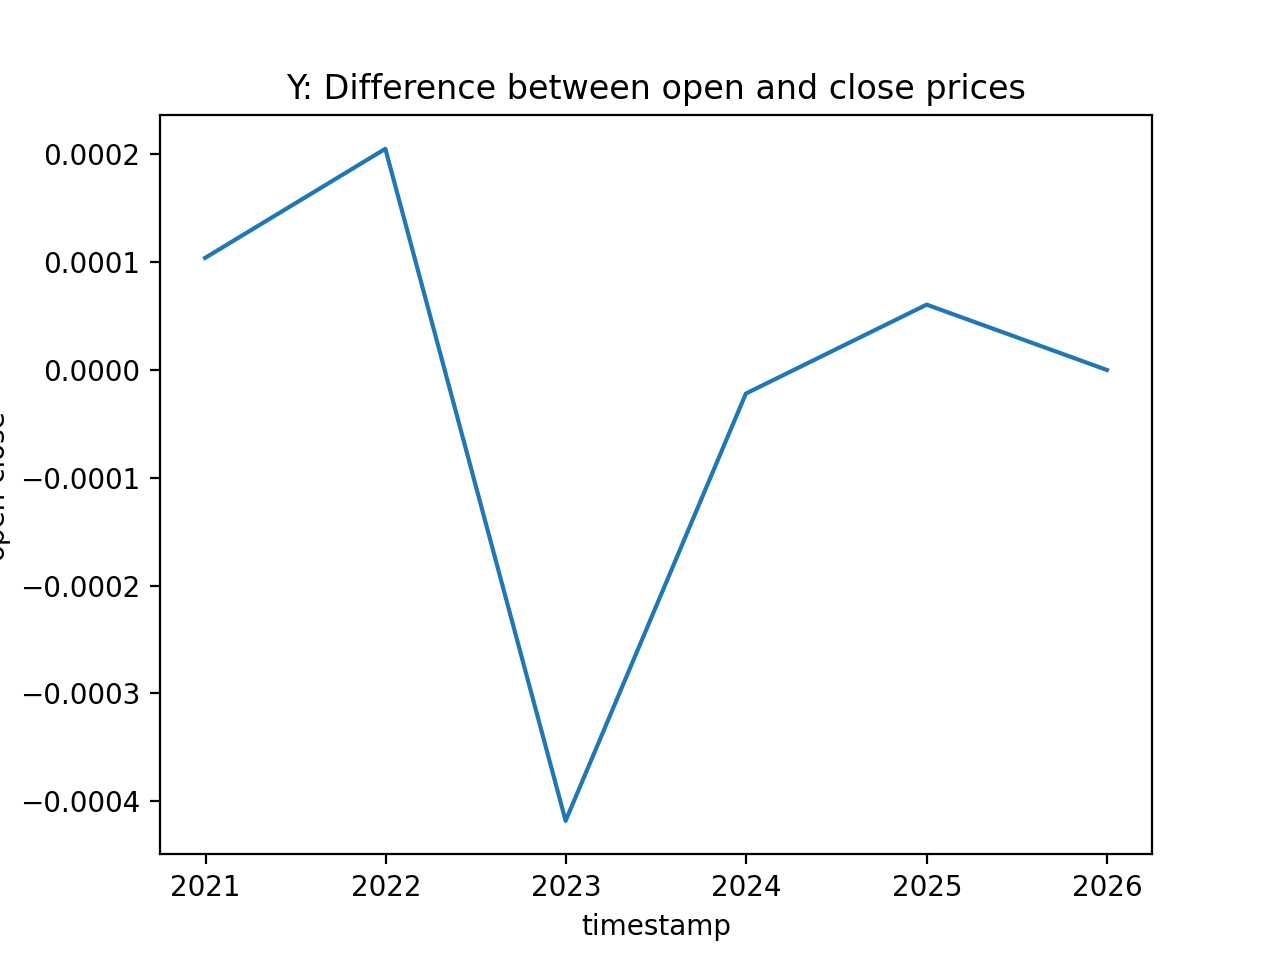

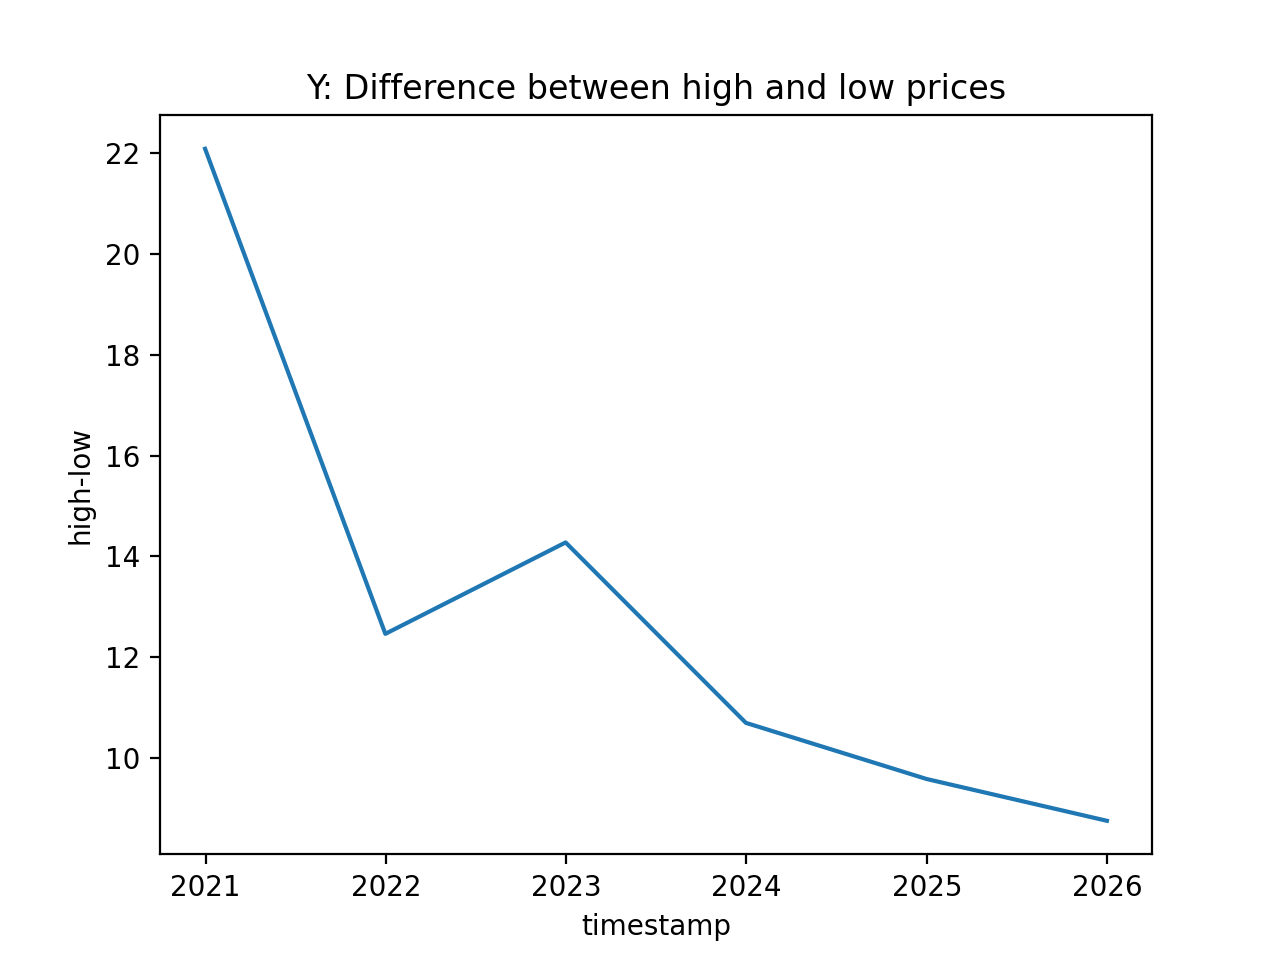

In [163]:
for inter in time_intervals:
    bep_ranges = volatility_df(bep_df, inter)

    plt.figure()
    sns.lineplot(data=bep_ranges, x='timestamp', y='open-close')
    plt.title(f'{inter}: Difference between open and close prices')
    plt.show()

    plt.figure()
    sns.lineplot(data=bep_ranges, x='timestamp', y='high-low')
    plt.title(f'{inter}: Difference between high and low prices')
    plt.show()

# Correlation

In [164]:
for lag in range(1,20):
    print(lag, pd.Series(daily_volatility_AAPL).autocorr(lag=lag))

1 0.5769805692458504
2 0.5453167336440364
3 0.48211137176396585
4 0.4274409025756956
5 0.38646529094706256
6 0.3525342140542363
7 0.34637349276087337
8 0.31588552633884626
9 0.31069509303192805
10 0.29729149559494383
11 0.2688191606425517
12 0.23560465797148578
13 0.23588334544085882
14 0.21831307739680783
15 0.1910683384345774
16 0.1985779558555853
17 0.17201112496576132
18 0.1650976994405583
19 0.16609037639978233


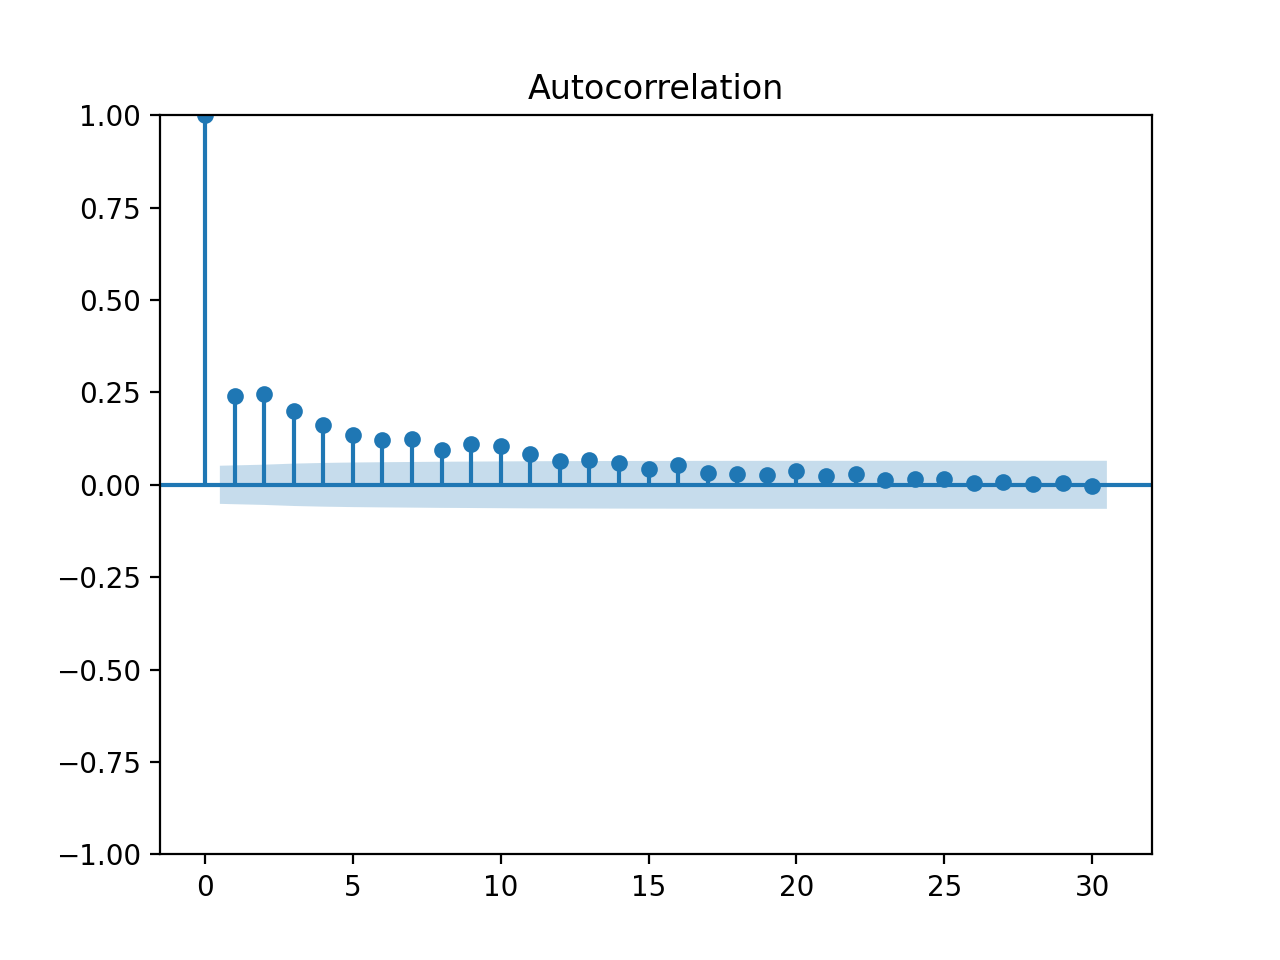

In [165]:
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(daily_variance_AAPL, lags=30)

In [166]:
for lag in range(1,6):
    print(lag, pd.Series(daily_volatility_BEP).autocorr(lag=lag))

1 0.6837558923028523
2 0.6514615802746557
3 0.5983315496768643
4 0.5518487177894502
5 0.5174831319293279


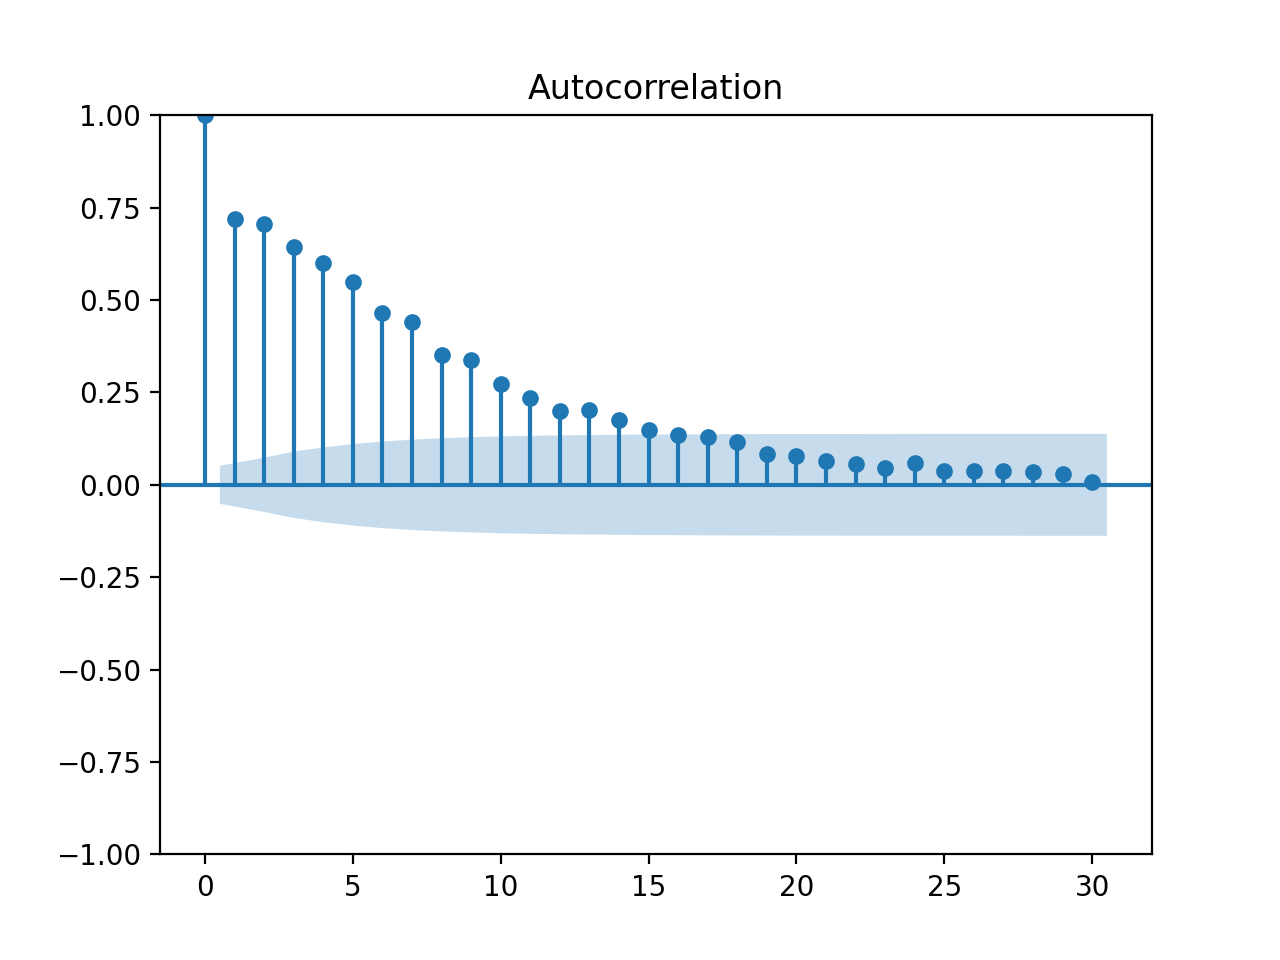

In [167]:
plot_acf(daily_variance_BEP, lags=30)

In [168]:
for lag in range(1,6):
    print(lag, pd.Series(daily_volatility_LLY).autocorr(lag=lag))

1 0.5470570909894628
2 0.48744389860830045
3 0.42143469439362613
4 0.3980873030426876
5 0.3651799362045467


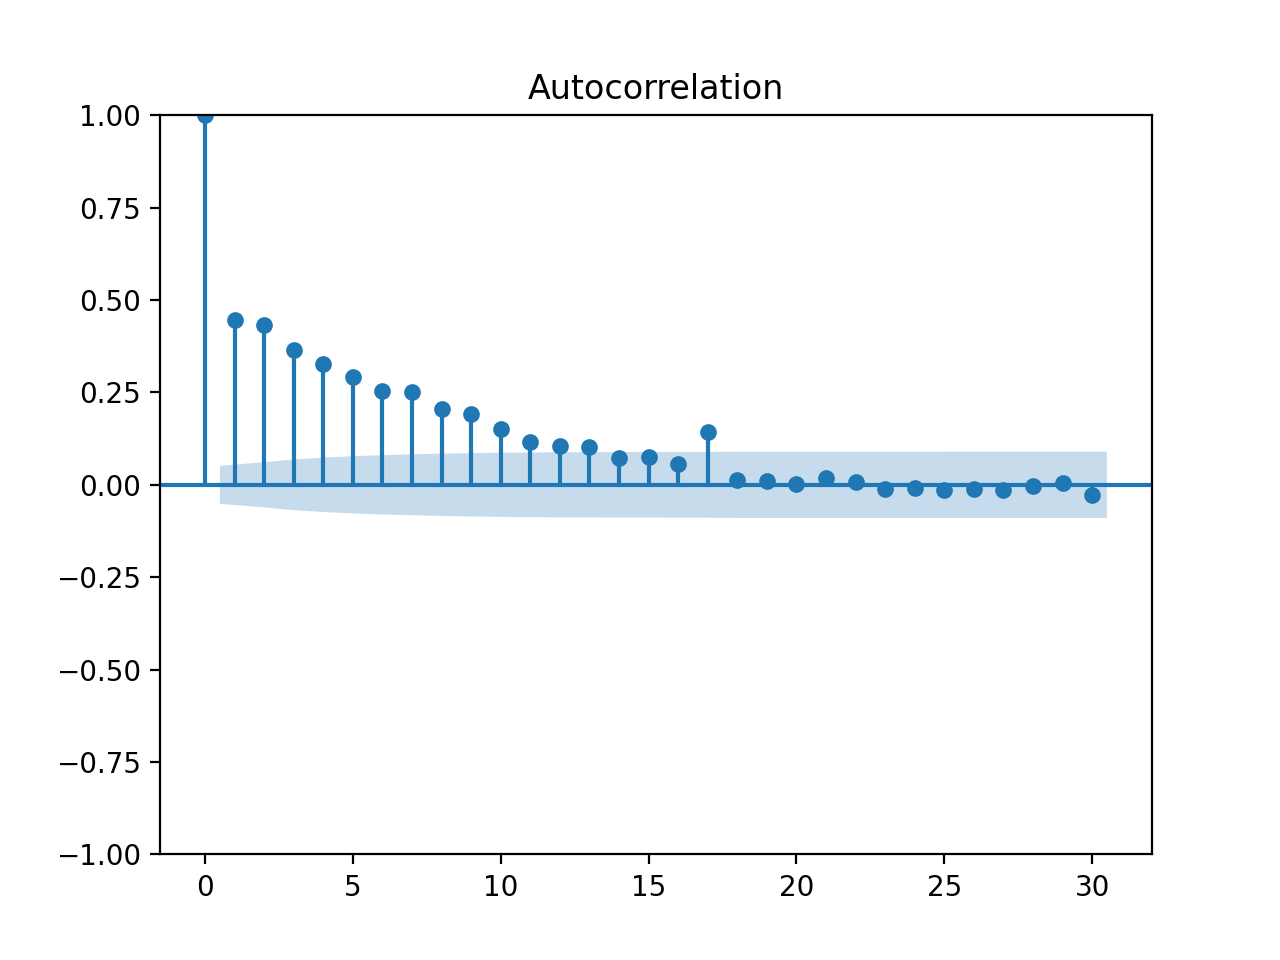

In [169]:
plot_acf(daily_variance_LLY, lags=30)

# EWMA

In [170]:
# daily_volatility_AAPL.name = 'volatility'
# daily_volatility_AAPL = daily_volatility_AAPL.to_frame()
daily_volatility_AAPL['EWM_90'] = daily_volatility_AAPL['volatility'].shift(1).ewm(alpha=.90).mean()
daily_volatility_AAPL['EWM_50'] = daily_volatility_AAPL['volatility'].shift(1).ewm(alpha=.50).mean()
daily_volatility_AAPL['EWM_10'] = daily_volatility_AAPL['volatility'].shift(1).ewm(alpha=.10).mean()
daily_volatility_AAPL.plot()
plt.title("AAPL EWMA")
plt.ylabel("volatility")
plt.show()

KeyError: 'volatility'

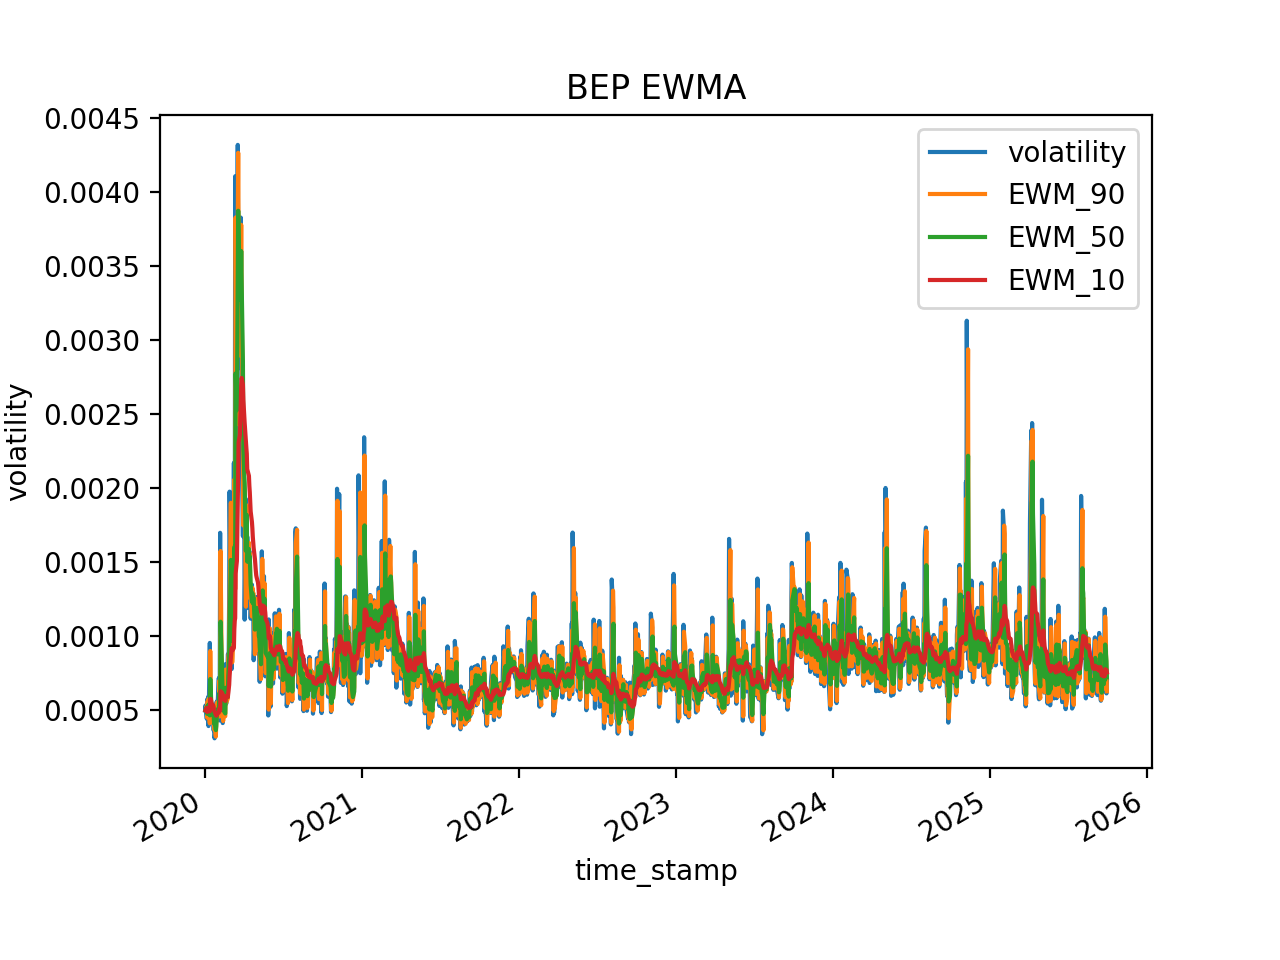

In [ ]:
# daily_volatility_BEP.name = 'volatility'
# daily_volatility_BEP = daily_volatility_BEP.to_frame()
daily_volatility_BEP['EWM_90'] = daily_volatility_BEP['volatility'].shift(1).ewm(alpha=.90).mean()
daily_volatility_BEP['EWM_50'] = daily_volatility_BEP['volatility'].shift(1).ewm(alpha=.50).mean()
daily_volatility_BEP['EWM_10'] = daily_volatility_BEP['volatility'].shift(1).ewm(alpha=.10).mean()
daily_volatility_BEP.plot()
plt.title("BEP EWMA")
plt.ylabel("volatility")
plt.show()

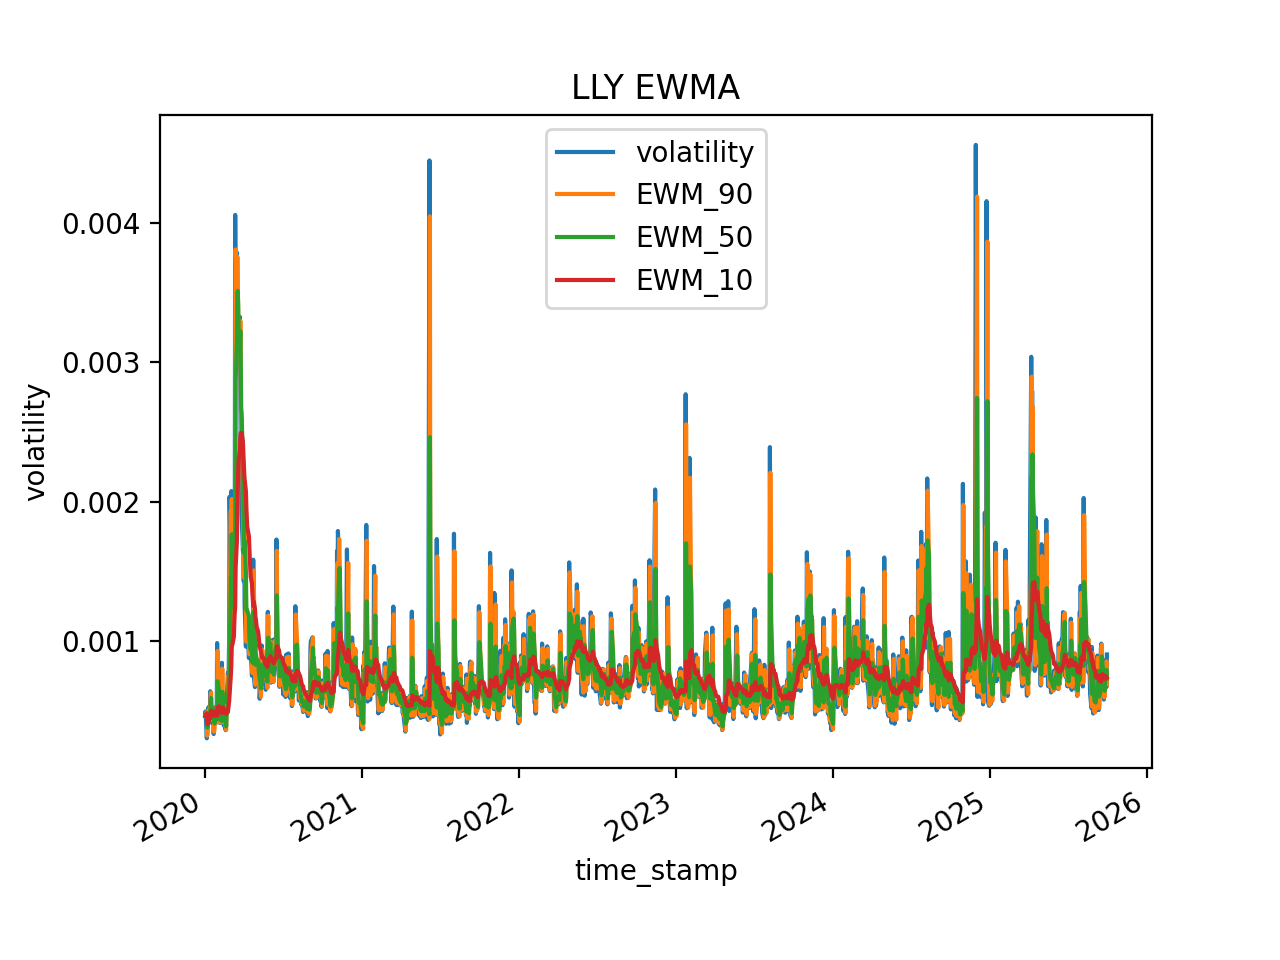

In [ ]:
daily_volatility_LLY.name = 'volatility'
daily_volatility_LLY = daily_volatility_LLY.to_frame()
daily_volatility_LLY['EWM_90'] = daily_volatility_LLY['volatility'].shift(1).ewm(alpha=.90).mean()
daily_volatility_LLY['EWM_50'] = daily_volatility_LLY['volatility'].shift(1).ewm(alpha=.50).mean()
daily_volatility_LLY['EWM_10'] = daily_volatility_LLY['volatility'].shift(1).ewm(alpha=.10).mean()
daily_volatility_LLY.plot()
plt.title("LLY EWMA")
plt.ylabel("volatility")
plt.show()

In [ ]:
#EWMA formula, acts as basis to compare other models
def ewma_predict_Days(volatility, lambda_, days, loss):
    predicted = []
    true = []
    start = len(volatility) - days
    # print(start)
    for i in range(start, len(volatility)):
        historical = volatility.iloc[:i]
        # print("historical: ", historical)
        ewma_value = historical.ewm(alpha=lambda_).mean().iloc[-1]
        # print("ewma value: ", ewma_value)
        true.append(volatility.iloc[i])
        predicted.append(ewma_value)
    # print(true)
    # print(predicted)
    if loss == "MSE":
        return np.mean((np.array(true)-np.array(predicted))**2)
    else:
        return None

In [ ]:
#Use ewma and find the error in predicting the latest 20 days
mse_APPL = ewma_predict_Days(daily_volatility_AAPL, 0.94, 20, "MSE")
print("MSE: ", mse_APPL)

MSE:  1.0911267691521766e-08


In [ ]:
mse_LLY = ewma_predict_Days(daily_volatility_LLY, 0.94, 20, "MSE")
print("MSE LLY: ", mse_LLY)

MSE LLY:  2.23307755951079e-08


In [ ]:
mse_BEP = ewma_predict_Days(daily_volatility_BEP, 0.94, 20, "MSE")
print("BEP MSE: ", mse_BEP)

BEP MSE:  5.497451390562223e-08


# Outlier Detection

In [ ]:
df_AAPL = pd.read_csv("data_files/AAPL_combined.csv.gz")
AAPL_returns = pd.DataFrame({
    "time_stamp": df_AAPL["Unnamed: 0"],
    "log_return": np.log(1+(df_AAPL['4. close']-df_AAPL['1. open'])/df_AAPL['1. open'])
})
AAPL_returns['time_stamp'] = pd.to_datetime(AAPL_returns['time_stamp'], errors='coerce')
daily_variance_AAPL = AAPL_returns.groupby(AAPL_returns['time_stamp'].dt.floor("1D"))["log_return"].var()


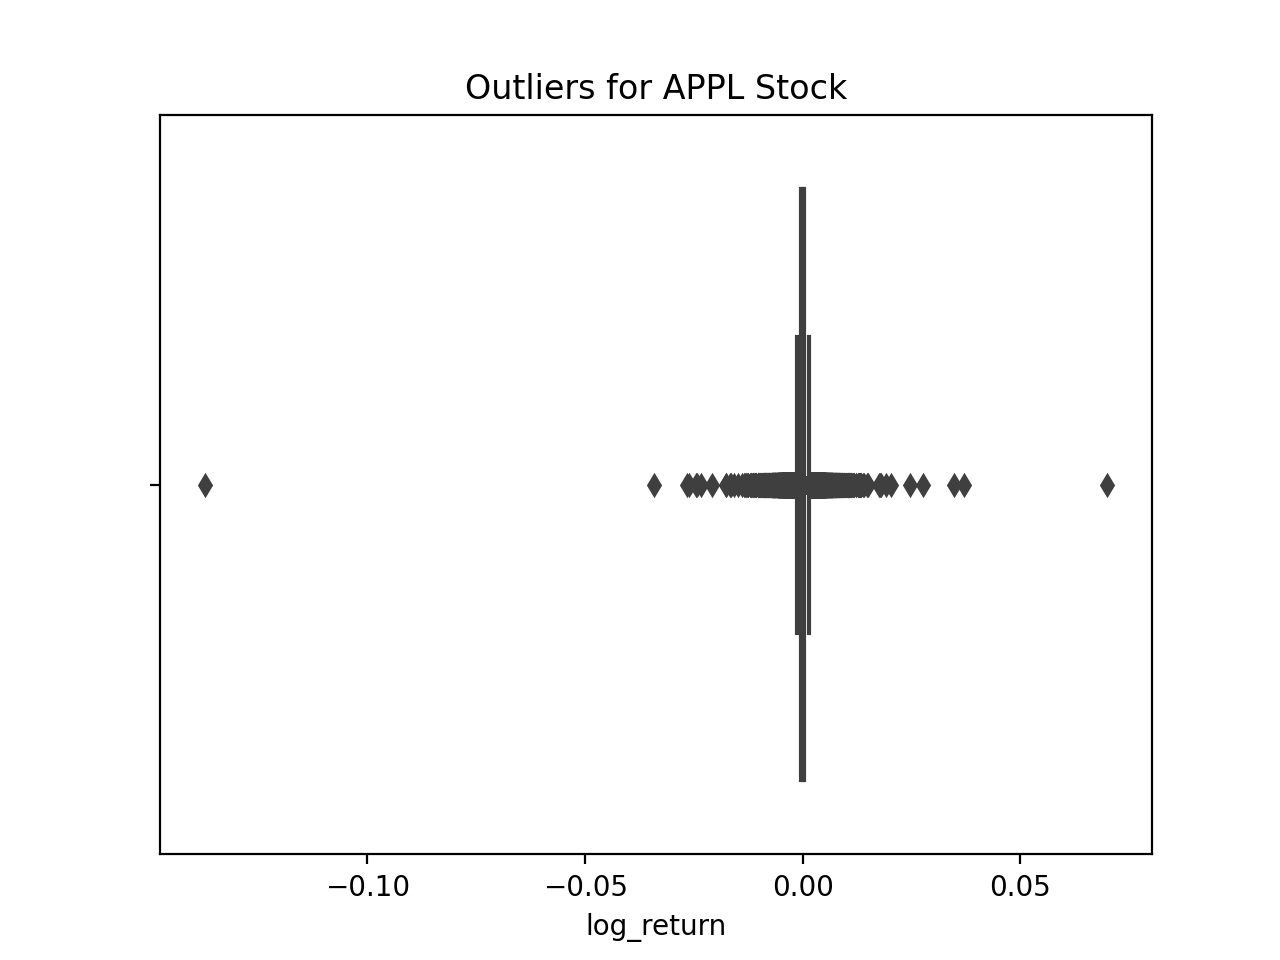

In [ ]:
sns.boxplot(x="log_return", data=AAPL_returns)
plt.title("Outliers for APPL Stock")
plt.show()

In [ ]:
lower_bound = AAPL_returns["log_return"].quantile(0.0125)
upper_bound = AAPL_returns["log_return"].quantile(0.9875)
AAPL_returns_filtered = AAPL_returns[(AAPL_returns["log_return"] >= lower_bound) & (AAPL_returns["log_return"] <= upper_bound)]
daily_variance_AAPL_filtered = AAPL_returns_filtered.groupby(AAPL_returns_filtered['time_stamp'].dt.floor("1D"))["log_return"].var()

In [ ]:
#Plot returns
AAPL_returns_filtered.set_index("time_stamp", inplace=True)
AAPL_returns_filtered.log_return.plot()
plt.xlabel("Date")
plt.ylabel("Returns")
plt.title("Apple Returns Filtered")

Text(0.5, 1.0, 'Apple Returns Filtered')

In [ ]:
#Plot variance
plt.plot(daily_variance_AAPL_filtered.index, daily_variance_AAPL_filtered.values)
plt.xlabel("Date")
plt.ylabel("Variance")
plt.title("Apple Variance Filtered")

Text(0.5, 1.0, 'Apple Variance Filtered')

In [ ]:
#Plot volatility
daily_volatility_AAPL_filtered = np.sqrt(daily_variance_AAPL_filtered)
plt.plot(daily_volatility_AAPL_filtered.index, daily_volatility_AAPL_filtered.values)
plt.xlabel("Date")
plt.ylabel("Volatility")
plt.title("Apple Volatility Filtered")

Text(0.5, 1.0, 'Apple Volatility Filtered')

In [ ]:
#Use ewma and find the error in predicting the latest 20 days
mse_APPL = ewma_predict_Days(daily_volatility_AAPL_filtered, 0.94, 20, "MSE")
print("MSE: ", mse_APPL)

MSE:  7.772117950190128e-09


In [ ]:
df = pd.read_csv("data_files/BEP_combined.csv.gz")
df.columns
BEP_returns = pd.DataFrame({
    "time_stamp": df["Unnamed: 0"],
    "log_return": np.log(1+(df['4. close']-df['1. open'])/df['1. open'])
})
BEP_returns['time_stamp'] = pd.to_datetime(BEP_returns['time_stamp'], errors='coerce')
daily_variance_BEP = BEP_returns.groupby(BEP_returns['time_stamp'].dt.floor("1D"))["log_return"].var()

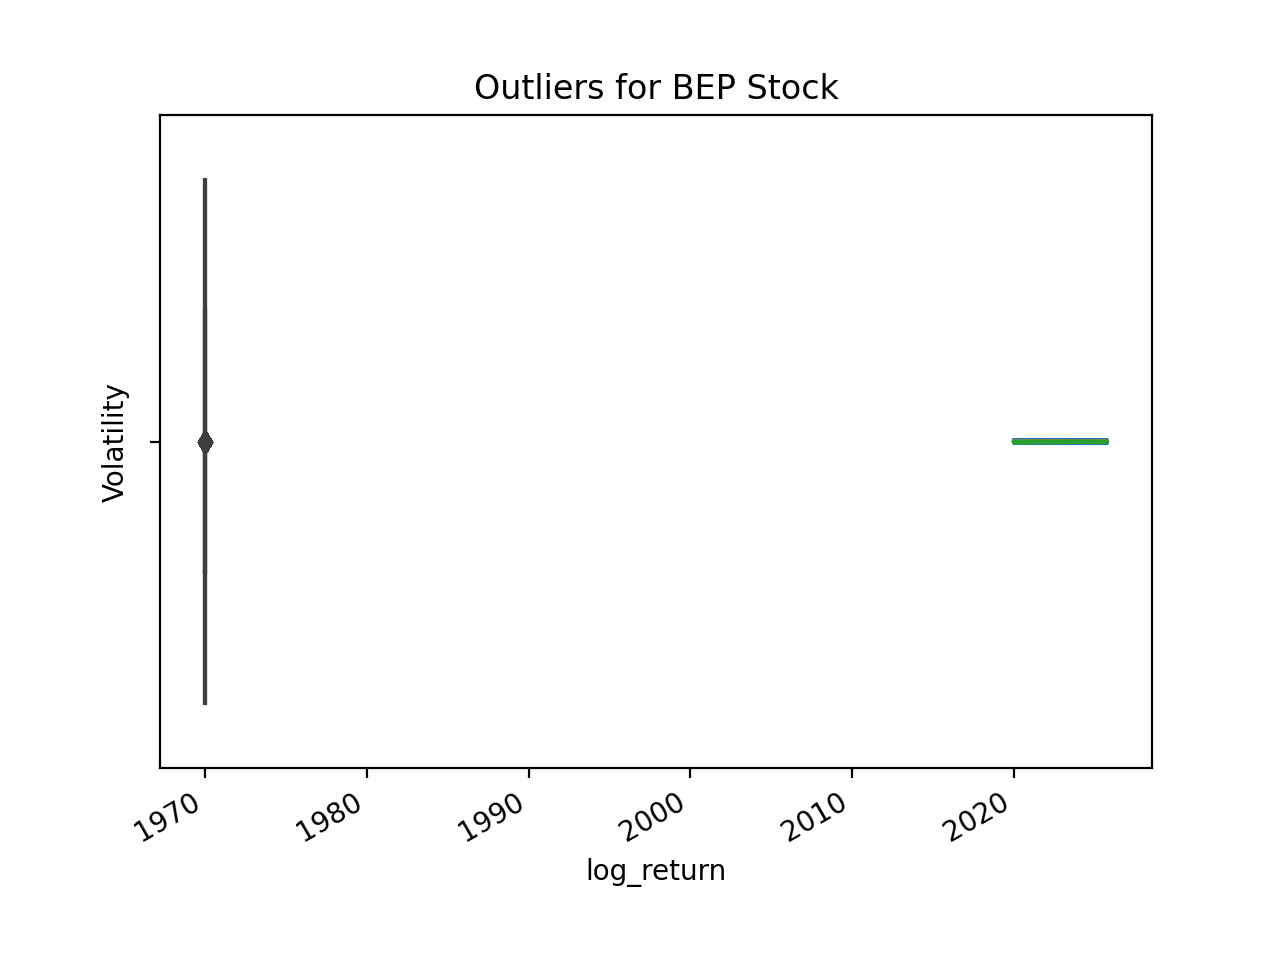

In [ ]:
sns.boxplot(x="log_return", data=BEP_returns)
plt.title("Outliers for BEP Stock")
plt.show()

In [ ]:
lower_bound = BEP_returns["log_return"].quantile(0.0125)
upper_bound = BEP_returns["log_return"].quantile(0.9875)
BEP_returns_filtered = BEP_returns[(BEP_returns["log_return"] >= lower_bound) & (BEP_returns["log_return"] <= upper_bound)]
daily_variance_BEP_filtered = BEP_returns_filtered.groupby(BEP_returns_filtered['time_stamp'].dt.floor("1D"))["log_return"].var()

In [ ]:
BEP_returns_filtered.set_index("time_stamp", inplace=True)
BEP_returns_filtered.log_return.plot()
plt.xlabel("Date")
plt.ylabel("Returns")
plt.title("BEP Returns Filtered")

Text(0.5, 1.0, 'BEP Returns Filtered')

In [ ]:
plt.plot(daily_variance_BEP_filtered.index, daily_variance_BEP_filtered.values)
plt.xlabel("Date")
plt.ylabel("Variance")
plt.title("BEP Variance Filtered")

Text(0.5, 1.0, 'BEP Variance Filtered')

In [ ]:
daily_volatility_BEP_filtered = np.sqrt(daily_variance_BEP_filtered)
plt.plot(daily_volatility_BEP_filtered.index, daily_volatility_BEP_filtered.values)
plt.xlabel("Date")
plt.ylabel("Volatility")
plt.title("BEP Volatility filtered")

Text(0.5, 1.0, 'BEP Volatility filtered')

In [ ]:
mse_BEP = ewma_predict_Days(daily_volatility_BEP_filtered, 0.94, 20, "MSE")
print("BEP Filtered MSE: ", mse_BEP)

BEP Filtered MSE:  1.361859327667227e-08


In [ ]:
df = pd.read_csv("data_files/LLY_combined.csv.gz")
df.columns
LLY_returns = pd.DataFrame({
    "time_stamp": df["Unnamed: 0"],
    "log_return": np.log(1+(df['4. close']-df['1. open'])/df['1. open'])
})
LLY_returns['time_stamp'] = pd.to_datetime(LLY_returns['time_stamp'], errors='coerce')
daily_variance_LLY = LLY_returns.groupby(LLY_returns['time_stamp'].dt.floor("1D"))["log_return"].var()

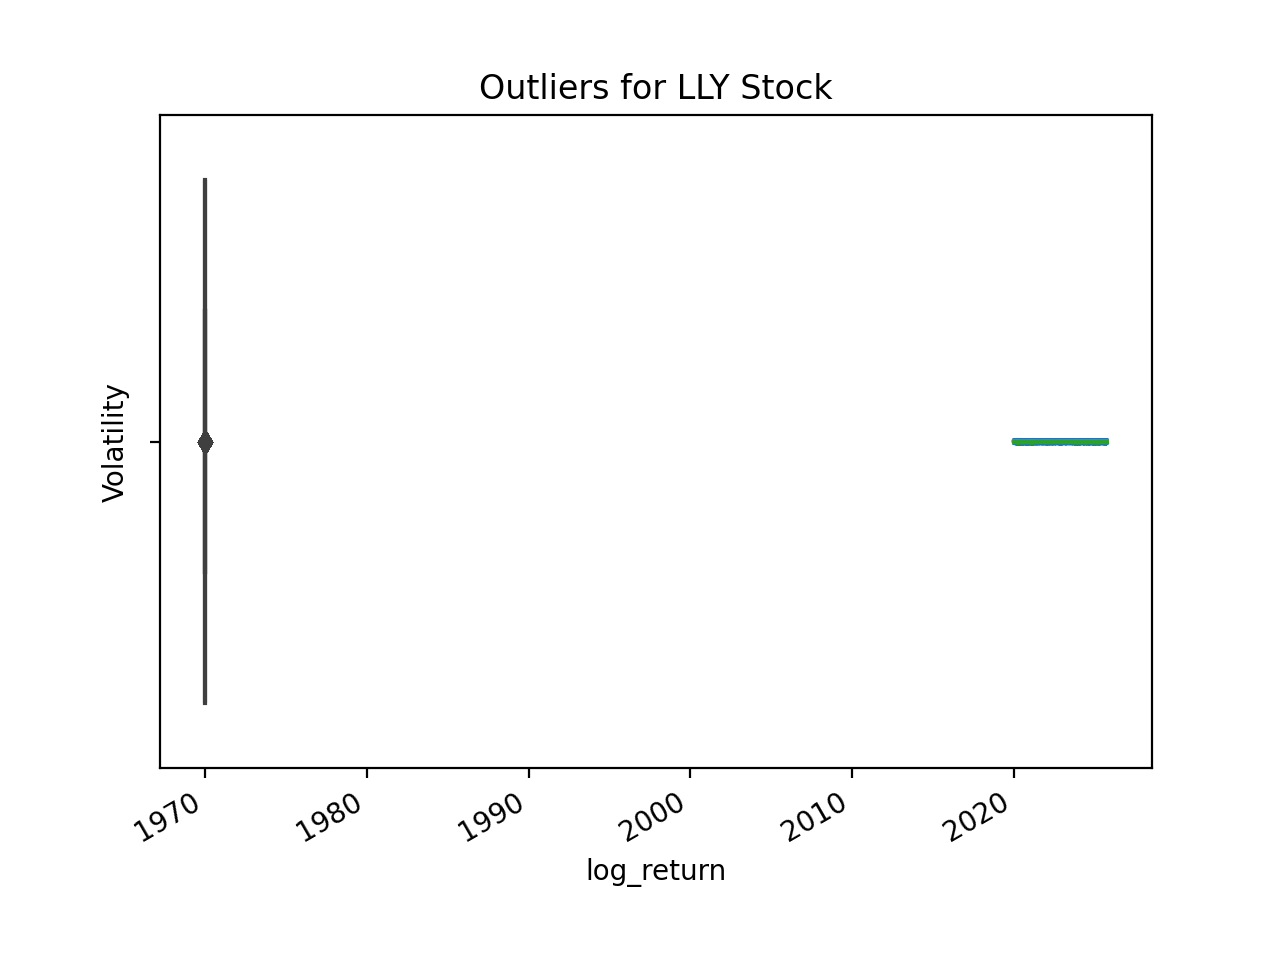

In [ ]:
sns.boxplot(x="log_return", data=LLY_returns)
plt.title("Outliers for LLY Stock")
plt.show()

In [ ]:
lower_bound = LLY_returns["log_return"].quantile(0.0125)
upper_bound = LLY_returns["log_return"].quantile(0.9875)
LLY_returns_filtered = LLY_returns[(LLY_returns["log_return"] >= lower_bound) & (LLY_returns["log_return"] <= upper_bound)]
daily_variance_LLY_filtered = LLY_returns_filtered.groupby(LLY_returns_filtered['time_stamp'].dt.floor("1D"))["log_return"].var()

In [ ]:
LLY_returns_filtered.set_index("time_stamp", inplace=True)
LLY_returns_filtered.log_return.plot()
plt.xlabel("Date")
plt.ylabel("Returns")
plt.title("LLY Returns Filtered")

Text(0.5, 1.0, 'LLY Returns Filtered')

In [ ]:
plt.plot(daily_variance_LLY_filtered.index, daily_variance_LLY_filtered.values)
plt.xlabel("Date")
plt.ylabel("Variance")
plt.title("LLY Variance Filtered")

Text(0.5, 1.0, 'LLY Variance Filtered')

In [ ]:
daily_volatility_LLY_filtered = np.sqrt(daily_variance_LLY_filtered)
plt.plot(daily_volatility_LLY_filtered.index, daily_volatility_LLY_filtered.values)
plt.xlabel("Date")
plt.ylabel("Volatility")
plt.title("LLY Volatility Filtered")

Text(0.5, 1.0, 'LLY Volatility Filtered')

In [ ]:
mse_LLY = ewma_predict_Days(daily_volatility_LLY_filtered, 0.94, 20, "MSE")
print("MSE Filtered LLY: ", mse_LLY)

MSE Filtered LLY:  8.297770244358856e-09


# Next Steps

Next Steps:
Want to incorporate secondary data to better predict volatility.
We plan to base our approach off of Trading Volume Alpha paper.
Model will consist of 4 kinds of features

Lagged moving averages of returns (as we did originally using EWMA),
fundamental characteristics of each stock: market equity, standardized earnings surprise, book leverage, book-to-market equity, Dimson beta, and firm age, calendar Dates that effect trading volume: Early closing, triple witching days, double witching days, Russell index re-balancing, earnings release schedule (using one hot encoding) for if a stock has an upcoming earnings release or has just had one

We will use a simple neural network model with three fully connected hidden layers of 32, 16, and 8 ReLU nodes and one linear output node.

We will evaluate the model using MSE and compare its performance with the EWMA.


References:
Goyenko, Ruslan and Kelly, Bryan T. and Moskowitz, Tobias J. and Moskowitz, Tobias J. and Su, Yinan and Zhang, Chao, Trading Volume Alpha (May 15, 2024). Available at SSRN: https://ssrn.com/abstract=4802345 or http://dx.doi.org/10.2139/ssrn.4802345
https://saltfinancial.com/static/uploads/2021/05/The%20Laymans%20Guide%20to%20Volatility%20Forecasting.pdf